In [2]:
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import time


from tqdm import tqdm

from models.apl import *
from models.densenet import *
# from models.apl_plus import *

In [3]:
data_amp = sio.loadmat('data/train_data_split_amp.mat')
train_data_amp = data_amp['train_data']
train_data = train_data_amp
# data_pha = sio.loadmat('data/train_data_split_pha.mat')
# train_data_pha = data_pha['train_data']
# train_data = np.concatenate((train_data_amp,train_data_pha),1)

train_activity_label = data_amp['train_activity_label']
train_location_label = data_amp['train_location_label']
train_label = np.concatenate((train_activity_label, train_location_label), 1)

In [4]:
data_amp = sio.loadmat('data/test_data_split_amp.mat')
test_data_amp = data_amp['test_data']
test_data = test_data_amp
# data_pha = sio.loadmat('data/test_data_split_pha.mat')
# test_data_pha = data_pha['test_data']
# test_data = np.concatenate((test_data_amp,test_data_pha), 1)

test_activity_label = data_amp['test_activity_label']
test_location_label = data_amp['test_location_label']
test_label = np.concatenate((test_activity_label, test_location_label), 1)

In [5]:
import pandas as pd

In [6]:
data = np.concatenate((train_data,test_data), 0)

In [17]:
label = np.concatenate((train_label,test_label), 0)

In [8]:
label_df.shape

(1394, 2)

In [9]:
label_df

,0,1
0,4,9
1,4,9
2,4,9
3,4,9
4,4,9
...,...,...
1389,0,7
1390,0,7
1391,0,7
1392,0,8


In [10]:
val_index = [3,
 4,
 13,
 22,
 26,
 1121,
 41,
 37,
 48,
 53,
 64,
 65,
 76,
 74,
 87,
 1136,
 92,
 97,
 1141,
 98,
 118,
 109,
 129,
 125,
 134,
 1149,
 149,
 148,
 1154,
 154,
 173,
 164,
 1159,
 179,
 194,
 190,
 208,
 198,
 213,
 218,
 229,
 1171,
 232,
 242,
 250,
 251,
 260,
 1180,
 267,
 271,
 279,
 277,
 299,
 288,
 1191,
 1192,
 1194,
 322,
 323,
 1197,
 336,
 334,
 350,
 355,
 367,
 365,
 377,
 371,
 387,
 1212,
 395,
 403,
 408,
 413,
 422,
 419,
 436,
 1225,
 1227,
 1228,
 1231,
 1230,
 464,
 471,
 476,
 485,
 488,
 1237,
 506,
 1241,
 512,
 522,
 527,
 532,
 542,
 1250,
 549,
 557,
 570,
 563,
 1260,
 579,
 1263,
 593,
 605,
 603,
 613,
 1268,
 625,
 623,
 639,
 629,
 645,
 1276,
 661,
 1278,
 669,
 664,
 675,
 680,
 688,
 1287,
 708,
 702,
 717,
 1294,
 723,
 726,
 735,
 1299,
 1302,
 748,
 767,
 759,
 776,
 777,
 786,
 1313,
 802,
 805,
 817,
 815,
 821,
 1322,
 835,
 839,
 852,
 843,
 855,
 865,
 869,
 1334,
 1335,
 882,
 895,
 892,
 909,
 912,
 920,
 915,
 927,
 1349,
 945,
 938,
 1353,
 1354,
 972,
 971,
 980,
 979,
 1364,
 990,
 997,
 998,
 1010,
 1013,
 1026,
 1373,
 1034,
 1036,
 1047,
 1055,
 1061,
 1062,
 1071,
 1077,
 1083,
 1086,
 1097,
 1093,
 1111,
 1393]

In [11]:
test_index = [7,
 1116,
 15,
 1118,
 32,
 1122,
 43,
 1125,
 49,
 47,
 61,
 56,
 70,
 71,
 84,
 85,
 88,
 93,
 107,
 106,
 117,
 112,
 1145,
 1146,
 136,
 131,
 141,
 1153,
 156,
 157,
 175,
 1157,
 1160,
 176,
 195,
 192,
 1166,
 200,
 220,
 1168,
 226,
 1172,
 234,
 240,
 247,
 248,
 257,
 265,
 1182,
 270,
 1185,
 285,
 289,
 1189,
 304,
 300,
 320,
 314,
 325,
 326,
 343,
 339,
 356,
 352,
 1206,
 363,
 369,
 379,
 386,
 382,
 1214,
 394,
 1219,
 410,
 426,
 425,
 439,
 438,
 445,
 443,
 460,
 452,
 475,
 474,
 1236,
 479,
 494,
 495,
 503,
 500,
 516,
 1244,
 523,
 1248,
 537,
 1251,
 554,
 1254,
 1255,
 560,
 1258,
 1259,
 1261,
 591,
 1264,
 1265,
 609,
 611,
 617,
 1270,
 1273,
 634,
 648,
 643,
 654,
 653,
 1282,
 663,
 685,
 1284,
 695,
 1288,
 1292,
 705,
 716,
 1295,
 1297,
 729,
 744,
 1300,
 1304,
 753,
 1306,
 1305,
 772,
 771,
 1311,
 1312,
 803,
 1315,
 810,
 813,
 819,
 822,
 841,
 836,
 846,
 850,
 1330,
 1329,
 872,
 1333,
 881,
 1336,
 900,
 890,
 913,
 908,
 1344,
 916,
 932,
 1348,
 1352,
 948,
 953,
 951,
 967,
 963,
 974,
 982,
 985,
 984,
 1366,
 999,
 1017,
 1011,
 1023,
 1028,
 1038,
 1039,
 1377,
 1378,
 1059,
 1057,
 1385,
 1078,
 1081,
 1386,
 1102,
 1101,
 1107,
 1392]

In [12]:
train_index = []
for i in range(1394):
    if i not in val_index and i not in test_index:
        train_index.append(i)

In [13]:
len(train_index)

1010

In [18]:
label

array([[4, 9],
       [4, 9],
       [4, 9],
       ...,
       [0, 7],
       [0, 8],
       [0, 8]], dtype=uint8)

In [53]:
train_data = data[train_index]
val_data = data[val_index]
test_data = data[test_index]

train_label = label[train_index]
val_label = label[val_index]
test_label = label[test_index]

# Parameters

In [54]:
batch_size = 64
num_epochs = 600

In [55]:
num_train_instances = len(train_data)

train_data = torch.from_numpy(train_data).type(torch.FloatTensor)
train_label = torch.from_numpy(train_label).type(torch.LongTensor)
# train_data = train_data.view(num_train_instances, 1, -1)
# train_label = train_label.view(num_train_instances, 2)

train_dataset = TensorDataset(train_data, train_label)
train_data_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [23]:
num_test_instances = len(test_data)

test_data = torch.from_numpy(test_data).type(torch.FloatTensor)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)
# test_data = test_data.view(num_test_instances, 1, -1)
# test_label = test_label.view(num_test_instances, 2)

test_dataset = TensorDataset(test_data, test_label)
test_data_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# DenseNet

In [56]:
aplnet = DenseNet()
# aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                #  milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                #              140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 
                                                #              400, 450, 500, 550, 600],
                                                milestones = [i for i in range(20,600,20)],
                                                 gamma=0.5)

this training is using densenet
mau masuk block 1 in_planes sebanyak  128
keluar block 1 in_planes sebanyak  640
in_planes sebanyak  640


In [57]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [58]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

Epoch: 0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.50it/s]


Activity Training accuracy: 17.02970297029703
Location Training accuracy: 6.336633663366337
Activity Training loss: 1.8769743739968479
Location Training loss: 1.5022955148526937
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.8125128348668416
Location Test loss: 3.131563107172648
Epoch: 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.29it/s]


Activity Training accuracy: 16.93069306930693
Location Training accuracy: 6.336633663366337
Activity Training loss: 1.745716933448716
Location Training loss: 0.6869873537875638
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.8865771691004436
Location Test loss: 4.890446186065674
Epoch: 2


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.64it/s]


Activity Training accuracy: 17.128712871287128
Location Training accuracy: 9.207920792079207
Activity Training loss: 1.6608474806983873
Location Training loss: 0.48720261413272065
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 9.895833333333334
Activity Test loss: 2.0446060498555503
Location Test loss: 3.752134323120117
Epoch: 3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.37it/s]


Activity Training accuracy: 17.722772277227723
Location Training accuracy: 6.237623762376238
Activity Training loss: 1.5737334676308208
Location Training loss: 0.4270495310868367
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 2.975544492403666
Location Test loss: 7.294727961222331
Epoch: 4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.18it/s]


Activity Training accuracy: 18.91089108910891
Location Training accuracy: 12.475247524752476
Activity Training loss: 1.5379309776985999
Location Training loss: 0.3443893394847908
Activity Test accuracy: 18.75
Location Test accuracy: 14.583333333333334
Activity Test loss: 2.3751291831334433
Location Test loss: 5.319125652313232
Epoch: 5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.11it/s]


Activity Training accuracy: 17.722772277227723
Location Training accuracy: 30.89108910891089
Activity Training loss: 1.4726198404142172
Location Training loss: 0.3082789713793462
Activity Test accuracy: 19.270833333333332
Location Test accuracy: 30.729166666666668
Activity Test loss: 2.155857563018799
Location Test loss: 2.936854044596354
Epoch: 6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.37it/s]


Activity Training accuracy: 20.099009900990097
Location Training accuracy: 13.168316831683168
Activity Training loss: 1.4031025499400527
Location Training loss: 0.2646493146915247
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 12.5
Activity Test loss: 2.585443655649821
Location Test loss: 12.361529032389322
Epoch: 7


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.63it/s]


Activity Training accuracy: 19.603960396039604
Location Training accuracy: 27.722772277227723
Activity Training loss: 1.4120946978578472
Location Training loss: 0.29714701435353497
Activity Test accuracy: 18.229166666666668
Location Test accuracy: 26.041666666666668
Activity Test loss: 2.775804042816162
Location Test loss: 7.010633945465088
Epoch: 8


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.78it/s]


Activity Training accuracy: 19.207920792079207
Location Training accuracy: 34.05940594059406
Activity Training loss: 1.3291767686900526
Location Training loss: 0.2579084944016863
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 32.8125
Activity Test loss: 4.766409158706665
Location Test loss: 6.575005849202474
Epoch: 9


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 109.96it/s]


Activity Training accuracy: 18.613861386138613
Location Training accuracy: 21.980198019801982
Activity Training loss: 1.2443600418544052
Location Training loss: 0.23099945606571612
Activity Test accuracy: 21.875
Location Test accuracy: 23.958333333333332
Activity Test loss: 2.4868746598561606
Location Test loss: 7.994312286376953
Epoch: 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.05it/s]


Activity Training accuracy: 16.03960396039604
Location Training accuracy: 6.8316831683168315
Activity Training loss: 1.2149867142781172
Location Training loss: 0.2583966151322469
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.770833333333333
Activity Test loss: 8.726011832555136
Location Test loss: 25.74578030904134
Epoch: 11


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.90it/s]


Activity Training accuracy: 19.00990099009901
Location Training accuracy: 30.792079207920793
Activity Training loss: 1.2305545655807646
Location Training loss: 0.23098727452873002
Activity Test accuracy: 18.75
Location Test accuracy: 33.854166666666664
Activity Test loss: 4.932651519775391
Location Test loss: 5.585093816121419
Epoch: 12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.28it/s]


Activity Training accuracy: 21.485148514851485
Location Training accuracy: 21.584158415841586
Activity Training loss: 1.1292168267882696
Location Training loss: 0.25995760908221255
Activity Test accuracy: 19.270833333333332
Location Test accuracy: 22.395833333333332
Activity Test loss: 8.009499033292135
Location Test loss: 14.855711619059244
Epoch: 13


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.26it/s]


Activity Training accuracy: 17.524752475247524
Location Training accuracy: 26.237623762376238
Activity Training loss: 1.1285672858209894
Location Training loss: 0.2769749943572696
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 27.083333333333332
Activity Test loss: 4.0538402398427325
Location Test loss: 9.780855814615885
Epoch: 14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.28it/s]


Activity Training accuracy: 23.96039603960396
Location Training accuracy: 28.11881188118812
Activity Training loss: 1.0887571731416306
Location Training loss: 0.21495735243995592
Activity Test accuracy: 23.958333333333332
Location Test accuracy: 29.166666666666668
Activity Test loss: 4.013397852579753
Location Test loss: 6.906530221303304
Epoch: 15


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.36it/s]


Activity Training accuracy: 17.425742574257427
Location Training accuracy: 11.782178217821782
Activity Training loss: 1.1360766118115717
Location Training loss: 0.24999566880783233
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 12.5
Activity Test loss: 14.161161740620932
Location Test loss: 12.365608215332031
Epoch: 16


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.13it/s]


Activity Training accuracy: 19.306930693069308
Location Training accuracy: 38.91089108910891
Activity Training loss: 1.0504647887579286
Location Training loss: 0.23040534765413492
Activity Test accuracy: 18.229166666666668
Location Test accuracy: 39.583333333333336
Activity Test loss: 4.3851973215738935
Location Test loss: 5.330227216084798
Epoch: 17


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.34it/s]


Activity Training accuracy: 17.722772277227723
Location Training accuracy: 23.26732673267327
Activity Training loss: 0.9610947335120474
Location Training loss: 0.17991429036206538
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 23.958333333333332
Activity Test loss: 16.943017323811848
Location Test loss: 14.698657989501953
Epoch: 18


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.46it/s]


Activity Training accuracy: 22.178217821782177
Location Training accuracy: 21.287128712871286
Activity Training loss: 0.9344446087827777
Location Training loss: 0.17486429993468935
Activity Test accuracy: 22.916666666666668
Location Test accuracy: 21.875
Activity Test loss: 4.8774183591206866
Location Test loss: 9.015876452128092
Epoch: 19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.34it/s]


Activity Training accuracy: 31.782178217821784
Location Training accuracy: 57.524752475247524
Activity Training loss: 0.830967640640712
Location Training loss: 0.17049617531275985
Activity Test accuracy: 28.125
Location Test accuracy: 56.25
Activity Test loss: 3.060295323530833
Location Test loss: 1.8784691095352173
Epoch: 20


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.49it/s]


Activity Training accuracy: 20.198019801980198
Location Training accuracy: 21.386138613861387
Activity Training loss: 0.8044729213903447
Location Training loss: 0.1552535651934029
Activity Test accuracy: 20.3125
Location Test accuracy: 21.875
Activity Test loss: 8.737158298492432
Location Test loss: 9.295161883036295
Epoch: 21


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.13it/s]


Activity Training accuracy: 30.89108910891089
Location Training accuracy: 49.7029702970297
Activity Training loss: 0.7903347959612855
Location Training loss: 0.13440743200849778
Activity Test accuracy: 32.291666666666664
Location Test accuracy: 50.520833333333336
Activity Test loss: 3.0363900661468506
Location Test loss: 3.1664815743764243
Epoch: 22


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.76it/s]


Activity Training accuracy: 27.02970297029703
Location Training accuracy: 34.15841584158416
Activity Training loss: 0.7769152424123028
Location Training loss: 0.13769004179699587
Activity Test accuracy: 27.604166666666668
Location Test accuracy: 32.8125
Activity Test loss: 3.4793123404184976
Location Test loss: 6.066463788350423
Epoch: 23


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.15it/s]


Activity Training accuracy: 29.900990099009903
Location Training accuracy: 39.603960396039604
Activity Training loss: 0.7341665702291055
Location Training loss: 0.13457343177040024
Activity Test accuracy: 26.5625
Location Test accuracy: 39.0625
Activity Test loss: 4.918388366699219
Location Test loss: 3.3758983612060547
Epoch: 24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.32it/s]


Activity Training accuracy: 17.524752475247524
Location Training accuracy: 11.188118811881187
Activity Training loss: 0.8090242706903137
Location Training loss: 0.13926659244121892
Activity Test accuracy: 17.1875
Location Test accuracy: 11.458333333333334
Activity Test loss: 15.79547087351481
Location Test loss: 16.49093182881673
Epoch: 25


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.38it/s]


Activity Training accuracy: 35.64356435643565
Location Training accuracy: 58.21782178217822
Activity Training loss: 0.7764844195677503
Location Training loss: 0.12878325858918746
Activity Test accuracy: 34.895833333333336
Location Test accuracy: 56.770833333333336
Activity Test loss: 2.921497623125712
Location Test loss: 2.9134532610575357
Epoch: 26


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.27it/s]


Activity Training accuracy: 27.722772277227723
Location Training accuracy: 39.10891089108911
Activity Training loss: 0.6851222312096322
Location Training loss: 0.1028472657250886
Activity Test accuracy: 29.166666666666668
Location Test accuracy: 38.020833333333336
Activity Test loss: 3.859751502672831
Location Test loss: 6.707329750061035
Epoch: 27


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.04it/s]


Activity Training accuracy: 22.673267326732674
Location Training accuracy: 20.198019801980198
Activity Training loss: 0.6796489111267694
Location Training loss: 0.09864790911721712
Activity Test accuracy: 22.395833333333332
Location Test accuracy: 20.833333333333332
Activity Test loss: 5.677810033162435
Location Test loss: 12.527297655741373
Epoch: 28


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.87it/s]


Activity Training accuracy: 22.376237623762375
Location Training accuracy: 53.86138613861386
Activity Training loss: 0.7471784176212726
Location Training loss: 0.11399327811628285
Activity Test accuracy: 22.395833333333332
Location Test accuracy: 51.5625
Activity Test loss: 4.637160936991374
Location Test loss: 2.746153195699056
Epoch: 29


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.69it/s]


Activity Training accuracy: 28.613861386138613
Location Training accuracy: 64.05940594059406
Activity Training loss: 0.6644280915213103
Location Training loss: 0.09674161094250065
Activity Test accuracy: 28.125
Location Test accuracy: 63.541666666666664
Activity Test loss: 2.952499826749166
Location Test loss: 1.4288300673166912
Epoch: 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.24it/s]


Activity Training accuracy: 25.742574257425744
Location Training accuracy: 58.415841584158414
Activity Training loss: 0.6971549459023051
Location Training loss: 0.08863759867035516
Activity Test accuracy: 24.479166666666668
Location Test accuracy: 57.8125
Activity Test loss: 6.283528645833333
Location Test loss: 1.8754997650782268
Epoch: 31


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.55it/s]


Activity Training accuracy: 41.48514851485149
Location Training accuracy: 48.01980198019802
Activity Training loss: 0.6557581042299176
Location Training loss: 0.09946913152638048
Activity Test accuracy: 41.145833333333336
Location Test accuracy: 49.479166666666664
Activity Test loss: 2.315278172492981
Location Test loss: 2.564295530319214
Epoch: 32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.69it/s]


Activity Training accuracy: 28.91089108910891
Location Training accuracy: 24.653465346534652
Activity Training loss: 0.6087283351633809
Location Training loss: 0.09266102597264961
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 23.4375
Activity Test loss: 4.789525826772054
Location Test loss: 8.8500394821167
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.09it/s]


Activity Training accuracy: 35.148514851485146
Location Training accuracy: 39.504950495049506
Activity Training loss: 0.5768044556721602
Location Training loss: 0.08484600015205912
Activity Test accuracy: 36.458333333333336
Location Test accuracy: 42.1875
Activity Test loss: 3.276972532272339
Location Test loss: 3.3047239780426025
Epoch: 34


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.48it/s]


Activity Training accuracy: 27.623762376237625
Location Training accuracy: 72.07920792079207
Activity Training loss: 0.5232144459639445
Location Training loss: 0.08560054703514175
Activity Test accuracy: 32.291666666666664
Location Test accuracy: 71.875
Activity Test loss: 3.0665512879689536
Location Test loss: 0.980843186378479
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.15it/s]


Activity Training accuracy: 31.485148514851485
Location Training accuracy: 44.15841584158416
Activity Training loss: 0.5255523436140306
Location Training loss: 0.07243271499577135
Activity Test accuracy: 30.729166666666668
Location Test accuracy: 44.791666666666664
Activity Test loss: 3.3672913710276284
Location Test loss: 3.301708459854126
Epoch: 36


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.90it/s]


Activity Training accuracy: 26.534653465346533
Location Training accuracy: 34.35643564356435
Activity Training loss: 0.5300110278743329
Location Training loss: 0.07879719828615094
Activity Test accuracy: 25.520833333333332
Location Test accuracy: 34.375
Activity Test loss: 6.77396806081136
Location Test loss: 6.682443459828694
Epoch: 37


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.44it/s]


Activity Training accuracy: 27.92079207920792
Location Training accuracy: 39.603960396039604
Activity Training loss: 0.5522807942758693
Location Training loss: 0.06754784111929411
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 40.104166666666664
Activity Test loss: 7.487983226776123
Location Test loss: 3.757162650426229
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.57it/s]


Activity Training accuracy: 20.0
Location Training accuracy: 15.445544554455445
Activity Training loss: 0.5544576059473623
Location Training loss: 0.06795413423292708
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 18.229166666666668
Activity Test loss: 10.492888847986857
Location Test loss: 8.012390613555908
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.67it/s]


Activity Training accuracy: 29.702970297029704
Location Training accuracy: 80.4950495049505
Activity Training loss: 0.4606913934839834
Location Training loss: 0.06273004347735112
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 80.20833333333333
Activity Test loss: 9.26684045791626
Location Test loss: 0.9659123023351034
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.62it/s]


Activity Training accuracy: 38.01980198019802
Location Training accuracy: 85.54455445544555
Activity Training loss: 0.42932564763739556
Location Training loss: 0.046003593784747734
Activity Test accuracy: 36.458333333333336
Location Test accuracy: 84.89583333333333
Activity Test loss: 2.6189576387405396
Location Test loss: 0.4406458040078481
Epoch: 41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.59it/s]


Activity Training accuracy: 44.95049504950495
Location Training accuracy: 51.386138613861384
Activity Training loss: 0.40988932411269385
Location Training loss: 0.044760095246947636
Activity Test accuracy: 42.708333333333336
Location Test accuracy: 53.645833333333336
Activity Test loss: 2.932282646497091
Location Test loss: 3.13046662012736
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.18it/s]


Activity Training accuracy: 48.21782178217822
Location Training accuracy: 79.20792079207921
Activity Training loss: 0.4095185402596351
Location Training loss: 0.05353134976755274
Activity Test accuracy: 45.833333333333336
Location Test accuracy: 77.60416666666667
Activity Test loss: 2.491711974143982
Location Test loss: 1.1071671446164448
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.99it/s]


Activity Training accuracy: 37.02970297029703
Location Training accuracy: 83.06930693069307
Activity Training loss: 0.4512582731719064
Location Training loss: 0.06346510389063618
Activity Test accuracy: 36.979166666666664
Location Test accuracy: 83.33333333333333
Activity Test loss: 2.877749522527059
Location Test loss: 0.6630432903766632
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.93it/s]


Activity Training accuracy: 26.237623762376238
Location Training accuracy: 33.56435643564357
Activity Training loss: 0.46282443056012146
Location Training loss: 0.059156111679454844
Activity Test accuracy: 25.520833333333332
Location Test accuracy: 31.770833333333332
Activity Test loss: 7.290233294169108
Location Test loss: 5.96254841486613
Epoch: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.86it/s]


Activity Training accuracy: 43.56435643564357
Location Training accuracy: 73.66336633663366
Activity Training loss: 0.3809995056378959
Location Training loss: 0.05106286365206879
Activity Test accuracy: 44.270833333333336
Location Test accuracy: 75.0
Activity Test loss: 2.3464490175247192
Location Test loss: 1.4494030475616455
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.42it/s]


Activity Training accuracy: 64.15841584158416
Location Training accuracy: 81.08910891089108
Activity Training loss: 0.36361273963852686
Location Training loss: 0.04648356496697605
Activity Test accuracy: 57.8125
Location Test accuracy: 80.20833333333333
Activity Test loss: 1.295353929201762
Location Test loss: 0.5963828464349111
Epoch: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.91it/s]


Activity Training accuracy: 29.504950495049506
Location Training accuracy: 76.03960396039604
Activity Training loss: 0.3999558326041344
Location Training loss: 0.03834350687442439
Activity Test accuracy: 27.604166666666668
Location Test accuracy: 78.125
Activity Test loss: 5.648477077484131
Location Test loss: 1.0151679913202922
Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.88it/s]


Activity Training accuracy: 50.693069306930695
Location Training accuracy: 67.42574257425743
Activity Training loss: 0.35918724607713154
Location Training loss: 0.03563283605150657
Activity Test accuracy: 46.875
Location Test accuracy: 65.625
Activity Test loss: 2.4978832801183066
Location Test loss: 1.7752469778060913
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.62it/s]


Activity Training accuracy: 35.742574257425744
Location Training accuracy: 57.92079207920792
Activity Training loss: 0.36417834404671545
Location Training loss: 0.03935224484689165
Activity Test accuracy: 33.333333333333336
Location Test accuracy: 59.375
Activity Test loss: 5.493148008982341
Location Test loss: 2.0630696217219033
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.07it/s]


Activity Training accuracy: 41.78217821782178
Location Training accuracy: 63.06930693069307
Activity Training loss: 0.35234498977661133
Location Training loss: 0.04873648946828181
Activity Test accuracy: 40.104166666666664
Location Test accuracy: 62.5
Activity Test loss: 4.644215901692708
Location Test loss: 2.352791706720988
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.08it/s]


Activity Training accuracy: 30.495049504950494
Location Training accuracy: 48.51485148514851
Activity Training loss: 0.38497981553030486
Location Training loss: 0.04132811043522146
Activity Test accuracy: 26.041666666666668
Location Test accuracy: 46.354166666666664
Activity Test loss: 8.244661649068197
Location Test loss: 2.2830752531687417
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.07it/s]


Activity Training accuracy: 44.851485148514854
Location Training accuracy: 73.76237623762377
Activity Training loss: 0.337931494193502
Location Training loss: 0.0535051965477443
Activity Test accuracy: 38.541666666666664
Location Test accuracy: 74.47916666666667
Activity Test loss: 2.993805249532064
Location Test loss: 1.1977763175964355
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.89it/s]


Activity Training accuracy: 40.198019801980195
Location Training accuracy: 52.772277227722775
Activity Training loss: 0.36046659261873454
Location Training loss: 0.06537041416262636
Activity Test accuracy: 38.020833333333336
Location Test accuracy: 53.645833333333336
Activity Test loss: 6.0841507116953535
Location Test loss: 3.230802297592163
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.53it/s]


Activity Training accuracy: 31.287128712871286
Location Training accuracy: 42.17821782178218
Activity Training loss: 0.3133346708694307
Location Training loss: 0.04490760612015677
Activity Test accuracy: 34.895833333333336
Location Test accuracy: 43.229166666666664
Activity Test loss: 5.276317199071248
Location Test loss: 3.9619160493214927
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.50it/s]


Activity Training accuracy: 35.34653465346535
Location Training accuracy: 63.960396039603964
Activity Training loss: 0.32647854833319634
Location Training loss: 0.04208052117045563
Activity Test accuracy: 33.854166666666664
Location Test accuracy: 65.625
Activity Test loss: 6.1778043905893965
Location Test loss: 1.4725194772084553
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.26it/s]


Activity Training accuracy: 59.00990099009901
Location Training accuracy: 91.08910891089108
Activity Training loss: 0.2861315538387487
Location Training loss: 0.03901583215977886
Activity Test accuracy: 54.6875
Location Test accuracy: 89.0625
Activity Test loss: 1.5009719530741374
Location Test loss: 0.4287532369295756
Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.01it/s]


Activity Training accuracy: 53.76237623762376
Location Training accuracy: 87.32673267326733
Activity Training loss: 0.31525480062654704
Location Training loss: 0.03510684494925018
Activity Test accuracy: 55.208333333333336
Location Test accuracy: 86.97916666666667
Activity Test loss: 2.5898491938908896
Location Test loss: 0.4653479754924774
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.70it/s]


Activity Training accuracy: 26.633663366336634
Location Training accuracy: 32.97029702970297
Activity Training loss: 0.31999300399629194
Location Training loss: 0.04172279846550214
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 33.854166666666664
Activity Test loss: 5.582035223642985
Location Test loss: 7.598912715911865
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.86it/s]


Activity Training accuracy: 38.118811881188115
Location Training accuracy: 78.01980198019803
Activity Training loss: 0.24957500117840153
Location Training loss: 0.03452480399962699
Activity Test accuracy: 36.979166666666664
Location Test accuracy: 78.125
Activity Test loss: 3.687733749548594
Location Test loss: 0.9122605919837952
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.22it/s]


Activity Training accuracy: 57.82178217821782
Location Training accuracy: 81.98019801980197
Activity Training loss: 0.23344010834646697
Location Training loss: 0.028053796911003567
Activity Test accuracy: 55.208333333333336
Location Test accuracy: 81.77083333333333
Activity Test loss: 1.8702621062596638
Location Test loss: 0.6688391168912252
Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.88it/s]


Activity Training accuracy: 86.03960396039604
Location Training accuracy: 95.94059405940594
Activity Training loss: 0.21954649273711857
Location Training loss: 0.025771331226471628
Activity Test accuracy: 72.91666666666667
Location Test accuracy: 92.70833333333333
Activity Test loss: 0.7095760603745779
Location Test loss: 0.21067271629969278
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 69.60396039603961
Location Training accuracy: 94.15841584158416
Activity Training loss: 0.2186129097891326
Location Training loss: 0.025807980440630773
Activity Test accuracy: 63.020833333333336
Location Test accuracy: 91.66666666666667
Activity Test loss: 1.6149355570475261
Location Test loss: 0.253898486495018
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.98it/s]


Activity Training accuracy: 73.66336633663366
Location Training accuracy: 79.3069306930693
Activity Training loss: 0.21762956298223818
Location Training loss: 0.032368822971192916
Activity Test accuracy: 72.39583333333333
Location Test accuracy: 79.6875
Activity Test loss: 0.8429122765858968
Location Test loss: 0.982134997844696
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.38it/s]


Activity Training accuracy: 79.4059405940594
Location Training accuracy: 96.03960396039604
Activity Training loss: 0.24523480481440477
Location Training loss: 0.0410758645817785
Activity Test accuracy: 71.35416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.7922051946322123
Location Test loss: 0.13630763938029608
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.86it/s]


Activity Training accuracy: 64.45544554455445
Location Training accuracy: 87.72277227722772
Activity Training loss: 0.21709328264293104
Location Training loss: 0.029718469275106296
Activity Test accuracy: 59.375
Location Test accuracy: 87.5
Activity Test loss: 1.9962685505549114
Location Test loss: 0.6454442242781321
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.21it/s]


Activity Training accuracy: 62.67326732673267
Location Training accuracy: 85.24752475247524
Activity Training loss: 0.22179895674828257
Location Training loss: 0.03277799912018351
Activity Test accuracy: 61.458333333333336
Location Test accuracy: 84.375
Activity Test loss: 1.4768012762069702
Location Test loss: 0.8339825669924418
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.06it/s]


Activity Training accuracy: 50.89108910891089
Location Training accuracy: 81.38613861386139
Activity Training loss: 0.222882875121466
Location Training loss: 0.028212120450369204
Activity Test accuracy: 47.916666666666664
Location Test accuracy: 77.60416666666667
Activity Test loss: 3.3942113717397056
Location Test loss: 1.2031723260879517
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.43it/s]


Activity Training accuracy: 47.92079207920792
Location Training accuracy: 93.76237623762377
Activity Training loss: 0.233935020937778
Location Training loss: 0.026130850863928842
Activity Test accuracy: 45.3125
Location Test accuracy: 90.10416666666667
Activity Test loss: 3.686708847681681
Location Test loss: 0.24040032426516214
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.08it/s]


Activity Training accuracy: 76.93069306930693
Location Training accuracy: 98.41584158415841
Activity Training loss: 0.21844001005191613
Location Training loss: 0.027196516081838325
Activity Test accuracy: 69.79166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.8524947563807169
Location Test loss: 0.08717008431752522
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.89it/s]


Activity Training accuracy: 83.16831683168317
Location Training accuracy: 93.06930693069307
Activity Training loss: 0.22306797669665648
Location Training loss: 0.032755649635697354
Activity Test accuracy: 76.04166666666667
Location Test accuracy: 91.14583333333333
Activity Test loss: 0.6759678522745768
Location Test loss: 0.29866406818230945
Epoch: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.36it/s]


Activity Training accuracy: 59.801980198019805
Location Training accuracy: 84.85148514851485
Activity Training loss: 0.21338041324426632
Location Training loss: 0.029469172907347727
Activity Test accuracy: 57.8125
Location Test accuracy: 81.77083333333333
Activity Test loss: 2.096723179022471
Location Test loss: 0.6571401953697205
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.78it/s]


Activity Training accuracy: 51.68316831683168
Location Training accuracy: 96.83168316831683
Activity Training loss: 0.23065689436279901
Location Training loss: 0.024845823940664234
Activity Test accuracy: 47.916666666666664
Location Test accuracy: 95.3125
Activity Test loss: 2.1202643712361655
Location Test loss: 0.12131115049123764
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.00it/s]


Activity Training accuracy: 58.415841584158414
Location Training accuracy: 91.88118811881188
Activity Training loss: 0.20574918218178323
Location Training loss: 0.0239603849330751
Activity Test accuracy: 52.083333333333336
Location Test accuracy: 88.54166666666667
Activity Test loss: 1.7817244331041973
Location Test loss: 0.2464786171913147
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.32it/s]


Activity Training accuracy: 66.73267326732673
Location Training accuracy: 92.27722772277228
Activity Training loss: 0.18820707396705552
Location Training loss: 0.024939929170183617
Activity Test accuracy: 58.854166666666664
Location Test accuracy: 92.70833333333333
Activity Test loss: 1.314237117767334
Location Test loss: 0.26015348732471466
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.34it/s]


Activity Training accuracy: 67.22772277227723
Location Training accuracy: 90.99009900990099
Activity Training loss: 0.1796222493200019
Location Training loss: 0.019386023105961263
Activity Test accuracy: 59.895833333333336
Location Test accuracy: 90.10416666666667
Activity Test loss: 1.4279041687647502
Location Test loss: 0.40970586736996967
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.52it/s]


Activity Training accuracy: 51.584158415841586
Location Training accuracy: 93.16831683168317
Activity Training loss: 0.17436110666482754
Location Training loss: 0.024347225215175364
Activity Test accuracy: 47.395833333333336
Location Test accuracy: 90.625
Activity Test loss: 3.03170516093572
Location Test loss: 0.2599489192167918
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.15it/s]


Activity Training accuracy: 38.01980198019802
Location Training accuracy: 80.29702970297029
Activity Training loss: 0.19964503722615762
Location Training loss: 0.02182966739234358
Activity Test accuracy: 35.416666666666664
Location Test accuracy: 80.72916666666667
Activity Test loss: 4.378678520520528
Location Test loss: 0.8037883639335632
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.60it/s]


Activity Training accuracy: 36.73267326732673
Location Training accuracy: 90.89108910891089
Activity Training loss: 0.1979483425027073
Location Training loss: 0.027520140031776805
Activity Test accuracy: 35.416666666666664
Location Test accuracy: 87.5
Activity Test loss: 4.812270402908325
Location Test loss: 0.3270452121893565
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.89it/s]


Activity Training accuracy: 75.34653465346534
Location Training accuracy: 98.61386138613861
Activity Training loss: 0.18289603714895722
Location Training loss: 0.018701608877370855
Activity Test accuracy: 68.22916666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.9348848660786947
Location Test loss: 0.08418075740337372
Epoch: 80


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.48it/s]


Activity Training accuracy: 74.55445544554455
Location Training accuracy: 98.01980198019803
Activity Training loss: 0.1682066303668636
Location Training loss: 0.020944552079285726
Activity Test accuracy: 69.27083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 1.1791085203488667
Location Test loss: 0.09463902811209361
Epoch: 81


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.07it/s]


Activity Training accuracy: 93.36633663366337
Location Training accuracy: 97.12871287128714
Activity Training loss: 0.14057010140749487
Location Training loss: 0.019065530848975228
Activity Test accuracy: 83.33333333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4370340903600057
Location Test loss: 0.13144939144452414
Epoch: 82


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.71it/s]


Activity Training accuracy: 89.5049504950495
Location Training accuracy: 99.00990099009901
Activity Training loss: 0.12890085985164831
Location Training loss: 0.017403812013050118
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4361917773882548
Location Test loss: 0.08712206408381462
Epoch: 83


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.15it/s]


Activity Training accuracy: 89.00990099009901
Location Training accuracy: 95.64356435643565
Activity Training loss: 0.13351075861713674
Location Training loss: 0.024501571973951735
Activity Test accuracy: 77.60416666666667
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.553239127000173
Location Test loss: 0.20810956756273905
Epoch: 84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.05it/s]


Activity Training accuracy: 80.4950495049505
Location Training accuracy: 98.61386138613861
Activity Training loss: 0.1753213396166811
Location Training loss: 0.022320219785860268
Activity Test accuracy: 72.39583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.927988717953364
Location Test loss: 0.06622035056352615
Epoch: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.04it/s]


Activity Training accuracy: 97.02970297029702
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.165088160203235
Location Training loss: 0.016591971050394644
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3173227409521739
Location Test loss: 0.0693698339164257
Epoch: 86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.03it/s]


Activity Training accuracy: 80.89108910891089
Location Training accuracy: 96.13861386138613
Activity Training loss: 0.14677368579524577
Location Training loss: 0.037263051708145895
Activity Test accuracy: 75.0
Location Test accuracy: 94.27083333333333
Activity Test loss: 1.2695351243019104
Location Test loss: 0.18503389755884805
Epoch: 87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.87it/s]


Activity Training accuracy: 74.35643564356435
Location Training accuracy: 89.9009900990099
Activity Training loss: 0.1228594194544424
Location Training loss: 0.018652352248087967
Activity Test accuracy: 67.70833333333333
Location Test accuracy: 90.10416666666667
Activity Test loss: 1.0986966292063396
Location Test loss: 0.5325388312339783
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.39it/s]


Activity Training accuracy: 91.48514851485149
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.13731611931678092
Location Training loss: 0.020911617473800583
Activity Test accuracy: 80.20833333333333
Location Test accuracy: 96.875
Activity Test loss: 0.532720148563385
Location Test loss: 0.07796616355578105
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.21it/s]


Activity Training accuracy: 84.55445544554455
Location Training accuracy: 97.42574257425743
Activity Training loss: 0.14945321555184846
Location Training loss: 0.016554655031402514
Activity Test accuracy: 74.47916666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.6752056280771891
Location Test loss: 0.11818322290976842
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.28it/s]


Activity Training accuracy: 83.66336633663366
Location Training accuracy: 87.22772277227723
Activity Training loss: 0.15860340477216361
Location Training loss: 0.026401201215120827
Activity Test accuracy: 76.04166666666667
Location Test accuracy: 85.9375
Activity Test loss: 0.6813633541266123
Location Test loss: 0.7374115983645121
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.02it/s]


Activity Training accuracy: 79.9009900990099
Location Training accuracy: 94.25742574257426
Activity Training loss: 0.13881427769613738
Location Training loss: 0.02045866115258472
Activity Test accuracy: 70.3125
Location Test accuracy: 93.22916666666667
Activity Test loss: 0.8830268383026123
Location Test loss: 0.2831556399663289
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.25it/s]


Activity Training accuracy: 86.73267326732673
Location Training accuracy: 97.02970297029702
Activity Training loss: 0.13383493376250313
Location Training loss: 0.0253543221714473
Activity Test accuracy: 76.5625
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.6910149852434794
Location Test loss: 0.1414598027865092
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.08it/s]


Activity Training accuracy: 73.66336633663366
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.1389261274054499
Location Training loss: 0.020376768560692815
Activity Test accuracy: 69.27083333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.9695462981859843
Location Test loss: 0.07927706340948741
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.13it/s]


Activity Training accuracy: 88.41584158415841
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.13770103029685446
Location Training loss: 0.018153122539567475
Activity Test accuracy: 77.60416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.5459269732236862
Location Test loss: 0.05460226659973463
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.12it/s]


Activity Training accuracy: 69.5049504950495
Location Training accuracy: 99.10891089108911
Activity Training loss: 0.1290408748211247
Location Training loss: 0.020035744510074654
Activity Test accuracy: 64.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 1.2449328502019246
Location Test loss: 0.0816024715701739
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.10it/s]


Activity Training accuracy: 88.21782178217822
Location Training accuracy: 98.7128712871287
Activity Training loss: 0.15331003689529873
Location Training loss: 0.025248046293117034
Activity Test accuracy: 80.20833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.5056397120157877
Location Test loss: 0.06828137983878453
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.45it/s]


Activity Training accuracy: 49.7029702970297
Location Training accuracy: 94.55445544554455
Activity Training loss: 0.15400573428314512
Location Training loss: 0.03312889387701998
Activity Test accuracy: 46.875
Location Test accuracy: 92.70833333333333
Activity Test loss: 2.832819124062856
Location Test loss: 0.29470967253049213
Epoch: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.43it/s]


Activity Training accuracy: 96.33663366336634
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.13337191638379994
Location Training loss: 0.019829090190405893
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.36472614109516144
Location Test loss: 0.04083369175593058
Epoch: 99


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.50it/s]


Activity Training accuracy: 93.16831683168317
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.12894853082033667
Location Training loss: 0.01448733880378232
Activity Test accuracy: 85.41666666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4740274101495743
Location Test loss: 0.05274548505743345
Epoch: 100


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 120.04it/s]


Activity Training accuracy: 97.12871287128714
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.12597317577588676
Location Training loss: 0.019437472359968885
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.31456461548805237
Location Test loss: 0.03348661089936892
Epoch: 101


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.35it/s]


Activity Training accuracy: 92.27722772277228
Location Training accuracy: 99.4059405940594
Activity Training loss: 0.11809787750244141
Location Training loss: 0.014380798835565547
Activity Test accuracy: 83.85416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.43292171756426495
Location Test loss: 0.06531310205658276
Epoch: 102


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.36it/s]


Activity Training accuracy: 97.82178217821782
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.10540998336112145
Location Training loss: 0.01760817559638826
Activity Test accuracy: 89.0625
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.3516175796588262
Location Test loss: 0.05386584500471751
Epoch: 103


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.19it/s]


Activity Training accuracy: 97.72277227722772
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.11140476878326719
Location Training loss: 0.017107146299711547
Activity Test accuracy: 89.0625
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.29012394944826764
Location Test loss: 0.03991272114217281
Epoch: 104


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.13it/s]


Activity Training accuracy: 96.23762376237623
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.11351641428352582
Location Training loss: 0.015513237396089157
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.33921392758687335
Location Test loss: 0.05342353011171023
Epoch: 105


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 94.65346534653466
Location Training accuracy: 98.81188118811882
Activity Training loss: 0.10928014268969545
Location Training loss: 0.020149452379434416
Activity Test accuracy: 84.375
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4170493980248769
Location Test loss: 0.09287892157832782
Epoch: 106


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.57it/s]


Activity Training accuracy: 96.33663366336634
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.1122603194548352
Location Training loss: 0.020051657917475936
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.3252415060997009
Location Test loss: 0.04645583654443423
Epoch: 107


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.54it/s]


Activity Training accuracy: 99.00990099009901
Location Training accuracy: 100.0
Activity Training loss: 0.10388278725123641
Location Training loss: 0.012726882011583536
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.3064863532781601
Location Test loss: 0.03953354557355245
Epoch: 108


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.37it/s]


Activity Training accuracy: 92.27722772277228
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.12326027284754384
Location Training loss: 0.01741202689043366
Activity Test accuracy: 82.8125
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.5485803087552389
Location Test loss: 0.04309661313891411
Epoch: 109


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.17it/s]


Activity Training accuracy: 96.23762376237623
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.10677902250006648
Location Training loss: 0.01244150441471893
Activity Test accuracy: 84.375
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.3384028226137161
Location Test loss: 0.04273827746510506
Epoch: 110


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.25it/s]


Activity Training accuracy: 97.42574257425743
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.10502953104453512
Location Training loss: 0.016216294629739062
Activity Test accuracy: 85.9375
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.33646543820699054
Location Test loss: 0.03687983254591624
Epoch: 111


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.55it/s]


Activity Training accuracy: 96.03960396039604
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.10791962028730033
Location Training loss: 0.018590216648460615
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.3663441439469655
Location Test loss: 0.05179597561558088
Epoch: 112


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.20it/s]


Activity Training accuracy: 98.7128712871287
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.10632729412305474
Location Training loss: 0.022957446581066247
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.29299987355868023
Location Test loss: 0.044111259281635284
Epoch: 113


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.52it/s]


Activity Training accuracy: 95.94059405940594
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.11374481574143513
Location Training loss: 0.01889858596985883
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.3271634578704834
Location Test loss: 0.05087456790109476
Epoch: 114


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.43it/s]


Activity Training accuracy: 92.17821782178218
Location Training accuracy: 97.52475247524752
Activity Training loss: 0.1146243156773029
Location Training loss: 0.016516161673139816
Activity Test accuracy: 82.29166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4232981950044632
Location Test loss: 0.1350251113375028
Epoch: 115


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.54it/s]


Activity Training accuracy: 92.47524752475248
Location Training accuracy: 100.0
Activity Training loss: 0.10574068834285925
Location Training loss: 0.014723187448954818
Activity Test accuracy: 83.33333333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.4998083710670471
Location Test loss: 0.03861538569132487
Epoch: 116


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.66it/s]


Activity Training accuracy: 99.00990099009901
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.10263106020370333
Location Training loss: 0.021393837226499426
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.30415793259938556
Location Test loss: 0.04587368046243986
Epoch: 117


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.55it/s]


Activity Training accuracy: 91.18811881188118
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.13060603920776065
Location Training loss: 0.01941916252126788
Activity Test accuracy: 81.25
Location Test accuracy: 96.875
Activity Test loss: 0.560001939535141
Location Test loss: 0.06288498019178708
Epoch: 118


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.44it/s]


Activity Training accuracy: 98.21782178217822
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.11427524396688632
Location Training loss: 0.013272126151783631
Activity Test accuracy: 85.41666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.34673023223876953
Location Test loss: 0.041546168426672615
Epoch: 119


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.98it/s]


Activity Training accuracy: 97.82178217821782
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.10195016908173514
Location Training loss: 0.013400490419699413
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2622868667046229
Location Test loss: 0.04274578268329302
Epoch: 120


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.77it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.09578979581889539
Location Training loss: 0.016721782324337724
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.26302119592825574
Location Test loss: 0.035861307134230934
Epoch: 121


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.80it/s]


Activity Training accuracy: 98.91089108910892
Location Training accuracy: 100.0
Activity Training loss: 0.09242167000723357
Location Training loss: 0.02077231451426402
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2730796237786611
Location Test loss: 0.04504884034395218
Epoch: 122


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.80it/s]


Activity Training accuracy: 97.32673267326733
Location Training accuracy: 100.0
Activity Training loss: 0.09112516346544322
Location Training loss: 0.01565815266406182
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.32737678786118823
Location Test loss: 0.03329565872748693
Epoch: 123


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.47it/s]


Activity Training accuracy: 97.82178217821782
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08044458379839907
Location Training loss: 0.011840711755327658
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2997376322746277
Location Test loss: 0.0396011962244908
Epoch: 124


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.26it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.10153297008854328
Location Training loss: 0.01452524353667061
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.23119614521662393
Location Test loss: 0.03151882874468962
Epoch: 125


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.40it/s]


Activity Training accuracy: 98.81188118811882
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.10683066278400988
Location Training loss: 0.015065229558708645
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2694061001141866
Location Test loss: 0.031171103318532307
Epoch: 126


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.22it/s]


Activity Training accuracy: 98.7128712871287
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.08142552918726854
Location Training loss: 0.012287836676776999
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.26614755392074585
Location Test loss: 0.0404267900933822
Epoch: 127


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.21it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 100.0
Activity Training loss: 0.08402452988199668
Location Training loss: 0.015405244844974858
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.24940371016661325
Location Test loss: 0.040241848677396774
Epoch: 128


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.47it/s]


Activity Training accuracy: 99.3069306930693
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.09882522172266894
Location Training loss: 0.017632828711873234
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.26563894748687744
Location Test loss: 0.03683780630429586
Epoch: 129


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.02it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08998305726759505
Location Training loss: 0.013921706658778805
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2789191007614136
Location Test loss: 0.040172195682923
Epoch: 130


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.12it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.08298149699031716
Location Training loss: 0.01418657367772395
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.24663272003332773
Location Test loss: 0.03648960714538892
Epoch: 131


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.10049622672619206
Location Training loss: 0.013325010638425845
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2821180274089177
Location Test loss: 0.0385760689775149
Epoch: 132


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.44it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 99.00990099009901
Activity Training loss: 0.11352980396535137
Location Training loss: 0.02162336503515149
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.2952451904614766
Location Test loss: 0.06805879498521487
Epoch: 133


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.54it/s]


Activity Training accuracy: 98.91089108910892
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.09039118927304107
Location Training loss: 0.015315805242793395
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.25900450348854065
Location Test loss: 0.03244335142274698
Epoch: 134


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.26it/s]


Activity Training accuracy: 99.3069306930693
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08560315004669794
Location Training loss: 0.017030529692621515
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.25606917838255566
Location Test loss: 0.0416837806502978
Epoch: 135


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.70it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.0942806881253082
Location Training loss: 0.017059921082293632
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.2423640936613083
Location Test loss: 0.041319953898588814
Epoch: 136


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.32it/s]


Activity Training accuracy: 98.81188118811882
Location Training accuracy: 100.0
Activity Training loss: 0.08010211675473959
Location Training loss: 0.015310466437056513
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.27049651245276135
Location Test loss: 0.036891973887880646
Epoch: 137


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.69it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08546508066725023
Location Training loss: 0.013714543265281338
Activity Test accuracy: 93.75
Location Test accuracy: 98.4375
Activity Test loss: 0.22179571787516275
Location Test loss: 0.03627194960912069
Epoch: 138


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.12it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 100.0
Activity Training loss: 0.0831676468990817
Location Training loss: 0.018566993439551628
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.232142964998881
Location Test loss: 0.03817132115364075
Epoch: 139


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.63it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.10582376848353017
Location Training loss: 0.021606300284366796
Activity Test accuracy: 93.75
Location Test accuracy: 98.4375
Activity Test loss: 0.23374291757742563
Location Test loss: 0.03446718802054723
Epoch: 140


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.38it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 100.0
Activity Training loss: 0.08813887208995252
Location Training loss: 0.01316846371582239
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.23977062106132507
Location Test loss: 0.033495163545012474
Epoch: 141


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.56it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07867518203093274
Location Training loss: 0.011985727259428194
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22417178750038147
Location Test loss: 0.03334736575682958
Epoch: 142


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.22it/s]


Activity Training accuracy: 99.5049504950495
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.09144598210212028
Location Training loss: 0.017256310832972573
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21516150732835135
Location Test loss: 0.03202459029853344
Epoch: 143


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.51it/s]


Activity Training accuracy: 99.10891089108911
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.09144044606992514
Location Training loss: 0.017790031256061968
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2718529850244522
Location Test loss: 0.027957702055573463
Epoch: 144


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.38it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09691509303480092
Location Training loss: 0.014617683391759891
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21959422528743744
Location Test loss: 0.03548471753795942
Epoch: 145


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.08it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 100.0
Activity Training loss: 0.09724766311078968
Location Training loss: 0.01864588449497034
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.254327192902565
Location Test loss: 0.032844449703892074
Epoch: 146


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.70it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.07323155403137208
Location Training loss: 0.013707429141101271
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2463650902112325
Location Test loss: 0.0463983453810215
Epoch: 147


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.73it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08099519946787617
Location Training loss: 0.013559826854431984
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22729800641536713
Location Test loss: 0.03611564449965954
Epoch: 148


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.26it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.0787144134540369
Location Training loss: 0.016805660606610894
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2355461766322454
Location Test loss: 0.036872110019127526
Epoch: 149


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.43it/s]


Activity Training accuracy: 99.5049504950495
Location Training accuracy: 100.0
Activity Training loss: 0.09054373443716823
Location Training loss: 0.014454905113371292
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23312678436438242
Location Test loss: 0.036500235398610435
Epoch: 150


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.71it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09714316896872946
Location Training loss: 0.019517044059120782
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.24162260194619498
Location Test loss: 0.0392565888663133
Epoch: 151


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.24it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08590168480825897
Location Training loss: 0.020447276134302122
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23490126430988312
Location Test loss: 0.034424961234132447
Epoch: 152


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.64it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.07982548156587205
Location Training loss: 0.01856482256167006
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23163855075836182
Location Test loss: 0.03167525182167689
Epoch: 153


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.14it/s]


Activity Training accuracy: 99.5049504950495
Location Training accuracy: 100.0
Activity Training loss: 0.083137843160346
Location Training loss: 0.011402435467974974
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2441667914390564
Location Test loss: 0.039203921953837075
Epoch: 154


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.88it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 100.0
Activity Training loss: 0.08356285307667043
Location Training loss: 0.013889990319119822
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.20787669718265533
Location Test loss: 0.03605935536324978
Epoch: 155


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.15it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08731271111138976
Location Training loss: 0.016068737577683855
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2723661909500758
Location Test loss: 0.03307665636142095
Epoch: 156


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.80it/s]


Activity Training accuracy: 99.20792079207921
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.08646650149090455
Location Training loss: 0.021701814809648116
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.249713733792305
Location Test loss: 0.053580754746993385
Epoch: 157


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.31it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.09276671810905532
Location Training loss: 0.012788377230120176
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2142295092344284
Location Test loss: 0.03698302681247393
Epoch: 158


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.32it/s]


Activity Training accuracy: 98.7128712871287
Location Training accuracy: 100.0
Activity Training loss: 0.0821349554722852
Location Training loss: 0.013298740791212214
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.27756764988104504
Location Test loss: 0.03169127181172371
Epoch: 159


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.09it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09431671081203045
Location Training loss: 0.016988655718246308
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22754536072413126
Location Test loss: 0.035277511924505234
Epoch: 160


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.35it/s]


Activity Training accuracy: 99.5049504950495
Location Training accuracy: 100.0
Activity Training loss: 0.08411431430590034
Location Training loss: 0.014054887277064937
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23182290295759836
Location Test loss: 0.03666784738500913
Epoch: 161


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.94it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07671232152693343
Location Training loss: 0.01685546589369821
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2237235258022944
Location Test loss: 0.03248228629430135
Epoch: 162


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.31it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07475718790941899
Location Training loss: 0.011610873500899514
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21845356126626334
Location Test loss: 0.03182231945296129
Epoch: 163


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.47it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.09581606010399242
Location Training loss: 0.01708385926662105
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21563910941282907
Location Test loss: 0.03447353405257066
Epoch: 164


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.13it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08656707376536757
Location Training loss: 0.01737350710842869
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21406803528467813
Location Test loss: 0.030018060157696407
Epoch: 165


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.11it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 100.0
Activity Training loss: 0.07508406308617922
Location Training loss: 0.013624344928429859
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22122046848138174
Location Test loss: 0.03022260343035062
Epoch: 166


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.32it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.08112935476964063
Location Training loss: 0.015448399876603985
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22452234228452048
Location Test loss: 0.03201200192173322
Epoch: 167


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.42it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08718823229912484
Location Training loss: 0.016170011121447725
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23402631282806396
Location Test loss: 0.027773468444744747
Epoch: 168


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.40it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08664807352689233
Location Training loss: 0.01871715202780053
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22298774619897208
Location Test loss: 0.029648672168453533
Epoch: 169


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.17it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08932250065378623
Location Training loss: 0.020148191682182917
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21407118439674377
Location Test loss: 0.03070826269686222
Epoch: 170


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.41it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07714442286160912
Location Training loss: 0.013120776385363965
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22801749408245087
Location Test loss: 0.030845696727434795
Epoch: 171


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.26it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08205060463140507
Location Training loss: 0.012220272672648478
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.24659933149814606
Location Test loss: 0.03126078906158606
Epoch: 172


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.08586348259803092
Location Training loss: 0.0121608700197522
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23867755134900412
Location Test loss: 0.030295661961038906
Epoch: 173


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.67it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.0665626322869027
Location Training loss: 0.011970396708733965
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22188477714856467
Location Test loss: 0.03180130012333393
Epoch: 174


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.42it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08891806578872227
Location Training loss: 0.0132240627071645
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22276445229848227
Location Test loss: 0.032685101653138794
Epoch: 175


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.89it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07473691359604939
Location Training loss: 0.01333342448319539
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22352087497711182
Location Test loss: 0.031097398449977238
Epoch: 176


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.74it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.08727217239908652
Location Training loss: 0.014333099480902795
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22899712125460306
Location Test loss: 0.0365155761440595
Epoch: 177


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.30it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0819649856869537
Location Training loss: 0.013659866862367875
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.220349391301473
Location Test loss: 0.03366491260627905
Epoch: 178


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.09it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.07559200655115712
Location Training loss: 0.015985592048947173
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21840348839759827
Location Test loss: 0.03119692827264468
Epoch: 179


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.83it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07835718735609905
Location Training loss: 0.015288328475291185
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21811028818289438
Location Test loss: 0.031046901519099872
Epoch: 180


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.14it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08333348260067477
Location Training loss: 0.010711870541666994
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21925448377927145
Location Test loss: 0.030507426088054974
Epoch: 181


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.13it/s]


Activity Training accuracy: 99.60396039603961
Location Training accuracy: 100.0
Activity Training loss: 0.10699788036912974
Location Training loss: 0.01651053192591903
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22457272311051688
Location Test loss: 0.029363568251331646
Epoch: 182


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.03it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07897783269976626
Location Training loss: 0.013470723044754255
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2221140662829081
Location Test loss: 0.02995328853527705
Epoch: 183


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.39it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08514140195185595
Location Training loss: 0.014303786890341504
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2250460982322693
Location Test loss: 0.031198227778077126
Epoch: 184


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.45it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07037816496178656
Location Training loss: 0.013297778367996217
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21731844047705332
Location Test loss: 0.033058520406484604
Epoch: 185


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.03it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0682707958882398
Location Training loss: 0.014242605333871181
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21220355232556662
Location Test loss: 0.031110440691312153
Epoch: 186


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.86it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09665392271362909
Location Training loss: 0.015173897279961275
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21783722937107086
Location Test loss: 0.033771064753333725
Epoch: 187


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.02it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07866582776060199
Location Training loss: 0.015250548749867051
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21720008552074432
Location Test loss: 0.032163344944516815
Epoch: 188


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.08it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08238469940601009
Location Training loss: 0.011670586466789246
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2179881582657496
Location Test loss: 0.029699295138319332
Epoch: 189


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.38it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08269463270017416
Location Training loss: 0.014564347591730628
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22921145955721536
Location Test loss: 0.03155496654411157
Epoch: 190


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.18it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08630727163635858
Location Training loss: 0.016446813852480143
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22703895966211954
Location Test loss: 0.03302726397911707
Epoch: 191


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.15it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.10670199701101474
Location Training loss: 0.016070239172123447
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.224167933066686
Location Test loss: 0.03117553082605203
Epoch: 192


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.03it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09906248408969086
Location Training loss: 0.020025299002628515
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21765024463335672
Location Test loss: 0.032409148290753365
Epoch: 193


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0781367011589579
Location Training loss: 0.012726120340942157
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2180424928665161
Location Test loss: 0.03219167081018289
Epoch: 194


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.57it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08852481865646815
Location Training loss: 0.01961850942951618
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2136819213628769
Location Test loss: 0.03406070669492086
Epoch: 195


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.77it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08226307713159241
Location Training loss: 0.015817567352021094
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21714356044928232
Location Test loss: 0.031737269212802253
Epoch: 196


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.22it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08637625604572863
Location Training loss: 0.013677560043807076
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21812349061171213
Location Test loss: 0.028975484892725945
Epoch: 197


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.85it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08222183213375582
Location Training loss: 0.014124796325617497
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21995669106642404
Location Test loss: 0.027085659404595692
Epoch: 198


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.41it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.08711137535548447
Location Training loss: 0.013025674135378092
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22319351136684418
Location Test loss: 0.029345827798048656
Epoch: 199


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.37it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.08105738776745182
Location Training loss: 0.013336248238487999
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2212195247411728
Location Test loss: 0.02936280022064845
Epoch: 200


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.38it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07270274941283877
Location Training loss: 0.012994861543768704
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.21795091529687247
Location Test loss: 0.029491029679775238
Epoch: 201


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.44it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07805282550282998
Location Training loss: 0.018397556038776245
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2222000608841578
Location Test loss: 0.030418404067556064
Epoch: 202


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.41it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0892150340694012
Location Training loss: 0.015344097811986904
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22151723007361093
Location Test loss: 0.03051906203230222
Epoch: 203


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.22it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08554484254062766
Location Training loss: 0.017512846745476863
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2200192908445994
Location Test loss: 0.03175059768060843
Epoch: 204


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.49it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08726790895556459
Location Training loss: 0.014958444119680047
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2255936712026596
Location Test loss: 0.02844333214064439
Epoch: 205


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.19it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08168670824258634
Location Training loss: 0.014348631093997767
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2290972868601481
Location Test loss: 0.02968450014789899
Epoch: 206


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.60it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09164830812133185
Location Training loss: 0.01529752815713977
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22300887604554495
Location Test loss: 0.030841367319226265
Epoch: 207


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.46it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07777927252325681
Location Training loss: 0.012533826683417406
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.22755985458691916
Location Test loss: 0.030833783249060314
Epoch: 208


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.40it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0905449095338878
Location Training loss: 0.011577834262706265
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22763812045256296
Location Test loss: 0.03061070293188095
Epoch: 209


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.09it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07030971711224848
Location Training loss: 0.01264524661963529
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22415196895599365
Location Test loss: 0.030910273392995197
Epoch: 210


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.25it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09680118065069218
Location Training loss: 0.01491796834634082
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22316968441009521
Location Test loss: 0.030566125487287838
Epoch: 211


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.80it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.08651605148126583
Location Training loss: 0.01519792354342961
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22289074460665384
Location Test loss: 0.03241319768130779
Epoch: 212


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.73it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06930654403006677
Location Training loss: 0.015663375845640013
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22632993261019388
Location Test loss: 0.03168884043892225
Epoch: 213


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.74it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09131160915488064
Location Training loss: 0.012171521369773562
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22828136881192526
Location Test loss: 0.032926889757315315
Epoch: 214


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.35it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09297521137955166
Location Training loss: 0.013877158383331676
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21644324560960135
Location Test loss: 0.030344483132163685
Epoch: 215


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.31it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08692464734068012
Location Training loss: 0.016475494073169065
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2205861657857895
Location Test loss: 0.03149720715979735
Epoch: 216


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.00it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07288321551710072
Location Training loss: 0.011414240182626366
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22554529209931692
Location Test loss: 0.03169969469308853
Epoch: 217


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.84it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06877546947781402
Location Training loss: 0.016346024271875325
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22990849117437998
Location Test loss: 0.03172258225580057
Epoch: 218


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.30it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0870733081704319
Location Training loss: 0.011500041172055915
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22829453150431314
Location Test loss: 0.030879149834314983
Epoch: 219


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.52it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07239316690086138
Location Training loss: 0.014795128307720222
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22513195872306824
Location Test loss: 0.03194015224774679
Epoch: 220


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.67it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0951445992630307
Location Training loss: 0.016773114906679286
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22372102240721384
Location Test loss: 0.030070857455333073
Epoch: 221


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.98it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0750963543901349
Location Training loss: 0.013045971641446105
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22233404219150543
Location Test loss: 0.03135554802914461
Epoch: 222


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.71it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07966615728812643
Location Training loss: 0.01332603418590999
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22057327131430307
Location Test loss: 0.029909490297238033
Epoch: 223


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.72it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.07780433574525436
Location Training loss: 0.010743439109018534
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22079597413539886
Location Test loss: 0.030879842738310497
Epoch: 224


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.41it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07615779791728104
Location Training loss: 0.01651021091654749
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21611843506495157
Location Test loss: 0.029298193131883938
Epoch: 225


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.35it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08807296870958688
Location Training loss: 0.01462526238790833
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21719235678513846
Location Test loss: 0.030855664983391762
Epoch: 226


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.71it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.07966567950673623
Location Training loss: 0.011896764759970183
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21579205989837646
Location Test loss: 0.029464351013302803
Epoch: 227


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.98it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09304602169754482
Location Training loss: 0.013906570088745344
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22547862927118936
Location Test loss: 0.03075474128127098
Epoch: 228


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.81it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08424568034634732
Location Training loss: 0.016062784873613036
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22590620319048563
Location Test loss: 0.03069664475818475
Epoch: 229


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.22it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09454485685518473
Location Training loss: 0.011619438481802987
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22243358194828033
Location Test loss: 0.028776427110036213
Epoch: 230


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.21it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08432161265080518
Location Training loss: 0.015811167937694208
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21947879095872244
Location Test loss: 0.03013986473282178
Epoch: 231


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.04it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09384629230688114
Location Training loss: 0.015642142384359153
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22176077961921692
Location Test loss: 0.029553663606444996
Epoch: 232


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.68it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.09037046881005316
Location Training loss: 0.01754861338303821
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21747436126073202
Location Test loss: 0.030546596894661587
Epoch: 233


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.32it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07394245945581115
Location Training loss: 0.011632076791017363
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2206218938032786
Location Test loss: 0.031100097422798473
Epoch: 234


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.79it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07830978171660169
Location Training loss: 0.016444856282508018
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22374393045902252
Location Test loss: 0.03108430840075016
Epoch: 235


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.06it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08856506772560649
Location Training loss: 0.015913241688567812
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21897247930367789
Location Test loss: 0.030153160293896992
Epoch: 236


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.10it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07311896569658034
Location Training loss: 0.013078616426722839
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2205592393875122
Location Test loss: 0.03100898675620556
Epoch: 237


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.93it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08159998761545313
Location Training loss: 0.016714129309252937
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22520102063814798
Location Test loss: 0.03130764948825041
Epoch: 238


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.00it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08167150162234164
Location Training loss: 0.014532913459409581
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21688331166903177
Location Test loss: 0.03120072806874911
Epoch: 239


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.81it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07272139280149252
Location Training loss: 0.017278366985887583
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22348672151565552
Location Test loss: 0.031798399363954864
Epoch: 240


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.16it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0785828179652148
Location Training loss: 0.014277537373623046
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22113590439160666
Location Test loss: 0.030804425477981567
Epoch: 241


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.63it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07583717284816327
Location Training loss: 0.01679323439550872
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2216363102197647
Location Test loss: 0.03195646032691002
Epoch: 242


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.75it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07440882956627572
Location Training loss: 0.014029402042379473
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2191692590713501
Location Test loss: 0.030826790258288383
Epoch: 243


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.85it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08603583350039945
Location Training loss: 0.01469511575628035
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21711035072803497
Location Test loss: 0.03010096400976181
Epoch: 244


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.06it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07527409732931911
Location Training loss: 0.01200284348561032
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2195258935292562
Location Test loss: 0.02968457651635011
Epoch: 245


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.33it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08934314014888046
Location Training loss: 0.019855037774189864
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22369186580181122
Location Test loss: 0.030040171618262928
Epoch: 246


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.71it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07027283682681547
Location Training loss: 0.013375507309885308
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22220232586065927
Location Test loss: 0.030868304272492725
Epoch: 247


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.82it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07715269999928993
Location Training loss: 0.016069844748714184
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21896951893965402
Location Test loss: 0.030520680050055187
Epoch: 248


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.12it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07527333604227199
Location Training loss: 0.01539292840084227
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22129606703917185
Location Test loss: 0.02975793182849884
Epoch: 249


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.28it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0828771697412623
Location Training loss: 0.012891095758664727
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21922253568967184
Location Test loss: 0.03183492893973986
Epoch: 250


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.61it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07543747023780747
Location Training loss: 0.01604386302504209
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2246544510126114
Location Test loss: 0.03263066646953424
Epoch: 251


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.22it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08102776437702745
Location Training loss: 0.014406848573448634
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21990735828876495
Location Test loss: 0.03170037393768629
Epoch: 252


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.39it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0726483673152357
Location Training loss: 0.013552785155796769
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21617324153582254
Location Test loss: 0.029562339807550114
Epoch: 253


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.51it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08436494392923789
Location Training loss: 0.017325345094841304
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2162255495786667
Location Test loss: 0.029226067165533703
Epoch: 254


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.42it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07432059061409223
Location Training loss: 0.013291213093417706
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21372073392073312
Location Test loss: 0.028890182574590046
Epoch: 255


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.06it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09843797046359223
Location Training loss: 0.018461416912550974
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22260712087154388
Location Test loss: 0.03149890527129173
Epoch: 256


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.98it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07776385651956691
Location Training loss: 0.011857686892594442
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22210882107416788
Location Test loss: 0.03173668496310711
Epoch: 257


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.02it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08807935525875281
Location Training loss: 0.010845352192916493
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2176918387413025
Location Test loss: 0.030510133132338524
Epoch: 258


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.00it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07560572482571744
Location Training loss: 0.018566522090741902
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21979943911234537
Location Test loss: 0.03170291644831499
Epoch: 259


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.02it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07892768028939125
Location Training loss: 0.01514892411409038
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21669453382492065
Location Test loss: 0.03126865687469641
Epoch: 260


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.89it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08678055682984909
Location Training loss: 0.016462004169969277
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22254905104637146
Location Test loss: 0.032092735171318054
Epoch: 261


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.95it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0951079545634808
Location Training loss: 0.018608836991952198
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22354567050933838
Location Test loss: 0.032855432480573654
Epoch: 262


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07342616048189674
Location Training loss: 0.019305711276460403
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21950416763623556
Location Test loss: 0.031590601429343224
Epoch: 263


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.74it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.10161643571192676
Location Training loss: 0.016842873143677665
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22519964973131815
Location Test loss: 0.0314434307316939
Epoch: 264


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.73it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08786552613324458
Location Training loss: 0.019754517166921406
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22365137934684753
Location Test loss: 0.03227016826470693
Epoch: 265


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.36it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07923012204689554
Location Training loss: 0.013669601525410567
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22844944397608438
Location Test loss: 0.032903085152308144
Epoch: 266


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.66it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08304498998245391
Location Training loss: 0.013575103642916916
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2218394676844279
Location Test loss: 0.030305983498692513
Epoch: 267


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.72it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09272456169128418
Location Training loss: 0.014466707393674567
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2187920262416204
Location Test loss: 0.029390425110856693
Epoch: 268


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.65it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08185300661785767
Location Training loss: 0.013267411630932648
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2218834807475408
Location Test loss: 0.03032863512635231
Epoch: 269


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.67it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0770703912961601
Location Training loss: 0.013476844471279937
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21974627673625946
Location Test loss: 0.031097209081053734
Epoch: 270


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.55it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08620446766957197
Location Training loss: 0.012780164078910751
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22122126320997873
Location Test loss: 0.031124503041307133
Epoch: 271


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.43it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08589269029031886
Location Training loss: 0.016543212990359504
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2160225659608841
Location Test loss: 0.02843427285552025
Epoch: 272


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.52it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08023145151610421
Location Training loss: 0.013623473166239143
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2216354807217916
Location Test loss: 0.030097569649418194
Epoch: 273


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.50it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07015905840562121
Location Training loss: 0.011098356397435217
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22284433742364249
Location Test loss: 0.03196580025056998
Epoch: 274


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.34it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09438026045808698
Location Training loss: 0.018657554022156367
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21967359880606332
Location Test loss: 0.030792415762941044
Epoch: 275


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.31it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08106691436012192
Location Training loss: 0.021910237882396964
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2197460482517878
Location Test loss: 0.030699903145432472
Epoch: 276


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.55it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07373995639310024
Location Training loss: 0.014679987064682612
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21864854296048483
Location Test loss: 0.031189252932866413
Epoch: 277


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.42it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06936829491417007
Location Training loss: 0.015169823966404
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2187200884024302
Location Test loss: 0.03259494714438915
Epoch: 278


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.49it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07264556365438027
Location Training loss: 0.010508741940012072
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21851710975170135
Location Test loss: 0.032368492955962815
Epoch: 279


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.27it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08820970530557161
Location Training loss: 0.017187731720433377
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21749164164066315
Location Test loss: 0.03082917568584283
Epoch: 280


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.37it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.0882899553468912
Location Training loss: 0.01382578454985477
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21509864926338196
Location Test loss: 0.029747046530246735
Epoch: 281


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08008310110262125
Location Training loss: 0.014239153000387816
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21994522213935852
Location Test loss: 0.029769173512856167
Epoch: 282


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08216428308203669
Location Training loss: 0.019497958091225953
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22519955039024353
Location Test loss: 0.032114600762724876
Epoch: 283


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.80it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.10422883057358241
Location Training loss: 0.01429930609641689
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21796475847562155
Location Test loss: 0.030501207957665127
Epoch: 284


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.01it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08327335060232936
Location Training loss: 0.015247034436405295
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22299019495646158
Location Test loss: 0.030833343664805096
Epoch: 285


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.18it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07111330032348633
Location Training loss: 0.011712124294573717
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21927885711193085
Location Test loss: 0.029683322956164677
Epoch: 286


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.85it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08961778489669951
Location Training loss: 0.019557626294617606
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21778790156046549
Location Test loss: 0.03175948684414228
Epoch: 287


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.01it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07533124012522179
Location Training loss: 0.013800979132699495
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22025404373804727
Location Test loss: 0.029932165518403053
Epoch: 288


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.12it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07899718544270733
Location Training loss: 0.018858332681183768
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2167275349299113
Location Test loss: 0.029128942017753918
Epoch: 289


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.89it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08729886937849593
Location Training loss: 0.013016405318043019
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.217617005109787
Location Test loss: 0.03146707701186339
Epoch: 290


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.96it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07863184296258606
Location Training loss: 0.013415346110221183
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2179577350616455
Location Test loss: 0.03035937063395977
Epoch: 291


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.73it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0847196113945234
Location Training loss: 0.012508642098101059
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22147861619790396
Location Test loss: 0.03150704440971216
Epoch: 292


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08535494993228723
Location Training loss: 0.016529515385627747
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2225589007139206
Location Test loss: 0.03168362813691298
Epoch: 293


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.04it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08476859342933882
Location Training loss: 0.015153221594225061
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22403572499752045
Location Test loss: 0.031305611754457154
Epoch: 294


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0820365818420259
Location Training loss: 0.012991825424798644
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22275654474894205
Location Test loss: 0.032432692125439644
Epoch: 295


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.11it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08711072312723292
Location Training loss: 0.01563405680774462
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22507615387439728
Location Test loss: 0.03217711423834165
Epoch: 296


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08956857294139295
Location Training loss: 0.017627570652725674
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22056843837102255
Location Test loss: 0.030539602041244507
Epoch: 297


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.50it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0712247374034164
Location Training loss: 0.010135765535996691
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21972150107224783
Location Test loss: 0.0315259899944067
Epoch: 298


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.52it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07339663718006398
Location Training loss: 0.014108878993751978
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2234506458044052
Location Test loss: 0.031309379264712334
Epoch: 299


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.57it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07835937797433079
Location Training loss: 0.016358730580547067
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22141147156556448
Location Test loss: 0.030987680579225223
Epoch: 300


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.43it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07317719624774291
Location Training loss: 0.010723291824359705
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21863112350304922
Location Test loss: 0.031314294785261154
Epoch: 301


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.34it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07821584739307366
Location Training loss: 0.010819230604879927
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22215604285399118
Location Test loss: 0.03117699424425761
Epoch: 302


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.88it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09937526967265818
Location Training loss: 0.01631374704365683
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22876969973246256
Location Test loss: 0.031366610899567604
Epoch: 303


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.28it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09429248299929176
Location Training loss: 0.014508877325766157
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22098852694034576
Location Test loss: 0.032550098995367684
Epoch: 304


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.53it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08542969769770556
Location Training loss: 0.012678319156760036
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2187605748573939
Location Test loss: 0.03222982957959175
Epoch: 305


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.63it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09801452112669992
Location Training loss: 0.014933512352480747
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22126961747805277
Location Test loss: 0.03042416460812092
Epoch: 306


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.93it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07645650830599342
Location Training loss: 0.012754608351405305
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2212464064359665
Location Test loss: 0.03182781425615152
Epoch: 307


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.55it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07680912537149864
Location Training loss: 0.021405009881104574
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22089416782061258
Location Test loss: 0.029916624849041302
Epoch: 308


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.33it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06983486945086187
Location Training loss: 0.011376317243764896
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21980765461921692
Location Test loss: 0.030715860426425934
Epoch: 309


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.04it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07518042715469209
Location Training loss: 0.014019295750278058
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22044186294078827
Location Test loss: 0.031486626714468
Epoch: 310


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.01it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08038991654273307
Location Training loss: 0.020920353685275162
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22727234661579132
Location Test loss: 0.03169310030837854
Epoch: 311


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.41it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0786266806102035
Location Training loss: 0.017786847025451094
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22201915582021078
Location Test loss: 0.029918329169352848
Epoch: 312


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.71it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09714886717276998
Location Training loss: 0.019214896400376123
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2218287537495295
Location Test loss: 0.030432855089505512
Epoch: 313


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.60it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07356120666654983
Location Training loss: 0.01370895528557277
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22279781103134155
Location Test loss: 0.030149841060241062
Epoch: 314


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.56it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08428948515712625
Location Training loss: 0.016706450652367998
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21806797881921133
Location Test loss: 0.03032311610877514
Epoch: 315


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.81it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07757603933315466
Location Training loss: 0.012875611917807324
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22097016870975494
Location Test loss: 0.03028346598148346
Epoch: 316


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.63it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07849981312704558
Location Training loss: 0.011203737291369108
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2250116616487503
Location Test loss: 0.03105700947344303
Epoch: 317


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.95it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08646024831450812
Location Training loss: 0.015999948329264574
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21331365903218588
Location Test loss: 0.028935804963111877
Epoch: 318


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.75it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08495035714442187
Location Training loss: 0.015143151463258385
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21778557201226553
Location Test loss: 0.03146317166586717
Epoch: 319


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.64it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07053519381154882
Location Training loss: 0.010708426514474472
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22172694901625314
Location Test loss: 0.032997955878575645
Epoch: 320


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.56it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07362658174911348
Location Training loss: 0.020387221385936925
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21920445064703623
Location Test loss: 0.03147053842743238
Epoch: 321


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.95it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07114636071837775
Location Training loss: 0.013272431315761982
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2230639855066935
Location Test loss: 0.03250767725209395
Epoch: 322


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.10it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09308836412901926
Location Training loss: 0.01420108069582741
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2213550011316935
Location Test loss: 0.03089127813776334
Epoch: 323


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.00it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08153534690932472
Location Training loss: 0.014087335912898036
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22795473039150238
Location Test loss: 0.03292941674590111
Epoch: 324


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.02it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08068652766765934
Location Training loss: 0.01198300309110396
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22660780946413675
Location Test loss: 0.03171897120773792
Epoch: 325


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.62it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08759553196406601
Location Training loss: 0.017346602147168454
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2207002490758896
Location Test loss: 0.03193022683262825
Epoch: 326


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.78it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08738601703454953
Location Training loss: 0.016989044063162095
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22137469053268433
Location Test loss: 0.03122371807694435
Epoch: 327


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.55it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08824692008518936
Location Training loss: 0.027298664072952648
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21991741160551706
Location Test loss: 0.030821235850453377
Epoch: 328


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.50it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08905839565956947
Location Training loss: 0.018185189572891388
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21892952422300974
Location Test loss: 0.030762447665135067
Epoch: 329


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.04it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07584915420796612
Location Training loss: 0.012020322503429829
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21835428973038992
Location Test loss: 0.030760229254762333
Epoch: 330


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.17it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07392729792264428
Location Training loss: 0.01439591885203182
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2225333253542582
Location Test loss: 0.03265336900949478
Epoch: 331


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.54it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07787540761551054
Location Training loss: 0.014552215243330096
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22073906163374582
Location Test loss: 0.031222188845276833
Epoch: 332


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.31it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0916507102475308
Location Training loss: 0.013289953546948952
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22225789229075113
Location Test loss: 0.0304392259567976
Epoch: 333


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.93it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0900464669312581
Location Training loss: 0.015198150041079756
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2249482274055481
Location Test loss: 0.031962006663282715
Epoch: 334


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.28it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.074556830141804
Location Training loss: 0.012457375951332622
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22168762981891632
Location Test loss: 0.032267192378640175
Epoch: 335


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.69it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07739504280656871
Location Training loss: 0.015138689450698324
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2211702267328898
Location Test loss: 0.03108137970169385
Epoch: 336


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.50it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07855128675404162
Location Training loss: 0.017380414106468164
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22490294774373373
Location Test loss: 0.03229471668601036
Epoch: 337


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.71it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06805737089402605
Location Training loss: 0.013437038984629187
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2236513396104177
Location Test loss: 0.032327571883797646
Epoch: 338


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.11494737261592752
Location Training loss: 0.017436415016061007
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22562836607297262
Location Test loss: 0.03174135088920593
Epoch: 339


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.57it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07098070619129898
Location Training loss: 0.011797150379360312
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22240376472473145
Location Test loss: 0.03254962960879008
Epoch: 340


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.64it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08490174902547704
Location Training loss: 0.012874484475296323
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22147893408934274
Location Test loss: 0.032764136170347534
Epoch: 341


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.23it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08686157051879581
Location Training loss: 0.01654411846458322
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22215153276920319
Location Test loss: 0.03127734114726385
Epoch: 342


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.56it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07924968204875983
Location Training loss: 0.016712315985471897
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2250411013762156
Location Test loss: 0.03206359098354975
Epoch: 343


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07653872895948957
Location Training loss: 0.01174399711117886
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2268404612938563
Location Test loss: 0.03287231487532457
Epoch: 344


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.90it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.09710253418082058
Location Training loss: 0.013449329875483371
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21692254642645517
Location Test loss: 0.03162909299135208
Epoch: 345


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.19it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07978215996581729
Location Training loss: 0.01784436271922423
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21981674432754517
Location Test loss: 0.03152750308314959
Epoch: 346


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.05it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06534407115218663
Location Training loss: 0.01090389891426162
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2187547485033671
Location Test loss: 0.032138087476293244
Epoch: 347


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.66it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06911800615858324
Location Training loss: 0.01522186032616266
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21658440927664438
Location Test loss: 0.031136528899272282
Epoch: 348


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.81it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.074407427853877
Location Training loss: 0.017485260137236943
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2218883534272512
Location Test loss: 0.03157887483636538
Epoch: 349


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.85it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.07622156025159477
Location Training loss: 0.017923291440647426
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21435265243053436
Location Test loss: 0.030415116498867672
Epoch: 350


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08254018231193617
Location Training loss: 0.013559290353614506
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2260869195063909
Location Test loss: 0.03330837935209274
Epoch: 351


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.23it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0927914290144892
Location Training loss: 0.014458450586488931
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22426077723503113
Location Test loss: 0.03237303470571836
Epoch: 352


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.30it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09305718051324977
Location Training loss: 0.018904963932415045
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22094610830148062
Location Test loss: 0.030686847865581512
Epoch: 353


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.17it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08493234426668375
Location Training loss: 0.013108061150749131
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2217076818148295
Location Test loss: 0.031265528251727424
Epoch: 354


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.26it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06914202199123874
Location Training loss: 0.011162064276119269
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22620237370332083
Location Test loss: 0.03139260535438856
Epoch: 355


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.01it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08159752364205843
Location Training loss: 0.0171654879751772
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2253885418176651
Location Test loss: 0.03214305949707826
Epoch: 356


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.52it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08841028307924176
Location Training loss: 0.017501506032329976
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22350768744945526
Location Test loss: 0.03141241023937861
Epoch: 357


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.88it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07811499137689572
Location Training loss: 0.01374198033077882
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22135333716869354
Location Test loss: 0.032425835728645325
Epoch: 358


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.59it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0830388859947129
Location Training loss: 0.013369760979520213
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22407853106657663
Location Test loss: 0.03259368116656939
Epoch: 359


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.14it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08651945590972901
Location Training loss: 0.014412071489461577
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21621296803156534
Location Test loss: 0.030105989426374435
Epoch: 360


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.09it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07629545986062229
Location Training loss: 0.012626316169701
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22582201659679413
Location Test loss: 0.031161846593022346
Epoch: 361


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.56it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07657782937040424
Location Training loss: 0.013017696909385153
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22460737327734628
Location Test loss: 0.031404986356695495
Epoch: 362


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.88it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07904398087227699
Location Training loss: 0.012011132278654834
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22092276314894357
Location Test loss: 0.03279371683796247
Epoch: 363


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.12it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09142150005491653
Location Training loss: 0.01809378714844732
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22047550976276398
Location Test loss: 0.029927608867486317
Epoch: 364


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.95it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08403258441698433
Location Training loss: 0.012201502211023086
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21784562865893045
Location Test loss: 0.03083336042861144
Epoch: 365


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.02it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07414562914631154
Location Training loss: 0.013227357811266834
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.21576927105585733
Location Test loss: 0.030120110139250755
Epoch: 366


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.16it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08008801913497472
Location Training loss: 0.0151577228071666
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21802700062592825
Location Test loss: 0.031152103717128437
Epoch: 367


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.67it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07910412679804434
Location Training loss: 0.012411335022142618
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21323848267396292
Location Test loss: 0.02969459816813469
Epoch: 368


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.08it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06533840233736699
Location Training loss: 0.009217863065181393
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22056942184766135
Location Test loss: 0.031848072384794555
Epoch: 369


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.94it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08277571366565062
Location Training loss: 0.011202375723583863
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2166897108157476
Location Test loss: 0.03143672210474809
Epoch: 370


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.36it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07132028400307834
Location Training loss: 0.011868681102105887
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22125870982805887
Location Test loss: 0.031337774669130646
Epoch: 371


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06677340210074245
Location Training loss: 0.010322832294029765
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2207846244176229
Location Test loss: 0.03084329515695572
Epoch: 372


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.83it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07624525764200947
Location Training loss: 0.014481605427099926
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2214468369881312
Location Test loss: 0.03171862910191218
Epoch: 373


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.63it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08860285541798808
Location Training loss: 0.017639066559253354
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2239281882842382
Location Test loss: 0.032612888142466545
Epoch: 374


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.33it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08548996967844444
Location Training loss: 0.0159613171131304
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2202271024386088
Location Test loss: 0.031348989655574165
Epoch: 375


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.88it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08378693349290603
Location Training loss: 0.01336508173458647
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2238383193810781
Location Test loss: 0.032532865802447
Epoch: 376


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.04it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07534455096367562
Location Training loss: 0.014586029843528673
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22100951770941415
Location Test loss: 0.031150516122579575
Epoch: 377


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.00it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08735090742016782
Location Training loss: 0.014472084234256555
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22154509524504343
Location Test loss: 0.03057151287794113
Epoch: 378


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08565873297134248
Location Training loss: 0.016641780011134574
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22749586403369904
Location Test loss: 0.033111270517110825
Epoch: 379


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.23it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09432766862434916
Location Training loss: 0.014476566710094414
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22626223166783652
Location Test loss: 0.03225719866653284
Epoch: 380


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.86it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08121514863306933
Location Training loss: 0.011814600671872054
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21441168089707693
Location Test loss: 0.03083823186655839
Epoch: 381


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.93it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07501261706399445
Location Training loss: 0.013086176907071973
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22184887528419495
Location Test loss: 0.032123967384298645
Epoch: 382


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.14it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0695960264394779
Location Training loss: 0.013120133717461388
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22233250737190247
Location Test loss: 0.030521253123879433
Epoch: 383


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.31it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06925937102572753
Location Training loss: 0.014005362485895062
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2200776388247808
Location Test loss: 0.031586273883779846
Epoch: 384


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.30it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07642163805442281
Location Training loss: 0.01343920795929314
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 99.47916666666667
Activity Test loss: 0.2173728495836258
Location Test loss: 0.029590797300140064
Epoch: 385


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.42it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08355874271676092
Location Training loss: 0.013746869505041897
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2162062774101893
Location Test loss: 0.03184955442945162
Epoch: 386


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.94it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08150588828738373
Location Training loss: 0.01102094806656979
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22254188855489096
Location Test loss: 0.03175594595571359
Epoch: 387


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.96it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08497698212614153
Location Training loss: 0.014284205849808041
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2186706910530726
Location Test loss: 0.031672483310103416
Epoch: 388


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.72it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0716049295840877
Location Training loss: 0.014346849018394357
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22225738565127054
Location Test loss: 0.03353755051891009
Epoch: 389


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.05it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09173530186757002
Location Training loss: 0.016818772831765732
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22275222837924957
Location Test loss: 0.03132305108010769
Epoch: 390


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.14it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08664878901868764
Location Training loss: 0.02251578544331069
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21855751673380533
Location Test loss: 0.03186834168930849
Epoch: 391


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.66it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08906693718220927
Location Training loss: 0.0161648755173872
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2220602681239446
Location Test loss: 0.0316102746874094
Epoch: 392


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.66it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07595472170574831
Location Training loss: 0.014681374082470885
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21706944207350412
Location Test loss: 0.03063793604572614
Epoch: 393


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.22it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06726038904473333
Location Training loss: 0.012083459431582158
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22147184113661447
Location Test loss: 0.03194867571194967
Epoch: 394


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.45it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09682696125294903
Location Training loss: 0.014134645698094132
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22493959466616312
Location Test loss: 0.032645046090086303
Epoch: 395


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.13it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09587047265307738
Location Training loss: 0.01622253505900355
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2245266685883204
Location Test loss: 0.030634912972648937
Epoch: 396


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08007394323254576
Location Training loss: 0.015050797695570653
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22656839589277902
Location Test loss: 0.030610298737883568
Epoch: 397


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.33it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0829992433585743
Location Training loss: 0.01786562933190034
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22827050586541495
Location Test loss: 0.03251955099403858
Epoch: 398


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08008068221630436
Location Training loss: 0.01761194250666269
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2246306041876475
Location Test loss: 0.03146062542994817
Epoch: 399


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.43it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07226424264435721
Location Training loss: 0.016508015046025268
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2232643316189448
Location Test loss: 0.03143771613637606
Epoch: 400


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.83it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0888874094084938
Location Training loss: 0.01891735322994761
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22143016258875528
Location Test loss: 0.03043939918279648
Epoch: 401


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.52it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08098674103765205
Location Training loss: 0.015154215280372318
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22103803853193918
Location Test loss: 0.031172141432762146
Epoch: 402


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.43it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08864511758974283
Location Training loss: 0.01812269357171389
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21765864392121634
Location Test loss: 0.02936487024029096
Epoch: 403


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.43it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07765377512072573
Location Training loss: 0.014079766993475433
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2220663776000341
Location Test loss: 0.03171741962432861
Epoch: 404


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.72it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07929445611368312
Location Training loss: 0.02078890050991927
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2215826908747355
Location Test loss: 0.0325082124521335
Epoch: 405


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.79it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08666383913247892
Location Training loss: 0.016531176791332737
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2224427064259847
Location Test loss: 0.03160977239410082
Epoch: 406


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0775808310744786
Location Training loss: 0.015931759715670405
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2165265679359436
Location Test loss: 0.03177655364076296
Epoch: 407


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.84it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.07006102646931563
Location Training loss: 0.01082520284275017
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21517308056354523
Location Test loss: 0.030892364059885342
Epoch: 408


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.49it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06722031890755832
Location Training loss: 0.01322937826118847
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2248244285583496
Location Test loss: 0.03153771845002969
Epoch: 409


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.05it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07122275333593388
Location Training loss: 0.01123511773524898
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22552727162837982
Location Test loss: 0.030833251153429348
Epoch: 410


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.83it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07370599897781221
Location Training loss: 0.011684159403390224
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22331983347733816
Location Test loss: 0.031698682035009064
Epoch: 411


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.24it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09297476806262932
Location Training loss: 0.017166726423962282
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22627900540828705
Location Test loss: 0.0328174214810133
Epoch: 412


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.32it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08424615317051953
Location Training loss: 0.015976023334677857
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2222767968972524
Location Test loss: 0.0332198099543651
Epoch: 413


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07913332221531631
Location Training loss: 0.012303367316132725
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22052446007728577
Location Test loss: 0.03095601312816143
Epoch: 414


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.52it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.10164925296707909
Location Training loss: 0.013576143330866748
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21904183427492777
Location Test loss: 0.03237232441703478
Epoch: 415


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.52it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07758071186518906
Location Training loss: 0.017932847348770292
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2187787046035131
Location Test loss: 0.032562194392085075
Epoch: 416


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07889244320369003
Location Training loss: 0.01277706236532419
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21687135100364685
Location Test loss: 0.030577789371212322
Epoch: 417


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.10it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07193015235485417
Location Training loss: 0.011991676216078277
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21807347734769186
Location Test loss: 0.031609575574596725
Epoch: 418


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.99it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07461483384122942
Location Training loss: 0.012024686743717383
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2197855512301127
Location Test loss: 0.032012343406677246
Epoch: 419


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07659300624734104
Location Training loss: 0.012386153771145509
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2204545189936956
Location Test loss: 0.031160824621717136
Epoch: 420


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.36it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09280853035426376
Location Training loss: 0.015356639381682519
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21833803256352743
Location Test loss: 0.03130475493768851
Epoch: 421


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.67it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0719649869616669
Location Training loss: 0.011247855277344732
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.219667782386144
Location Test loss: 0.03091363546748956
Epoch: 422


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0749082607798057
Location Training loss: 0.012675179364067493
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22462517023086548
Location Test loss: 0.032372111454606056
Epoch: 423


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.74it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08976716263459461
Location Training loss: 0.01615171208240018
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21689561009407043
Location Test loss: 0.03135964460670948
Epoch: 424


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.73it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08155243443970633
Location Training loss: 0.016473628093700596
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21649093429247537
Location Test loss: 0.031512463465332985
Epoch: 425


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.51it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08475894101775519
Location Training loss: 0.014237183214414239
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22148736317952475
Location Test loss: 0.03239940665662289
Epoch: 426


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09653654948319539
Location Training loss: 0.01651285727425377
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22541877627372742
Location Test loss: 0.03209447984894117
Epoch: 427


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.96it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08396277876183539
Location Training loss: 0.013695977288897675
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2223391036192576
Location Test loss: 0.03150207611421744
Epoch: 428


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.23it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09034095471448238
Location Training loss: 0.01880680490838419
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22057745357354483
Location Test loss: 0.030042747656504314
Epoch: 429


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.98it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08241918039794015
Location Training loss: 0.019109707274059258
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.220345268646876
Location Test loss: 0.03021470581491788
Epoch: 430


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.13it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07824029733638953
Location Training loss: 0.011331477407181618
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2200056960185369
Location Test loss: 0.030810291568438213
Epoch: 431


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.47it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.10140452809853129
Location Training loss: 0.01928568683048286
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22187448541323343
Location Test loss: 0.030780043452978134
Epoch: 432


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.36it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07701454304232455
Location Training loss: 0.01668235706810904
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22293339172999063
Location Test loss: 0.03160247951745987
Epoch: 433


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.49it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.07356696010816215
Location Training loss: 0.012135307490825652
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22224468489487967
Location Test loss: 0.033120546489953995
Epoch: 434


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.26it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08861731231802761
Location Training loss: 0.012204245441030747
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21609163781007132
Location Test loss: 0.031191419810056686
Epoch: 435


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.64it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07917107072207007
Location Training loss: 0.014600098959290155
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2191212922334671
Location Test loss: 0.032732718313733734
Epoch: 436


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.83it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07641297850278345
Location Training loss: 0.010709302378172922
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2191570202509562
Location Test loss: 0.0308772058536609
Epoch: 437


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.91it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.077599567469984
Location Training loss: 0.01878072224041023
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21884858111540476
Location Test loss: 0.03129302648206552
Epoch: 438


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.50it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07582704690423342
Location Training loss: 0.015221236778958008
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22047792375087738
Location Test loss: 0.031427256762981415
Epoch: 439


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.08it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0682075547699881
Location Training loss: 0.01625730653505514
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2232056905825933
Location Test loss: 0.03105824813246727
Epoch: 440


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.60it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08526015328888846
Location Training loss: 0.0133404805518613
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2236159493525823
Location Test loss: 0.03205748833715916
Epoch: 441


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.34it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.10281255764536339
Location Training loss: 0.018920195855126522
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2222639967997869
Location Test loss: 0.030149041364590328
Epoch: 442


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07961043107627643
Location Training loss: 0.012905422472717738
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22487363715966543
Location Test loss: 0.03197776215771834
Epoch: 443


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.32it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06576542476616283
Location Training loss: 0.01076560380435226
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22305836776892343
Location Test loss: 0.03278941164414088
Epoch: 444


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.98it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08439213757467742
Location Training loss: 0.01341190777792789
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21645506719748178
Location Test loss: 0.030453303828835487
Epoch: 445


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.61it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09962612614773288
Location Training loss: 0.019194141856514583
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21758977075417837
Location Test loss: 0.03092697449028492
Epoch: 446


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.81it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07294451246167173
Location Training loss: 0.0132028061564606
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2198763887087504
Location Test loss: 0.029590760668118794
Epoch: 447


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.41it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0702725627634785
Location Training loss: 0.01396863295300172
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21986722946166992
Location Test loss: 0.0292266346514225
Epoch: 448


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.66it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07372618500549014
Location Training loss: 0.013733380206740729
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21840672194957733
Location Test loss: 0.031133543699979782
Epoch: 449


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.19it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08925738476290561
Location Training loss: 0.016974552964219954
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22454956670602164
Location Test loss: 0.03161195603509744
Epoch: 450


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.26it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08379065069821802
Location Training loss: 0.01663904471857713
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2237715870141983
Location Test loss: 0.03088832087814808
Epoch: 451


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.59it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.10647725397997564
Location Training loss: 0.017086941623451687
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2247224599123001
Location Test loss: 0.03160875787337621
Epoch: 452


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.52it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08987799918297494
Location Training loss: 0.015597890258425532
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2190268635749817
Location Test loss: 0.03025072192152341
Epoch: 453


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.68it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.10058146703361284
Location Training loss: 0.016109609456345587
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21794848640759787
Location Test loss: 0.030624137570460636
Epoch: 454


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.06it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07767627640525894
Location Training loss: 0.012742674468767526
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21832959353923798
Location Test loss: 0.03100032111008962
Epoch: 455


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.10it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0873330050175733
Location Training loss: 0.012117372202401114
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22074548403422037
Location Test loss: 0.031515974551439285
Epoch: 456


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.39it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08929936224871343
Location Training loss: 0.013109407123952808
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22494637469450632
Location Test loss: 0.031148811802268028
Epoch: 457


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.87it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0793310802761871
Location Training loss: 0.019727808591162806
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22420226534207663
Location Test loss: 0.032309498017032943
Epoch: 458


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.81it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07428091611012373
Location Training loss: 0.01476680043310222
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2197776585817337
Location Test loss: 0.030463918422659237
Epoch: 459


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.72it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07716225893190591
Location Training loss: 0.015044243235399227
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22323264181613922
Location Test loss: 0.031504968802134194
Epoch: 460


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.33it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08026218201854442
Location Training loss: 0.011612811817391084
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22206173340479532
Location Test loss: 0.033127252012491226
Epoch: 461


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.53it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07841864741674744
Location Training loss: 0.015585178048303812
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.220005472501119
Location Test loss: 0.032158891359965004
Epoch: 462


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.49it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07954448355306493
Location Training loss: 0.014720439866627797
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22150883575280508
Location Test loss: 0.0325892964998881
Epoch: 463


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.55it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.109118387722733
Location Training loss: 0.018152498667783075
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21991839011510214
Location Test loss: 0.030603670204679172
Epoch: 464


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.18it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07968839702039662
Location Training loss: 0.016943543765804554
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21915336449941
Location Test loss: 0.030530327931046486
Epoch: 465


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.19it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08044534083640222
Location Training loss: 0.01851505206363036
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21745142340660095
Location Test loss: 0.03063337132334709
Epoch: 466


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.62it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08887585956271332
Location Training loss: 0.016361213261538214
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.21948249141375223
Location Test loss: 0.03167715482413769
Epoch: 467


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.14it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0756325117432245
Location Training loss: 0.014671951237291392
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.2216890205939611
Location Test loss: 0.03125144417087237
Epoch: 468


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.68it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08187854974576743
Location Training loss: 0.013137918563172368
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2182311862707138
Location Test loss: 0.03116757608950138
Epoch: 469


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.90it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07761974570774796
Location Training loss: 0.01388786278738834
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21848703920841217
Location Test loss: 0.029927431295315426
Epoch: 470


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08704120593495888
Location Training loss: 0.016291401616417536
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21649307012557983
Location Test loss: 0.031113524610797565
Epoch: 471


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.42it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08388522426680763
Location Training loss: 0.01656287946913502
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22484752535820007
Location Test loss: 0.034148929019769035
Epoch: 472


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.85it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08436634280894062
Location Training loss: 0.013733864553494029
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22379839917023978
Location Test loss: 0.03172351482013861
Epoch: 473


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.97it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08301047287364997
Location Training loss: 0.017196559197831862
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.217085267106692
Location Test loss: 0.02987932910521825
Epoch: 474


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.54it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07823086233422308
Location Training loss: 0.016057244002228917
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22025988002618155
Location Test loss: 0.030663186063369114
Epoch: 475


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.33it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07109031771669293
Location Training loss: 0.012922722632342046
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21758244434992471
Location Test loss: 0.03045712100962798
Epoch: 476


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.37it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08344167813216105
Location Training loss: 0.014809868477358677
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21841960648695627
Location Test loss: 0.030659692361950874
Epoch: 477


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.16it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0830579948897409
Location Training loss: 0.015837289997846775
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.22570636868476868
Location Test loss: 0.03241392597556114
Epoch: 478


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.11it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07273515049773868
Location Training loss: 0.014228293255414113
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22278496623039246
Location Test loss: 0.031523991376161575
Epoch: 479


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.56it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08920281948429523
Location Training loss: 0.012809139578649313
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22260840237140656
Location Test loss: 0.0328732014944156
Epoch: 480


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.01it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08623840926897408
Location Training loss: 0.01699806015090187
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21953652799129486
Location Test loss: 0.031348987792929016
Epoch: 481


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.50it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0828972358514767
Location Training loss: 0.015507976341955733
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2177849809328715
Location Test loss: 0.030375192562739056
Epoch: 482


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.72it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08178608771597985
Location Training loss: 0.012517685996423854
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22011251747608185
Location Test loss: 0.031715436528126396
Epoch: 483


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.15it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0867761784260816
Location Training loss: 0.012749533842105677
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21785970528920492
Location Test loss: 0.030812931557496388
Epoch: 484


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.02it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08894952618249573
Location Training loss: 0.018114598552779394
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21761543055375418
Location Test loss: 0.03181789939602216
Epoch: 485


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.46it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07060312162531485
Location Training loss: 0.011047306981417213
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2234808107217153
Location Test loss: 0.03182702511548996
Epoch: 486


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.50it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07994606400480365
Location Training loss: 0.013900460966742864
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21541541814804077
Location Test loss: 0.0304972305893898
Epoch: 487


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.53it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07690848100303423
Location Training loss: 0.013552900942245332
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2212585210800171
Location Test loss: 0.03156180245180925
Epoch: 488


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.34it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08454283109985956
Location Training loss: 0.017029689606463554
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22015968461831412
Location Test loss: 0.030896692847212155
Epoch: 489


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.86it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08122985244977592
Location Training loss: 0.018177118248278553
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22017708917458853
Location Test loss: 0.031229212880134583
Epoch: 490


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.02it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09067697029302615
Location Training loss: 0.01565093141381103
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21850014726320902
Location Test loss: 0.031244322036703426
Epoch: 491


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.79it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08512035266007527
Location Training loss: 0.013428533844428487
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21983353793621063
Location Test loss: 0.03145879755417506
Epoch: 492


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.51it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08185771148983795
Location Training loss: 0.015742553682020394
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2237051526705424
Location Test loss: 0.03319912527998289
Epoch: 493


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.05it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07072060745541411
Location Training loss: 0.01133653835789992
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2217139502366384
Location Test loss: 0.031980314602454506
Epoch: 494


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.72it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08223862057865255
Location Training loss: 0.016687166838362664
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21771963437398276
Location Test loss: 0.03172882894674937
Epoch: 495


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.10it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07987794828887033
Location Training loss: 0.011789587022054314
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22036744157473245
Location Test loss: 0.030207750697930653
Epoch: 496


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.17it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08556069312709393
Location Training loss: 0.012315585294572433
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22175848484039307
Location Test loss: 0.030528612434864044
Epoch: 497


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.44it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0754324188326845
Location Training loss: 0.011584753004631193
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21922767659028372
Location Test loss: 0.03170441463589668
Epoch: 498


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.86it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09164393821565231
Location Training loss: 0.01701873231052172
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2238588184118271
Location Test loss: 0.03232101040581862
Epoch: 499


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 119.17it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08859101380452071
Location Training loss: 0.020509599282009766
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21785112718741098
Location Test loss: 0.031443787117799125
Epoch: 500


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.19it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0750959309020845
Location Training loss: 0.011422932767631984
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22199545800685883
Location Test loss: 0.031051361312468845
Epoch: 501


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.74it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07529501584496828
Location Training loss: 0.01579060188614496
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22442826628684998
Location Test loss: 0.03030333047111829
Epoch: 502


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.79it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0818316407723002
Location Training loss: 0.016972007226235795
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.23128023743629456
Location Test loss: 0.03314789881308874
Epoch: 503


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.71it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07551987053144096
Location Training loss: 0.014731885522308917
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22333158055941263
Location Test loss: 0.032852559039990105
Epoch: 504


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.18it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07613409462541637
Location Training loss: 0.013302732369687298
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22241505980491638
Location Test loss: 0.031483170886834465
Epoch: 505


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.00it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07312037637918302
Location Training loss: 0.011370961825446326
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2167221506436666
Location Test loss: 0.03222725726664066
Epoch: 506


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.28it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07751128130620069
Location Training loss: 0.014556010805144168
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21969286104043326
Location Test loss: 0.03203320689499378
Epoch: 507


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.12it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08582462461868134
Location Training loss: 0.014733103257004576
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22206872701644897
Location Test loss: 0.030428152531385422
Epoch: 508


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.44it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09259660975767835
Location Training loss: 0.017181921610147647
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22781526545683542
Location Test loss: 0.03161445197959741
Epoch: 509


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.56it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07203360996624031
Location Training loss: 0.014883516330530148
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2213514099518458
Location Test loss: 0.031678724413116775
Epoch: 510


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.97it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07407540531441717
Location Training loss: 0.013579900902096587
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21816817422707876
Location Test loss: 0.030417914191881817
Epoch: 511


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.76it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09087627595013911
Location Training loss: 0.014586259350918307
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22238137324651083
Location Test loss: 0.03146859258413315
Epoch: 512


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 108.53it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06896008618987433
Location Training loss: 0.010610187260231168
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21906402707099915
Location Test loss: 0.03112793651719888
Epoch: 513


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.00it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07903120187249514
Location Training loss: 0.01377136267647885
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2201563517252604
Location Test loss: 0.031873452787597976
Epoch: 514


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.09it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 100.0
Activity Training loss: 0.08438340838592831
Location Training loss: 0.010634910794768002
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21411664287249246
Location Test loss: 0.03063881831864516
Epoch: 515


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.66it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07059922194716954
Location Training loss: 0.012346029193094462
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22121473650137582
Location Test loss: 0.0316316249469916
Epoch: 516


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.59it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0913740056576115
Location Training loss: 0.01309489783379111
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2203055719534556
Location Test loss: 0.030254835883776348
Epoch: 517


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.72it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07492376530524528
Location Training loss: 0.01135477577105607
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21642824014027914
Location Test loss: 0.030031864841779072
Epoch: 518


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.78it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07974549331287346
Location Training loss: 0.014361601713860389
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21908436715602875
Location Test loss: 0.03086104926963647
Epoch: 519


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.90it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09119396327745796
Location Training loss: 0.01603138935152847
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22314435243606567
Location Test loss: 0.03251327574253082
Epoch: 520


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.72it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09215786032157369
Location Training loss: 0.014350209304011693
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22435181339581808
Location Test loss: 0.03165844393273195
Epoch: 521


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.89it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0698878838284181
Location Training loss: 0.016992083959060142
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.22333392997582754
Location Test loss: 0.0316315907984972
Epoch: 522


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.94it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07006978374896664
Location Training loss: 0.012285867717006418
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2234881967306137
Location Test loss: 0.03181662534674009
Epoch: 523


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.21it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07278293005310663
Location Training loss: 0.014535979764296277
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21479148169358572
Location Test loss: 0.02983480567733447
Epoch: 524


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.63it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07412307262420655
Location Training loss: 0.01091795408784753
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.21930832167466482
Location Test loss: 0.0320231057703495
Epoch: 525


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.53it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07707852207788146
Location Training loss: 0.01442218514362184
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.2167021632194519
Location Test loss: 0.03033144709964593
Epoch: 526


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07070015609854519
Location Training loss: 0.00990350874933866
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21685382723808289
Location Test loss: 0.03071863514681657
Epoch: 527


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.82it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08221828111327521
Location Training loss: 0.016612511312607492
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.218206524848938
Location Test loss: 0.031081320097049076
Epoch: 528


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.01it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08551169976149456
Location Training loss: 0.011620100417939743
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21992233395576477
Location Test loss: 0.031350805113712944
Epoch: 529


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.67it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09140101092876775
Location Training loss: 0.019532071452329654
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22410758336385092
Location Test loss: 0.03145338284472624
Epoch: 530


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.20it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08214256244130654
Location Training loss: 0.015641758273733725
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22548328836758932
Location Test loss: 0.031007420892516773
Epoch: 531


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.06it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0891162924247213
Location Training loss: 0.011653034020178388
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22011502583821616
Location Test loss: 0.03175406033794085
Epoch: 532


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.74it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07378093063241184
Location Training loss: 0.013542033569647534
Activity Test accuracy: 92.1875
Location Test accuracy: 98.4375
Activity Test loss: 0.21861042579015097
Location Test loss: 0.03152121603488922
Epoch: 533


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.88it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07089893298574013
Location Training loss: 0.01086856737585351
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21998621026674905
Location Test loss: 0.031206919501225155
Epoch: 534


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.19it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08767415367730773
Location Training loss: 0.016326987920421185
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22143080333868662
Location Test loss: 0.031115758543213207
Epoch: 535


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.09it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.079854152698328
Location Training loss: 0.012314699782003271
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22025824089845022
Location Test loss: 0.030741663028796513
Epoch: 536


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.11it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08249688573402933
Location Training loss: 0.01730486508643273
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22263072927792868
Location Test loss: 0.030945283671220142
Epoch: 537


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 118.27it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09011011831831224
Location Training loss: 0.01430980929053656
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22042526801427206
Location Test loss: 0.031438641250133514
Epoch: 538


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.48it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07827825617082049
Location Training loss: 0.013251506987184582
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2226882129907608
Location Test loss: 0.03210337025423845
Epoch: 539


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 117.96it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.12314329949936065
Location Training loss: 0.019632874443979546
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22420605023701987
Location Test loss: 0.03168471592168013
Epoch: 540


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.96it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09093688525775871
Location Training loss: 0.019177916527974723
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2208495686451594
Location Test loss: 0.03168671950697899
Epoch: 541


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.46it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08251613956866878
Location Training loss: 0.01217929236959703
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2177147169907888
Location Test loss: 0.030777890235185623
Epoch: 542


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.10it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07871100973374773
Location Training loss: 0.015814592608130805
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21913490692774454
Location Test loss: 0.03223626439770063
Epoch: 543


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.68it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06968020070897471
Location Training loss: 0.013000553905373753
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22088908652464548
Location Test loss: 0.030968135843674343
Epoch: 544


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.27it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07549270403267133
Location Training loss: 0.01434305239431929
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22363083561261496
Location Test loss: 0.03289418543378512
Epoch: 545


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.81it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08479771755709506
Location Training loss: 0.012371125020603143
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22136156260967255
Location Test loss: 0.03073381818830967
Epoch: 546


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.08it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07413669199046521
Location Training loss: 0.012800522664986035
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.4375
Activity Test loss: 0.21994543075561523
Location Test loss: 0.03166645268599192
Epoch: 547


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.55it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07445602015693589
Location Training loss: 0.015058633950677249
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21961828072865805
Location Test loss: 0.0314953246464332
Epoch: 548


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.92it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07647630531008881
Location Training loss: 0.013382945600712653
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22378790378570557
Location Test loss: 0.03203899723788103
Epoch: 549


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.83it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08088531234476826
Location Training loss: 0.014952274684858794
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21978687246640524
Location Test loss: 0.031290108958880104
Epoch: 550


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.22it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07066259407761073
Location Training loss: 0.012943244600059963
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21684624254703522
Location Test loss: 0.028887771690885227
Epoch: 551


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.59it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09601746998210944
Location Training loss: 0.014886808070805993
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22109933694203696
Location Test loss: 0.030214183653394382
Epoch: 552


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.73it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08000269856783424
Location Training loss: 0.016644779585375646
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2248277167479197
Location Test loss: 0.03236391146977743
Epoch: 553


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 108.86it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0833278764592539
Location Training loss: 0.015382058225055732
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2294881542523702
Location Test loss: 0.03295632948478063
Epoch: 554


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.89it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07287187529082345
Location Training loss: 0.01313268486225959
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21788274745146433
Location Test loss: 0.030466757714748383
Epoch: 555


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.06it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06592813293532569
Location Training loss: 0.011201586537431963
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.222292294104894
Location Test loss: 0.03186199069023132
Epoch: 556


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.75it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07602095651154471
Location Training loss: 0.01229258917345859
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21967339515686035
Location Test loss: 0.03061802312731743
Epoch: 557


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.97it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08720096432336487
Location Training loss: 0.011480038059820043
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2188707192738851
Location Test loss: 0.03182795209189256
Epoch: 558


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.89it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09956586077661797
Location Training loss: 0.016312904906745005
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21745052436987558
Location Test loss: 0.030544663468996685
Epoch: 559


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.22it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09109688702196178
Location Training loss: 0.01637508798353743
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21826220552126566
Location Test loss: 0.030549027025699615
Epoch: 560


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.27it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08451587091578115
Location Training loss: 0.016814797113437464
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22380691766738892
Location Test loss: 0.03311864721278349
Epoch: 561


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.84it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08401885634601707
Location Training loss: 0.013096214314498523
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22193402548631033
Location Test loss: 0.03193286061286926
Epoch: 562


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.85it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08938462663405013
Location Training loss: 0.024343597918453783
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22280150651931763
Location Test loss: 0.030877479662497837
Epoch: 563


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.36it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08179009527263074
Location Training loss: 0.01783711355511505
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22262543936570486
Location Test loss: 0.03260696306824684
Epoch: 564


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.20it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0766239317336885
Location Training loss: 0.014017623899006607
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2239373723665873
Location Test loss: 0.03192679646114508
Epoch: 565


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.33it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07572210047504689
Location Training loss: 0.015549573361283481
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2240611066420873
Location Test loss: 0.03104140857855479
Epoch: 566


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.24it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08079692514816134
Location Training loss: 0.011936407101036299
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2178207735220591
Location Test loss: 0.03103575420876344
Epoch: 567


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.39it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08487034575773938
Location Training loss: 0.015678504345440627
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.2185515065987905
Location Test loss: 0.031196558848023415
Epoch: 568


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.65it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06700435369321615
Location Training loss: 0.014201736450195313
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22034764289855957
Location Test loss: 0.031088870018720627
Epoch: 569


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.61it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07926830041526568
Location Training loss: 0.018029298080076084
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22096242507298788
Location Test loss: 0.031386918077866234
Epoch: 570


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.40it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08611745409446188
Location Training loss: 0.015718258637012823
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22066121796766916
Location Test loss: 0.033254300554593406
Epoch: 571


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.12it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08202715132496144
Location Training loss: 0.014907269843734137
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22554956376552582
Location Test loss: 0.03141827632983526
Epoch: 572


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.31it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09201948619124913
Location Training loss: 0.014050897159198723
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2275418589512507
Location Test loss: 0.03186445310711861
Epoch: 573


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.62it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08502718859379835
Location Training loss: 0.017470926843067208
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22391077876091003
Location Test loss: 0.031817165513833366
Epoch: 574


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.86it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07259778433507032
Location Training loss: 0.015585001801500227
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2187420278787613
Location Test loss: 0.03029102397461732
Epoch: 575


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.09it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08264643012887181
Location Training loss: 0.014648434475506886
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21954592068990073
Location Test loss: 0.02938395117719968
Epoch: 576


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.84it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.09612072411150036
Location Training loss: 0.021697435948518244
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22080395619074503
Location Test loss: 0.029874878004193306
Epoch: 577


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.46it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06777613186600184
Location Training loss: 0.01187986827427798
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21992378930250803
Location Test loss: 0.030411139130592346
Epoch: 578


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.90it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07669581469922963
Location Training loss: 0.012623737501625968
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22353211045265198
Location Test loss: 0.0322020115951697
Epoch: 579


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.11it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06637829105452736
Location Training loss: 0.012612692967499837
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2207261472940445
Location Test loss: 0.03186739546557268
Epoch: 580


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 116.63it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08081916157561954
Location Training loss: 0.014730518230117194
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21754478414853415
Location Test loss: 0.03113686355451743
Epoch: 581


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.53it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.06969771385192872
Location Training loss: 0.015765822081282587
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22091838220755258
Location Test loss: 0.031100561221440632
Epoch: 582


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 112.03it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.10795326327333356
Location Training loss: 0.017016000440805264
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22201709945996603
Location Test loss: 0.03092603137095769
Epoch: 583


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.35it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08636845196827804
Location Training loss: 0.018137491782112877
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22223777075608572
Location Test loss: 0.030056911210219067
Epoch: 584


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.51it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06975449193822275
Location Training loss: 0.012578147310431642
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21566365659236908
Location Test loss: 0.029801844308773678
Epoch: 585


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.96it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07401158408363266
Location Training loss: 0.013004574533736352
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21847947438557944
Location Test loss: 0.03068596621354421
Epoch: 586


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 111.26it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09115775528520641
Location Training loss: 0.013081027980488125
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.224217156569163
Location Test loss: 0.032235238080223404
Epoch: 587


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.99it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08916212827852457
Location Training loss: 0.014246038694192867
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22866711020469666
Location Test loss: 0.032768379896879196
Epoch: 588


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.92it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.09053167919121166
Location Training loss: 0.014319533050650417
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22053803006807962
Location Test loss: 0.029665110011895496
Epoch: 589


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 115.29it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.06899427612229149
Location Training loss: 0.013842172876443013
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22407743334770203
Location Test loss: 0.030314195280273754
Epoch: 590


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.44it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08717572004488199
Location Training loss: 0.013003469103633767
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.2171704371770223
Location Test loss: 0.030825871974229813
Epoch: 591


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.26it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.07695635427342783
Location Training loss: 0.01392272926203095
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22446557382742563
Location Test loss: 0.031284101928273834
Epoch: 592


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.32it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.08124002985434957
Location Training loss: 0.014455548430433368
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22096614042917886
Location Test loss: 0.0313910748809576
Epoch: 593


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.60it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.0827035929897044
Location Training loss: 0.012694769330544047
Activity Test accuracy: 92.70833333333333
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.21982586880524954
Location Test loss: 0.03229071634511153
Epoch: 594


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.48it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.1061571477663399
Location Training loss: 0.013973340746199731
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22583041588465372
Location Test loss: 0.032765365516146026
Epoch: 595


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 114.67it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07509281918554023
Location Training loss: 0.01265317470130354
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22022782762845358
Location Test loss: 0.031460934008161225
Epoch: 596


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.58it/s]


Activity Training accuracy: 99.8019801980198
Location Training accuracy: 100.0
Activity Training loss: 0.0872188922202233
Location Training loss: 0.01849342938696984
Activity Test accuracy: 93.75
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22162016232808432
Location Test loss: 0.03330268648763498
Epoch: 597


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.90it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08100337155974738
Location Training loss: 0.013392205226539385
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.22053822875022888
Location Test loss: 0.03180808760225773
Epoch: 598


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.82it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.08236369543736524
Location Training loss: 0.01658711256367145
Activity Test accuracy: 92.1875
Location Test accuracy: 98.95833333333333
Activity Test loss: 0.22308583557605743
Location Test loss: 0.0315185102323691
Epoch: 599


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 113.15it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 100.0
Activity Training loss: 0.07040010726097787
Location Training loss: 0.011297640853589124
Activity Test accuracy: 93.22916666666667
Location Test accuracy: 98.4375
Activity Test loss: 0.21868770321210226
Location Test loss: 0.031024370963374775
93.75


In [59]:
#backup before replaced by resnet
d_train_loss_act= train_loss_act
d_train_loss_loc=train_loss_loc
d_test_loss_act=test_loss_act
d_test_loss_loc = test_loss_loc
d_train_acc_act=train_acc_act
d_train_acc_loc = train_acc_loc
d_test_acc_act = test_acc_act
d_test_acc_loc= test_acc_loc

<AxesSubplot:>

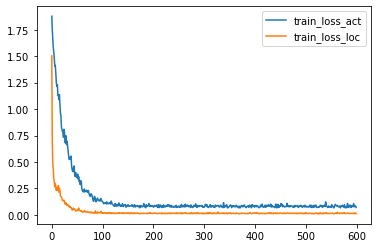

In [60]:
# train loss act vs loc
train_loss_act_df = pd.DataFrame(train_loss_act)
train_loss_act_df = train_loss_act_df.rename(columns={0:'train_loss_act'})
train_loss_loc_df = pd.DataFrame(train_loss_loc)
train_loss_loc_df = train_loss_loc_df.rename(columns={0:'train_loss_loc'})
pd.concat([train_loss_act_df,train_loss_loc_df], axis=1).plot()

<AxesSubplot:>

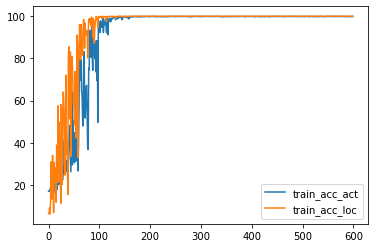

In [61]:
# train acc act vs loc
train_acc_act_df = pd.DataFrame(train_acc_act)
train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
train_acc_loc_df = pd.DataFrame(train_acc_loc)
train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:>

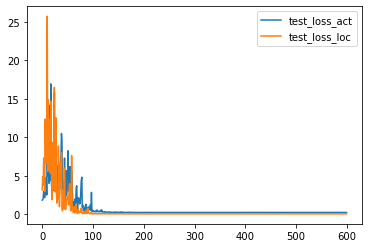

In [62]:
# test loss act vs loc
test_loss_act_df = pd.DataFrame(test_loss_act)
test_loss_act_df = test_loss_act_df.rename(columns={0:'test_loss_act'})
test_loss_loc_df = pd.DataFrame(test_loss_loc)
test_loss_loc_df = test_loss_loc_df.rename(columns={0:'test_loss_loc'})
pd.concat([test_loss_act_df,test_loss_loc_df], axis=1).plot()

<AxesSubplot:>

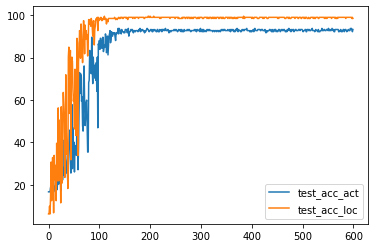

In [63]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

# Resnet

In [64]:
from models.apl import *

In [65]:
# aplnet = DenseNet()
aplnet = ResNet(block=BasicBlock, layers=[1, 1, 1, 1], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[2, 2, 2, 2], inchannel=52)
# aplnet = ResNet(block=BasicBlock, layers=[3, 4, 6, 3], inchannel=52)
#

# aplnet = ResNet(block=Bottleneck, layers=[2, 3, 4, 6])

aplnet = aplnet.cuda()

criterion = nn.CrossEntropyLoss(size_average=False).cuda()

optimizer = torch.optim.Adam(aplnet.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                #  milestones=[10, 20, 30, 40, 60, 70, 80, 90, 100, 110, 120, 130,
                                                #              140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 
                                                #              400, 450, 500, 550, 600],
                                                milestones = [i for i in range(20,600,20)],
                                                 gamma=0.5)

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [66]:
train_loss_act = np.zeros([num_epochs, 1])
train_loss_loc = np.zeros([num_epochs, 1])
test_loss_act = np.zeros([num_epochs, 1])
test_loss_loc = np.zeros([num_epochs, 1])
train_acc_act = np.zeros([num_epochs, 1])
train_acc_loc = np.zeros([num_epochs, 1])
test_acc_act = np.zeros([num_epochs, 1])
test_acc_loc = np.zeros([num_epochs, 1])

In [67]:
for epoch in range(num_epochs):
    print('Epoch:', epoch)
    aplnet.train()
    scheduler.step()
    # for i, (samples, labels) in enumerate(train_data_loader):
    loss_x = 0
    loss_y = 0
    for (samples, labels) in tqdm(train_data_loader):
        samplesV = Variable(samples.cuda())
        labels_act = labels[:, 0].squeeze()
        labels_loc = labels[:, 1].squeeze()
        labelsV_act = Variable(labels_act.cuda())
        labelsV_loc = Variable(labels_loc.cuda())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)

        loss = loss_act + loss_loc
        # loss = loss_loc
        # print(loss.item())
        loss.backward()
        optimizer.step()

        # loss = loss1+0.5*loss2+0.25*loss3+0.25*loss4
        # loss = loss1+loss2+loss3+loss4

        loss_x += loss_act.item()
        loss_y += loss_loc.item()

        # loss.backward()
        # optimizer.step()

    train_loss_act[epoch] = loss_x / num_train_instances
    train_loss_loc[epoch] = loss_y / num_train_instances

    aplnet.eval()
    # loss_x = 0
    correct_train_act = 0
    correct_train_loc = 0
    for i, (samples, labels) in enumerate(train_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels = labels.squeeze()

            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

            predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)

            prediction = predict_label_loc.data.max(1)[1]
            correct_train_loc += prediction.eq(labelsV_loc.data.long()).sum()

            prediction = predict_label_act.data.max(1)[1]
            correct_train_act += prediction.eq(labelsV_act.data.long()).sum()

            loss_act = criterion(predict_label_act, labelsV_act)
            loss_loc = criterion(predict_label_loc, labelsV_loc)
            # loss_x += loss.item()

    print("Activity Training accuracy:", (100 * float(correct_train_act) / num_train_instances))
    print("Location Training accuracy:", (100 * float(correct_train_loc) / num_train_instances))
    print("Activity Training loss:", loss_x / num_train_instances )
    print("Location Training loss:", loss_y / num_train_instances)

    # train_loss[epoch] = loss_x / num_train_instances
    train_acc_act[epoch] = 100 * float(correct_train_act) / num_train_instances
    train_acc_loc[epoch] = 100 * float(correct_train_loc) / num_train_instances


    trainacc_act = str(100 * float(correct_train_act) / num_train_instances)[0:6]
    trainacc_loc = str(100 * float(correct_train_loc) / num_train_instances)[0:6]
    

    loss_x = 0
    loss_y = 0
    correct_test_act = 0
    correct_test_loc = 0
    for i, (samples, labels) in enumerate(test_data_loader):
        with torch.no_grad():
            samplesV = Variable(samples.cuda())
            labels_act = labels[:, 0].squeeze()
            labels_loc = labels[:, 1].squeeze()
            labelsV_act = Variable(labels_act.cuda())
            labelsV_loc = Variable(labels_loc.cuda())

        predict_label_act, predict_label_loc,_,_,_,_,_,_,_ = aplnet(samplesV)
        prediction = predict_label_act.data.max(1)[1]
        correct_test_act += prediction.eq(labelsV_act.data.long()).sum()

        prediction = predict_label_loc.data.max(1)[1]
        correct_test_loc += prediction.eq(labelsV_loc.data.long()).sum()

        loss_act = criterion(predict_label_act, labelsV_act)
        loss_loc = criterion(predict_label_loc, labelsV_loc)
        loss_x += loss_act.item()
        loss_y += loss_loc.item()

    print("Activity Test accuracy:", (100 * float(correct_test_act) / num_test_instances))
    print("Location Test accuracy:", (100 * float(correct_test_loc) / num_test_instances))
    print("Activity Test loss:", loss_x / num_test_instances )
    print("Location Test loss:", loss_y / num_test_instances)

    test_loss_act[epoch] = loss_x / num_test_instances
    test_acc_act[epoch] = 100 * float(correct_test_act) / num_test_instances

    test_loss_loc[epoch] = loss_y / num_test_instances
    test_acc_loc[epoch] = 100 * float(correct_test_loc) / num_test_instances

    testacc_act = str(100 * float(correct_test_act) / num_test_instances)[0:6]
    testacc_loc = str(100 * float(correct_test_loc) / num_test_instances)[0:6]

    if epoch == 0:
        temp_test = correct_test_act
        temp_train = correct_train_act
    elif correct_test_act > temp_test:
        torch.save(aplnet, 'weights/net1111epoch' + str(
            epoch) + 'Train' + trainacc_act + 'Test' + testacc_act + 'Train' + trainacc_loc + 'Test' + testacc_loc + '.pkl')

        temp_test = correct_test_act
        temp_train = correct_train_act


# for learning curves
sio.savemat(
    'result/net1111TrainLossAct_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_act})
sio.savemat(
    'result/net1111TestLossACT_Train' + str(100 * float(temp_train) / num_train_instances)[
                                                                0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_act})
sio.savemat(
    'result/net1111TrainLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'train_loss': train_loss_loc})
sio.savemat(
    'result/net1111TestLossLOC_Train' + str(100 * float(temp_train) / num_train_instances)[
                                 0:6] + 'Test' + str(
        100 * float(temp_test) / num_test_instances)[0:6] + '.mat', {'test_loss': test_loss_loc})

sio.savemat('result/net1111TrainAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_act})
sio.savemat('result/net1111TestAccuracyACT_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_act})
print(str(100 * float(temp_test) / num_test_instances)[0:6])

sio.savemat('result/net1111TrainAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'train_acc': train_acc_loc})
sio.savemat('result/net1111TestAccuracyLOC_Train' + str(
    100 * float(temp_train) / num_train_instances)[0:6] + 'Test' + str(100 * float(temp_test) / num_test_instances)[
                                                                   0:6] + '.mat', {'test_acc': test_acc_loc})

/home/user2/miniconda3/envs/torch_cuda111/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.49it/s]


Activity Training accuracy: 17.425742574257427
Location Training accuracy: 6.336633663366337
Activity Training loss: 1.7782327784170018
Location Training loss: 1.3361733351603593
Activity Test accuracy: 16.666666666666668
Location Test accuracy: 6.25
Activity Test loss: 1.853729248046875
Location Test loss: 3.9525134563446045
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 17.326732673267326
Location Training accuracy: 10.792079207920793
Activity Training loss: 1.4299742217111115
Location Training loss: 0.5143019610112256
Activity Test accuracy: 17.708333333333332
Location Test accuracy: 10.416666666666666
Activity Test loss: 1.917906920115153
Location Test loss: 4.020195643107097
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.61it/s]


Activity Training accuracy: 18.11881188118812
Location Training accuracy: 7.623762376237623
Activity Training loss: 1.2106826253456644
Location Training loss: 0.3864351480314047
Activity Test accuracy: 18.75
Location Test accuracy: 6.770833333333333
Activity Test loss: 2.3735844691594443
Location Test loss: 4.767504374186198
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.26it/s]


Activity Training accuracy: 23.564356435643564
Location Training accuracy: 18.019801980198018
Activity Training loss: 1.0318790095867496
Location Training loss: 0.2847048315671411
Activity Test accuracy: 25.0
Location Test accuracy: 16.666666666666668
Activity Test loss: 2.1072109937667847
Location Test loss: 3.163997491200765
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.54it/s]


Activity Training accuracy: 34.75247524752475
Location Training accuracy: 43.46534653465346
Activity Training loss: 0.9877193073234936
Location Training loss: 0.29701290225038435
Activity Test accuracy: 29.6875
Location Test accuracy: 39.583333333333336
Activity Test loss: 2.2851540247599282
Location Test loss: 2.9055868784586587
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 24.257425742574256
Location Training accuracy: 16.435643564356436
Activity Training loss: 0.9072860415619198
Location Training loss: 0.3192316763471849
Activity Test accuracy: 19.791666666666668
Location Test accuracy: 16.145833333333332
Activity Test loss: 2.159406383832296
Location Test loss: 5.564042250315349
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.26it/s]


Activity Training accuracy: 22.77227722772277
Location Training accuracy: 30.099009900990097
Activity Training loss: 0.8129388752550182
Location Training loss: 0.20007860353677578
Activity Test accuracy: 21.875
Location Test accuracy: 31.25
Activity Test loss: 2.6983187993367515
Location Test loss: 3.373565196990967
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 40.495049504950494
Location Training accuracy: 48.51485148514851
Activity Training loss: 0.7062776244512879
Location Training loss: 0.19330257566848605
Activity Test accuracy: 40.625
Location Test accuracy: 46.875
Activity Test loss: 1.6915982564290364
Location Test loss: 1.6986473004023235
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.59it/s]


Activity Training accuracy: 38.31683168316832
Location Training accuracy: 43.76237623762376
Activity Training loss: 0.6251144031486889
Location Training loss: 0.1978610898008441
Activity Test accuracy: 32.8125
Location Test accuracy: 45.3125
Activity Test loss: 2.2921510537465415
Location Test loss: 2.4324358304341636
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.58it/s]


Activity Training accuracy: 50.59405940594059
Location Training accuracy: 49.40594059405941
Activity Training loss: 0.5332452453008972
Location Training loss: 0.16361636926632117
Activity Test accuracy: 48.958333333333336
Location Test accuracy: 48.958333333333336
Activity Test loss: 2.216777722040812
Location Test loss: 1.8646832704544067
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.68it/s]


Activity Training accuracy: 40.2970297029703
Location Training accuracy: 35.445544554455445
Activity Training loss: 0.4607260581290368
Location Training loss: 0.19253825810876224
Activity Test accuracy: 39.0625
Location Test accuracy: 34.895833333333336
Activity Test loss: 2.2813570896784463
Location Test loss: 3.9996635913848877
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.05it/s]


Activity Training accuracy: 31.683168316831683
Location Training accuracy: 16.73267326732673
Activity Training loss: 0.426589294471363
Location Training loss: 0.1747675855561058
Activity Test accuracy: 31.770833333333332
Location Test accuracy: 16.666666666666668
Activity Test loss: 3.5892327626546225
Location Test loss: 11.164118448893229
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 41.78217821782178
Location Training accuracy: 45.04950495049505
Activity Training loss: 0.34168113104187614
Location Training loss: 0.11415174998859368
Activity Test accuracy: 39.583333333333336
Location Test accuracy: 44.270833333333336
Activity Test loss: 2.7189707358678183
Location Test loss: 2.851752440134684
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.45it/s]


Activity Training accuracy: 42.87128712871287
Location Training accuracy: 36.43564356435643
Activity Training loss: 0.30062262752268576
Location Training loss: 0.15215060451243184
Activity Test accuracy: 41.666666666666664
Location Test accuracy: 38.541666666666664
Activity Test loss: 2.180143356323242
Location Test loss: 3.081616004308065
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 28.81188118811881
Location Training accuracy: 28.514851485148515
Activity Training loss: 0.28508848624654337
Location Training loss: 0.13299675223850968
Activity Test accuracy: 27.083333333333332
Location Test accuracy: 29.166666666666668
Activity Test loss: 2.8233604033788047
Location Test loss: 3.0882163047790527
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.54it/s]


Activity Training accuracy: 44.554455445544555
Location Training accuracy: 55.84158415841584
Activity Training loss: 0.26551567587521996
Location Training loss: 0.12265452842901249
Activity Test accuracy: 42.1875
Location Test accuracy: 57.291666666666664
Activity Test loss: 2.3863099813461304
Location Test loss: 1.7461519241333008
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.85it/s]


Activity Training accuracy: 46.73267326732673
Location Training accuracy: 59.40594059405941
Activity Training loss: 0.25512109935873806
Location Training loss: 0.10413075508457599
Activity Test accuracy: 46.354166666666664
Location Test accuracy: 55.729166666666664
Activity Test loss: 3.0571913719177246
Location Test loss: 2.138713757197062
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.02it/s]


Activity Training accuracy: 51.18811881188119
Location Training accuracy: 47.12871287128713
Activity Training loss: 0.1921511215738731
Location Training loss: 0.1226866074127726
Activity Test accuracy: 46.875
Location Test accuracy: 45.833333333333336
Activity Test loss: 2.1636826197306314
Location Test loss: 3.248812198638916
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 59.9009900990099
Location Training accuracy: 63.960396039603964
Activity Training loss: 0.12602734730975462
Location Training loss: 0.07292590542594986
Activity Test accuracy: 57.291666666666664
Location Test accuracy: 58.333333333333336
Activity Test loss: 1.946675221125285
Location Test loss: 1.6709680557250977
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.29it/s]


Activity Training accuracy: 75.74257425742574
Location Training accuracy: 91.48514851485149
Activity Training loss: 0.08863792490250993
Location Training loss: 0.06037978193547466
Activity Test accuracy: 65.625
Location Test accuracy: 86.97916666666667
Activity Test loss: 1.2374572555224101
Location Test loss: 0.3926200270652771
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.46it/s]


Activity Training accuracy: 87.02970297029702
Location Training accuracy: 88.01980198019803
Activity Training loss: 0.04129605623755125
Location Training loss: 0.0436891759386157
Activity Test accuracy: 73.95833333333333
Location Test accuracy: 80.72916666666667
Activity Test loss: 0.7540051937103271
Location Test loss: 0.6790306667486826
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.89it/s]


Activity Training accuracy: 98.31683168316832
Location Training accuracy: 94.95049504950495
Activity Training loss: 0.034967931603441145
Location Training loss: 0.02958987827348237
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 88.02083333333333
Activity Test loss: 0.4505101939042409
Location Test loss: 0.31560589373111725
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.62it/s]


Activity Training accuracy: 77.82178217821782
Location Training accuracy: 80.6930693069307
Activity Training loss: 0.029423839680039057
Location Training loss: 0.025867846460625676
Activity Test accuracy: 70.3125
Location Test accuracy: 75.0
Activity Test loss: 1.0396836996078491
Location Test loss: 0.9067840178807577
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.04it/s]


Activity Training accuracy: 82.67326732673267
Location Training accuracy: 77.62376237623762
Activity Training loss: 0.018623944733402516
Location Training loss: 0.020035520432018998
Activity Test accuracy: 69.79166666666667
Location Test accuracy: 72.91666666666667
Activity Test loss: 0.9235995610555013
Location Test loss: 1.0262997150421143
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.54it/s]


Activity Training accuracy: 71.88118811881188
Location Training accuracy: 88.51485148514851
Activity Training loss: 0.021252419570885084
Location Training loss: 0.035809295661378616
Activity Test accuracy: 62.5
Location Test accuracy: 83.33333333333333
Activity Test loss: 1.6314628918965657
Location Test loss: 0.5293017427126566
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 77.02970297029702
Location Training accuracy: 91.78217821782178
Activity Training loss: 0.017361825557038336
Location Training loss: 0.019470744734943504
Activity Test accuracy: 68.75
Location Test accuracy: 85.9375
Activity Test loss: 1.3722734053929646
Location Test loss: 0.4715382009744644
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 95.14851485148515
Location Training accuracy: 95.74257425742574
Activity Training loss: 0.019243109167212308
Location Training loss: 0.026141002331629838
Activity Test accuracy: 84.89583333333333
Location Test accuracy: 90.10416666666667
Activity Test loss: 0.6352526545524597
Location Test loss: 0.29759255051612854
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.87it/s]


Activity Training accuracy: 98.41584158415841
Location Training accuracy: 99.70297029702971
Activity Training loss: 0.010023106310037102
Location Training loss: 0.02061168952743606
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 92.70833333333333
Activity Test loss: 0.4673307041327159
Location Test loss: 0.19474048912525177
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.26it/s]


Activity Training accuracy: 74.05940594059406
Location Training accuracy: 92.17821782178218
Activity Training loss: 0.008080326861674243
Location Training loss: 0.010365372232281336
Activity Test accuracy: 65.10416666666667
Location Test accuracy: 88.54166666666667
Activity Test loss: 1.5177036722501118
Location Test loss: 0.36114656428496045
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.56it/s]


Activity Training accuracy: 80.4950495049505
Location Training accuracy: 94.05940594059406
Activity Training loss: 0.007677357975799258
Location Training loss: 0.01269900391597559
Activity Test accuracy: 72.39583333333333
Location Test accuracy: 89.58333333333333
Activity Test loss: 1.1212513049443562
Location Test loss: 0.2823158800601959
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.62it/s]


Activity Training accuracy: 97.32673267326733
Location Training accuracy: 99.60396039603961
Activity Training loss: 0.006945361433052781
Location Training loss: 0.007776906525734628
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 96.875
Activity Test loss: 0.4948450227578481
Location Test loss: 0.08605251461267471
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.006429197764632725
Location Training loss: 0.008861677068294865
Activity Test accuracy: 89.0625
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.3946837584177653
Location Test loss: 0.13744954764842987
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.14it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.5049504950495
Activity Training loss: 0.004614241775309685
Location Training loss: 0.008079168377536357
Activity Test accuracy: 83.33333333333333
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.44962969422340393
Location Test loss: 0.14130749801794687
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.004238876965966555
Location Training loss: 0.00486850423535498
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3423407624165217
Location Test loss: 0.10492362454533577
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.005591743255015647
Location Training loss: 0.007053391384606314
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.40192681550979614
Location Test loss: 0.13869401750465235
Epoch: 35


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.8019801980198
Activity Training loss: 0.004307925376561609
Location Training loss: 0.009112071113126112
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.34970035155614215
Location Test loss: 0.13548477118213972
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0032633011072578997
Location Training loss: 0.004965241614839818
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.32222143809000653
Location Test loss: 0.12263826032479604
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002361898515189048
Location Training loss: 0.003503786012677863
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 95.3125
Activity Test loss: 0.319836288690567
Location Test loss: 0.13414271672566733
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002741924179072427
Location Training loss: 0.0035845012726760145
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3489592373371124
Location Test loss: 0.09024617945154507
Epoch: 39


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002275539823982975
Location Training loss: 0.002615169915232328
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.3269052406152089
Location Test loss: 0.10011746982733409
Epoch: 40


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.003024191011001568
Location Training loss: 0.002923999748902746
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3843069573243459
Location Test loss: 0.1004387562473615
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0024142686904657005
Location Training loss: 0.0033850674508231703
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.30009456475575763
Location Test loss: 0.1076146699488163
Epoch: 42


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002864543215768172
Location Training loss: 0.004179613948753565
Activity Test accuracy: 89.0625
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.3319052259127299
Location Test loss: 0.11985791474580765
Epoch: 43


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 99.20792079207921
Activity Training loss: 0.002959939191984658
Location Training loss: 0.0065106871768389595
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 94.79166666666667
Activity Test loss: 0.4091100295384725
Location Test loss: 0.19550307095050812
Epoch: 44


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.21it/s]


Activity Training accuracy: 97.32673267326733
Location Training accuracy: 99.20792079207921
Activity Training loss: 0.002759427695286156
Location Training loss: 0.004338345197167727
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 93.75
Activity Test loss: 0.4736683964729309
Location Test loss: 0.17803871879975
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0021091828952626425
Location Training loss: 0.002709239691790968
Activity Test accuracy: 87.5
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3830202519893646
Location Test loss: 0.1159257913629214
Epoch: 46


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018309110609611662
Location Training loss: 0.0028117706279943487
Activity Test accuracy: 87.5
Location Test accuracy: 95.3125
Activity Test loss: 0.3826894462108612
Location Test loss: 0.13717730343341827
Epoch: 47


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002385014450491065
Location Training loss: 0.002786040767142088
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30574172735214233
Location Test loss: 0.09715642035007477
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014484037967896699
Location Training loss: 0.0031010277975018663
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.33897628386815387
Location Test loss: 0.112836009512345
Epoch: 49


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001507153528014032
Location Training loss: 0.005627890967644087
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.3139316538969676
Location Test loss: 0.12710114320119223
Epoch: 50


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0018059104902319388
Location Training loss: 0.0022067160225740755
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.31844831506411236
Location Test loss: 0.11337865516543388
Epoch: 51


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.56it/s]


Activity Training accuracy: 99.70297029702971
Location Training accuracy: 97.72277227722772
Activity Training loss: 0.0021585845047294504
Location Training loss: 0.008759953428318005
Activity Test accuracy: 86.45833333333333
Location Test accuracy: 90.625
Activity Test loss: 0.47716623544692993
Location Test loss: 0.24652361869812012
Epoch: 52


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002126469005747597
Location Training loss: 0.0037254678362076826
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.34929824868837994
Location Test loss: 0.10035598774751027
Epoch: 53


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.65it/s]


Activity Training accuracy: 99.9009900990099
Location Training accuracy: 98.7128712871287
Activity Training loss: 0.0031989796732616897
Location Training loss: 0.004800147533711821
Activity Test accuracy: 89.0625
Location Test accuracy: 93.75
Activity Test loss: 0.39893218874931335
Location Test loss: 0.1840525964895884
Epoch: 54


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.38it/s]


Activity Training accuracy: 99.4059405940594
Location Training accuracy: 99.9009900990099
Activity Training loss: 0.0029111102002091927
Location Training loss: 0.004490922590588579
Activity Test accuracy: 89.0625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.4441329638163249
Location Test loss: 0.18277008831501007
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001987071206221486
Location Training loss: 0.0018717569806198083
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3774450719356537
Location Test loss: 0.11436192318797112
Epoch: 56


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.67it/s]


Activity Training accuracy: 99.3069306930693
Location Training accuracy: 97.92079207920793
Activity Training loss: 0.0031822054397941816
Location Training loss: 0.0030074505817772137
Activity Test accuracy: 86.97916666666667
Location Test accuracy: 91.66666666666667
Activity Test loss: 0.43711355328559875
Location Test loss: 0.2575637598832448
Epoch: 57


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.004067944713158182
Location Training loss: 0.002113336332068585
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 94.27083333333333
Activity Test loss: 0.33193331956863403
Location Test loss: 0.18654634058475494
Epoch: 58


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0029429255698872085
Location Training loss: 0.0019149304542801168
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.4311563620964686
Location Test loss: 0.12099546939134598
Epoch: 59


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015867722949179093
Location Training loss: 0.0022177059387806617
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3349025746186574
Location Test loss: 0.10024816915392876
Epoch: 60


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0019844245054934286
Location Training loss: 0.0015727124370560788
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3095868726571401
Location Test loss: 0.10621803378065427
Epoch: 61


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0022635648967606007
Location Training loss: 0.0020997627647501406
Activity Test accuracy: 90.625
Location Test accuracy: 95.83333333333333
Activity Test loss: 0.31562666098276776
Location Test loss: 0.1344423828025659
Epoch: 62


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0027678036564352487
Location Training loss: 0.0021667233751256868
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.32460280259450275
Location Test loss: 0.10979775277276833
Epoch: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015538994481067846
Location Training loss: 0.001799913676510943
Activity Test accuracy: 88.54166666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3729201555252075
Location Test loss: 0.10492905043065548
Epoch: 64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013171571279221243
Location Training loss: 0.0016285289447791505
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.35255059599876404
Location Test loss: 0.09803049763043721
Epoch: 65


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012795231240515662
Location Training loss: 0.0012955630437867477
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.316616823275884
Location Test loss: 0.0823425663014253
Epoch: 66


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001366798306750779
Location Training loss: 0.0012935769919416693
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3165440261363983
Location Test loss: 0.08980985544621944
Epoch: 67


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010665681618865174
Location Training loss: 0.001357252416339251
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3223385214805603
Location Test loss: 0.08632978796958923
Epoch: 68


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.07it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013389488331752247
Location Training loss: 0.0010419902603815098
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.31938524047533673
Location Test loss: 0.0889890156686306
Epoch: 69


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013789866082739122
Location Training loss: 0.0010713204372637343
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.323220690091451
Location Test loss: 0.09865500094989936
Epoch: 70


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001112138732603871
Location Training loss: 0.0012005687497629977
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3149206340312958
Location Test loss: 0.09729281005760033
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009869645838395205
Location Training loss: 0.0010775696080509978
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.31509101390838623
Location Test loss: 0.09171103810270627
Epoch: 72


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008478101933061486
Location Training loss: 0.0012445031674486575
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3121592104434967
Location Test loss: 0.09495913485685985
Epoch: 73


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001751638668598515
Location Training loss: 0.0015555550556371708
Activity Test accuracy: 88.02083333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3345479766527812
Location Test loss: 0.08887078861395518
Epoch: 74


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013809973761291787
Location Training loss: 0.0020090364251691517
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3277120490868886
Location Test loss: 0.11037057513991992
Epoch: 75


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011251588232151352
Location Training loss: 0.001302846646544957
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30885130167007446
Location Test loss: 0.10276345411936443
Epoch: 76


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010484977007502376
Location Training loss: 0.0013585152418011486
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30793052911758423
Location Test loss: 0.10585443551341693
Epoch: 77


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001010306537298873
Location Training loss: 0.0008505562449445819
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3058185974756877
Location Test loss: 0.09365567627052467
Epoch: 78


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007512571327019446
Location Training loss: 0.001071868648771012
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3074936668078105
Location Test loss: 0.0877669130762418
Epoch: 79


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011607691387433817
Location Training loss: 0.0009527349014683526
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3085634112358093
Location Test loss: 0.09343654414017995
Epoch: 80


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013424572525638165
Location Training loss: 0.0010217398110002574
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3131347596645355
Location Test loss: 0.09604727104306221
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009218372552111597
Location Training loss: 0.0011322218519036133
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.91666666666667
Activity Test loss: 0.3138352731863658
Location Test loss: 0.09631197775403659
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001042329840878449
Location Training loss: 0.0011080692347028467
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3070237338542938
Location Test loss: 0.09673177823424339
Epoch: 83


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008969986460881658
Location Training loss: 0.0007885087982262715
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.3087860941886902
Location Test loss: 0.09390024902919929
Epoch: 84


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008788507819028183
Location Training loss: 0.0008133042806593499
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30519533157348633
Location Test loss: 0.09498166479170322
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009517881521346546
Location Training loss: 0.001022007085825547
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3061957061290741
Location Test loss: 0.09522473439574242
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009392308126581777
Location Training loss: 0.0009878412552989356
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3077508608500163
Location Test loss: 0.09682097161809604
Epoch: 87


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011325231725626652
Location Training loss: 0.0011020236842260503
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3037420113881429
Location Test loss: 0.09545208265384038
Epoch: 88


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008442959849639694
Location Training loss: 0.0011971299785493623
Activity Test accuracy: 89.0625
Location Test accuracy: 96.875
Activity Test loss: 0.3058667580286662
Location Test loss: 0.09406775174041589
Epoch: 89


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010783834788616342
Location Training loss: 0.0012225731783131561
Activity Test accuracy: 89.0625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3081081807613373
Location Test loss: 0.09976331020394962
Epoch: 90


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008641959158795895
Location Training loss: 0.000796424429679271
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.2960981825987498
Location Test loss: 0.10982032120227814
Epoch: 91


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012128808305110082
Location Training loss: 0.0015737834727705116
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29888341824213666
Location Test loss: 0.10811270400881767
Epoch: 92


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008536284918537234
Location Training loss: 0.0008422392706322198
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.30612655480702716
Location Test loss: 0.10638683910171191
Epoch: 93


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013699878873949004
Location Training loss: 0.0018317871422755835
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.32449471950531006
Location Test loss: 0.09497531813879807
Epoch: 94


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007994660314651999
Location Training loss: 0.0008573609099972366
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3197072744369507
Location Test loss: 0.0946923258403937
Epoch: 95


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008625902862537025
Location Training loss: 0.0009194023501459915
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29880716403325397
Location Test loss: 0.09730155455569427
Epoch: 96


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008880013692201955
Location Training loss: 0.0011875204631302616
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3009846011797587
Location Test loss: 0.10053094786902268
Epoch: 97


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012426775815610838
Location Training loss: 0.0012425963038412652
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3039331336816152
Location Test loss: 0.09762785397469997
Epoch: 98


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009269334191437995
Location Training loss: 0.0010053142038459824
Activity Test accuracy: 90.625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30265193184216815
Location Test loss: 0.08952582813799381
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010629625032001202
Location Training loss: 0.0016204672967000764
Activity Test accuracy: 91.66666666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2936571041742961
Location Test loss: 0.091654888043801
Epoch: 100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000754266560520276
Location Training loss: 0.0009194583954787491
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2967066168785095
Location Test loss: 0.09249597663680713
Epoch: 101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008397854864597321
Location Training loss: 0.0009735445685610912
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3007351855436961
Location Test loss: 0.09650896303355694
Epoch: 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000982837906420821
Location Training loss: 0.0010178229338166738
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3046868145465851
Location Test loss: 0.09403399129708608
Epoch: 103


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007785061374306679
Location Training loss: 0.0009429441156363724
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3077654242515564
Location Test loss: 0.09595947774748008
Epoch: 104


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008881953443483551
Location Training loss: 0.0009703623075591456
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30321475863456726
Location Test loss: 0.10008236393332481
Epoch: 105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007449687891962505
Location Training loss: 0.0008522345933436168
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30576494336128235
Location Test loss: 0.09680988701681296
Epoch: 106


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008647348860850428
Location Training loss: 0.0008084603483871658
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3043251434961955
Location Test loss: 0.09758028884728749
Epoch: 107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007095703560084399
Location Training loss: 0.0006473550997158088
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30197352170944214
Location Test loss: 0.10066140629351139
Epoch: 108


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009504019919008311
Location Training loss: 0.0009682399838572682
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3000378906726837
Location Test loss: 0.09728001182277997
Epoch: 109


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001231902090851033
Location Training loss: 0.001234489400861877
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.303472379843394
Location Test loss: 0.09808928892016411
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008074409024107574
Location Training loss: 0.0009111986099050777
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.306137611468633
Location Test loss: 0.09789784190555413
Epoch: 111


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008498145857512361
Location Training loss: 0.000659303383735737
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2979058821996053
Location Test loss: 0.10147104784846306
Epoch: 112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007856591835175411
Location Training loss: 0.0007078047620482965
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29741233587265015
Location Test loss: 0.09828274883329868
Epoch: 113


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00094676986889969
Location Training loss: 0.0008161640218874016
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3007526199022929
Location Test loss: 0.0978349894285202
Epoch: 114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008660546550066164
Location Training loss: 0.0007603661184853846
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30588090419769287
Location Test loss: 0.09597867665191491
Epoch: 115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009684074467214027
Location Training loss: 0.0013247897498088307
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3039532204469045
Location Test loss: 0.09972239471971989
Epoch: 116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007936002188684917
Location Training loss: 0.000676694862765841
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3034515579541524
Location Test loss: 0.09801913611590862
Epoch: 117


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012476777731634603
Location Training loss: 0.0007624882725205752
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30231718222300213
Location Test loss: 0.09698957577347755
Epoch: 118


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008811132576648552
Location Training loss: 0.0010937267102965034
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30593258142471313
Location Test loss: 0.09666993220647176
Epoch: 119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0019224546176593493
Location Training loss: 0.00100139300385029
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.296455313762029
Location Test loss: 0.09555302374064922
Epoch: 120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010249739180844609
Location Training loss: 0.0011039526635172343
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.29871708154678345
Location Test loss: 0.09661980097492535
Epoch: 121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008749337756250164
Location Training loss: 0.000901211820321508
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.2977217535177867
Location Test loss: 0.09655278796950977
Epoch: 122


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007767321726325715
Location Training loss: 0.0009107635015308267
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.29329976439476013
Location Test loss: 0.09700408143301804
Epoch: 123


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009756142144451047
Location Training loss: 0.0011035069085583828
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.2929672300815582
Location Test loss: 0.09478134537736575
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013901941220063974
Location Training loss: 0.0010796932780211515
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.29562243819236755
Location Test loss: 0.094197453930974
Epoch: 125


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007168088477141787
Location Training loss: 0.0007809097260826885
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.29548656940460205
Location Test loss: 0.0951038555552562
Epoch: 126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009762687958998255
Location Training loss: 0.0008709475158317254
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.29721017678578693
Location Test loss: 0.09649159262577693
Epoch: 127


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009365580330538278
Location Training loss: 0.0012912017394705573
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29459819197654724
Location Test loss: 0.09894109703600407
Epoch: 128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008011481106871425
Location Training loss: 0.0008044701475318116
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2974277238051097
Location Test loss: 0.09618470072746277
Epoch: 129


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009067513325279302
Location Training loss: 0.0009973824079526532
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29971325397491455
Location Test loss: 0.0950248787800471
Epoch: 130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012031327527348358
Location Training loss: 0.0015496468521875911
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29942774772644043
Location Test loss: 0.09934475272893906
Epoch: 131


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0014705937466408946
Location Training loss: 0.0011979449485050569
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30289725462595624
Location Test loss: 0.10203107198079427
Epoch: 132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001964311687146673
Location Training loss: 0.0010212790811120875
Activity Test accuracy: 91.14583333333333
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.2962278872728348
Location Test loss: 0.1088458231339852
Epoch: 133


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009372428944795438
Location Training loss: 0.001073490492630713
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2971529463926951
Location Test loss: 0.1068435541043679
Epoch: 134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0026071502541256423
Location Training loss: 0.003105377149537648
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3040218750635783
Location Test loss: 0.10032519822319348
Epoch: 135


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0013754070155543856
Location Training loss: 0.002256630211699717
Activity Test accuracy: 90.625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30515827735265094
Location Test loss: 0.10785442280272643
Epoch: 136


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009071903266381509
Location Training loss: 0.0008469978826913503
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2973534067471822
Location Test loss: 0.10758187000950177
Epoch: 137


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009273171056025099
Location Training loss: 0.0024430540676164156
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.29475801189740497
Location Test loss: 0.10324699183305104
Epoch: 138


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009459108759713645
Location Training loss: 0.000798717856702238
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.2991737723350525
Location Test loss: 0.10305438873668511
Epoch: 139


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009177328686755483
Location Training loss: 0.0007749668387050676
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.302131046851476
Location Test loss: 0.10170596092939377
Epoch: 140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002047056898400925
Location Training loss: 0.0010279589858238059
Activity Test accuracy: 90.625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3029255171616872
Location Test loss: 0.10538371279835701
Epoch: 141


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009297204784827658
Location Training loss: 0.0010912838161434278
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30211660265922546
Location Test loss: 0.1035728578766187
Epoch: 142


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012282915007654984
Location Training loss: 0.0008793593061589959
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3101168175538381
Location Test loss: 0.10081181426843007
Epoch: 143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008155762098065697
Location Training loss: 0.0007328352605057235
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.31116169691085815
Location Test loss: 0.09928117257853349
Epoch: 144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007390131768171149
Location Training loss: 0.001062744866945956
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30782825748125714
Location Test loss: 0.1005086787045002
Epoch: 145


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007554440934321668
Location Training loss: 0.000743543526323715
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3067179322242737
Location Test loss: 0.10086892731487751
Epoch: 146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006364002565641215
Location Training loss: 0.0006735099368903897
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3039889434973399
Location Test loss: 0.1035443376749754
Epoch: 147


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009661109325024161
Location Training loss: 0.0010054881361746552
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3069269160429637
Location Test loss: 0.10169803909957409
Epoch: 148


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007837915055380009
Location Training loss: 0.0011416702743361493
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30177319049835205
Location Test loss: 0.10118249182899793
Epoch: 149


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008188444752209258
Location Training loss: 0.0007149712892599626
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30662357807159424
Location Test loss: 0.09850382742782433
Epoch: 150


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001033167882204646
Location Training loss: 0.0026574022016755427
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.31022239724795025
Location Test loss: 0.09916634547213714
Epoch: 151


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009616410009341664
Location Training loss: 0.0008633445302891259
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3066367705663045
Location Test loss: 0.10465583205223083
Epoch: 152


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008319647576991874
Location Training loss: 0.0009704043609228464
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29969295859336853
Location Test loss: 0.10601298573116462
Epoch: 153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008810271075603986
Location Training loss: 0.0008261184881229211
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3039438724517822
Location Test loss: 0.10541398885349433
Epoch: 154


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007053329950512045
Location Training loss: 0.0007354014009089753
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30027714371681213
Location Test loss: 0.10538532895346482
Epoch: 155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006246113227588115
Location Training loss: 0.0007739909583389169
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.304790993531545
Location Test loss: 0.1051894115904967
Epoch: 156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008804526954594225
Location Training loss: 0.001039130753367254
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3032241066296895
Location Test loss: 0.10943319586416085
Epoch: 157


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0004907429531806766
Location Training loss: 0.0006464801378326841
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3044203420480092
Location Test loss: 0.10784855547050635
Epoch: 158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008873068865868125
Location Training loss: 0.0008181780023444997
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3022848566373189
Location Test loss: 0.10671454109251499
Epoch: 159


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007800110163960126
Location Training loss: 0.001001662312831619
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3026713232199351
Location Test loss: 0.10728656686842442
Epoch: 160


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000918208167768351
Location Training loss: 0.0007238583676148169
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30283336838086444
Location Test loss: 0.10931287457545598
Epoch: 161


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008257243265905002
Location Training loss: 0.0011582198857080818
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30936557054519653
Location Test loss: 0.10967021373411019
Epoch: 162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008415722444948583
Location Training loss: 0.0012259956707458685
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30432917674382526
Location Test loss: 0.10536855707565944
Epoch: 163


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000855311976358442
Location Training loss: 0.0007761196851140201
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3057831625143687
Location Test loss: 0.10981825614968936
Epoch: 164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007570016059545008
Location Training loss: 0.0008155399472406595
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30147520701090497
Location Test loss: 0.11025049972037475
Epoch: 165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006817704103518241
Location Training loss: 0.0007236952810446815
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29934800664583844
Location Test loss: 0.11005305002133052
Epoch: 166


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007037075494628141
Location Training loss: 0.0008298699402868158
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30089282989501953
Location Test loss: 0.1090740052362283
Epoch: 167


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008078113161396272
Location Training loss: 0.0009295449601394115
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29991071422894794
Location Test loss: 0.11194970024128754
Epoch: 168


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007292570011450513
Location Training loss: 0.0010975434730696207
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30454232295354206
Location Test loss: 0.10834142503639062
Epoch: 169


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006885632190226328
Location Training loss: 0.0006376331045043351
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3030453523000081
Location Test loss: 0.1084347553551197
Epoch: 170


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008133879226475659
Location Training loss: 0.0009893626712336398
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30324992537498474
Location Test loss: 0.10760391503572464
Epoch: 171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000837704456309871
Location Training loss: 0.0007370476103802718
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3007540802160899
Location Test loss: 0.1051528329650561
Epoch: 172


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009064340097184228
Location Training loss: 0.0009553411791082656
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29868600765864056
Location Test loss: 0.10371867877741654
Epoch: 173


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010745362185015537
Location Training loss: 0.0012365470778676543
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3079872727394104
Location Test loss: 0.10587182392676671
Epoch: 174


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009832107674072285
Location Training loss: 0.0008777602806244746
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.2998772958914439
Location Test loss: 0.11172281329830487
Epoch: 175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006771316567417419
Location Training loss: 0.0007949905119615026
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3051541745662689
Location Test loss: 0.10974046277503173
Epoch: 176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007815016433596611
Location Training loss: 0.0010879538418485386
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3025437295436859
Location Test loss: 0.10492886664966743
Epoch: 177


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012682871690185944
Location Training loss: 0.0007850616672399021
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3044746220111847
Location Test loss: 0.10457823611795902
Epoch: 178


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000719708779660782
Location Training loss: 0.0006487128463121924
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2997916539510091
Location Test loss: 0.10837480301658313
Epoch: 179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006529365675431667
Location Training loss: 0.0010391997929551813
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3027087350686391
Location Test loss: 0.10282319039106369
Epoch: 180


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010200387309535896
Location Training loss: 0.0010112928189706094
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3034726281960805
Location Test loss: 0.1108581672112147
Epoch: 181


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007224516316068054
Location Training loss: 0.0008002710832965256
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2992855906486511
Location Test loss: 0.1075529723117749
Epoch: 182


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008853138120162605
Location Training loss: 0.00084753485746903
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3005513846874237
Location Test loss: 0.10985931692024072
Epoch: 183


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007625800437561357
Location Training loss: 0.0008046100856644093
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3021434048811595
Location Test loss: 0.10677683539688587
Epoch: 184


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007497893867663818
Location Training loss: 0.0012917528758839805
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30542975664138794
Location Test loss: 0.10425760596990585
Epoch: 185


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008468331529362367
Location Training loss: 0.0010871974714469202
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30309899648030597
Location Test loss: 0.10537863584856193
Epoch: 186


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007347679226705344
Location Training loss: 0.0007219095815821449
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29907557368278503
Location Test loss: 0.10991697510083516
Epoch: 187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009079532716238852
Location Training loss: 0.001017636660080735
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3026060958703359
Location Test loss: 0.10392206224302451
Epoch: 188


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008027492386132183
Location Training loss: 0.000869994274903052
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30335497856140137
Location Test loss: 0.10302690230309963
Epoch: 189


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006671451954263272
Location Training loss: 0.0007658424519813887
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.301897535721461
Location Test loss: 0.10623356079061826
Epoch: 190


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008499617218086035
Location Training loss: 0.000824487640863598
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3013327221075694
Location Test loss: 0.10713858157396317
Epoch: 191


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006281793228175381
Location Training loss: 0.0008769146968970205
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30020933349927265
Location Test loss: 0.10267731981972854
Epoch: 192


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006066739706709833
Location Training loss: 0.0006544696462183895
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3010769287745158
Location Test loss: 0.10701633741458257
Epoch: 193


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008850927916493746
Location Training loss: 0.0008634575633424343
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3029092649618785
Location Test loss: 0.10772124119102955
Epoch: 194


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000860534901592401
Location Training loss: 0.001016780800453507
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3024840255578359
Location Test loss: 0.10644374415278435
Epoch: 195


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000736093130147103
Location Training loss: 0.0007220495049611176
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2998979886372884
Location Test loss: 0.10288388406236966
Epoch: 196


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006005088014915438
Location Training loss: 0.000816562222224651
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29789583881696063
Location Test loss: 0.10083263802031676
Epoch: 197


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008980541407029227
Location Training loss: 0.001032499365951165
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.297686904668808
Location Test loss: 0.10416290039817493
Epoch: 198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006477047790690223
Location Training loss: 0.0006431079903008914
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3010601798693339
Location Test loss: 0.10891103682418664
Epoch: 199


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006991187829782467
Location Training loss: 0.0006886568971642173
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.306877722342809
Location Test loss: 0.10856177409489949
Epoch: 200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000712225014472952
Location Training loss: 0.0008245194570557906
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3057973384857178
Location Test loss: 0.1057941485196352
Epoch: 201


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007296928379795338
Location Training loss: 0.0007173119942740639
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3006310562292735
Location Test loss: 0.10504924319684505
Epoch: 202


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007178266302193746
Location Training loss: 0.001082507164982876
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2988639970620473
Location Test loss: 0.10265220329165459
Epoch: 203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008153966711004182
Location Training loss: 0.000989218670321573
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3005189299583435
Location Test loss: 0.10357603368659814
Epoch: 204


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006553767617828775
Location Training loss: 0.0006712519831143984
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30270956953366596
Location Test loss: 0.1047616967310508
Epoch: 205


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011025528266730875
Location Training loss: 0.0012580225981845715
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3025290568669637
Location Test loss: 0.10265576715270679
Epoch: 206


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006832144075617342
Location Training loss: 0.0006513089937443781
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30001484354337055
Location Test loss: 0.10478431669374307
Epoch: 207


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000759782854209442
Location Training loss: 0.000942765534071639
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3052782714366913
Location Test loss: 0.104898976162076
Epoch: 208


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.29it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006185494741369592
Location Training loss: 0.0008412560743122998
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29906537135442096
Location Test loss: 0.10210374183952808
Epoch: 209


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000979511668481449
Location Training loss: 0.0008803628643255422
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2994452714920044
Location Test loss: 0.10744893737137318
Epoch: 210


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008062483355550482
Location Training loss: 0.0007659847304077431
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3039479653040568
Location Test loss: 0.10799508541822433
Epoch: 211


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008137091256604336
Location Training loss: 0.0006601361152116615
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.299881915251414
Location Test loss: 0.10817302390933037
Epoch: 212


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000759694417293119
Location Training loss: 0.0007199331195932803
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3003254433472951
Location Test loss: 0.10418354098995526
Epoch: 213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007279656643029487
Location Training loss: 0.0006943518812261005
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3027152220408122
Location Test loss: 0.10543812749286492
Epoch: 214


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009308607345170313
Location Training loss: 0.0010435107007327647
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3023131688435872
Location Test loss: 0.10667610416809718
Epoch: 215


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007421131992694175
Location Training loss: 0.0014961366772209064
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3002012570699056
Location Test loss: 0.10284634865820408
Epoch: 216


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 89.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006677218408572792
Location Training loss: 0.000885170423379629
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2964744468530019
Location Test loss: 0.10278213955461979
Epoch: 217


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007291697205440833
Location Training loss: 0.0016899847453183466
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3011726538340251
Location Test loss: 0.10449810946981113
Epoch: 218


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009161538896289202
Location Training loss: 0.0008588444349346775
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3025069832801819
Location Test loss: 0.10265863128006458
Epoch: 219


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006575814365307884
Location Training loss: 0.0008363371862485857
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29683758815129596
Location Test loss: 0.10629948352773984
Epoch: 220


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.49it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008374988258180051
Location Training loss: 0.0012937991538702852
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3033094306786855
Location Test loss: 0.10492009731630485
Epoch: 221


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007401425944696558
Location Training loss: 0.0009108431747939327
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3017432689666748
Location Test loss: 0.10327416782577832
Epoch: 222


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007817271230096864
Location Training loss: 0.0008272483760472572
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30090802907943726
Location Test loss: 0.1046657854070266
Epoch: 223


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007327771349118487
Location Training loss: 0.0008687860212556206
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29996511340141296
Location Test loss: 0.10402239797015984
Epoch: 224


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009242519219913105
Location Training loss: 0.001305040610161158
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3041129211584727
Location Test loss: 0.10129355018337567
Epoch: 225


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007820342455317478
Location Training loss: 0.0008378800650191779
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30233994126319885
Location Test loss: 0.10839927569031715
Epoch: 226


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007128656537521003
Location Training loss: 0.000685045095437234
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3019052545229594
Location Test loss: 0.10704320048292477
Epoch: 227


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007569799513214886
Location Training loss: 0.0009217589909192359
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30350369215011597
Location Test loss: 0.10696981598933537
Epoch: 228


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006906655331206794
Location Training loss: 0.0008654684381614817
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30269089341163635
Location Test loss: 0.10433565949400266
Epoch: 229


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008308909077307966
Location Training loss: 0.0008918532474648834
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30243466297785443
Location Test loss: 0.10461984698971112
Epoch: 230


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006076741096849488
Location Training loss: 0.0007272664457559586
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3019281228383382
Location Test loss: 0.1055902037769556
Epoch: 231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007814141174796785
Location Training loss: 0.000859384032169191
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3033057649930318
Location Test loss: 0.10370118916034698
Epoch: 232


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011209483894676264
Location Training loss: 0.0010716882912386763
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3050166765848796
Location Test loss: 0.10585382146139939
Epoch: 233


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009449615429090981
Location Training loss: 0.0013609849045624828
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3053865234057109
Location Test loss: 0.10624985521038373
Epoch: 234


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006986909315432652
Location Training loss: 0.001115404091554113
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30725855628649396
Location Test loss: 0.10463703485826652
Epoch: 235


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007468392039732178
Location Training loss: 0.0007553753065000666
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30477722485860187
Location Test loss: 0.10631408045689265
Epoch: 236


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008112175574544633
Location Training loss: 0.0006033974376940491
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30116692185401917
Location Test loss: 0.10521477336684863
Epoch: 237


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006203268792959723
Location Training loss: 0.0005320872226268938
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30121563871701557
Location Test loss: 0.10365345018605392
Epoch: 238


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008577642907010446
Location Training loss: 0.0010222643466279058
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3036145766576131
Location Test loss: 0.10501709766685963
Epoch: 239


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007970306505956272
Location Training loss: 0.0016506732967082817
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30301440755526227
Location Test loss: 0.1038982483247916
Epoch: 240


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.20it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006488262832459837
Location Training loss: 0.0007058614864945412
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30356987317403156
Location Test loss: 0.10340798273682594
Epoch: 241


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006884351446486936
Location Training loss: 0.0007908958462205264
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29766101638476056
Location Test loss: 0.1027558979888757
Epoch: 242


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005300414351986187
Location Training loss: 0.000591495223712213
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2999265293280284
Location Test loss: 0.10539900697767735
Epoch: 243


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008281615147791286
Location Training loss: 0.0008805913481824469
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3011309703191121
Location Test loss: 0.10514456033706665
Epoch: 244


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008139643209553001
Location Training loss: 0.0006236027741786277
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29852619767189026
Location Test loss: 0.10557155559460323
Epoch: 245


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009951259793326407
Location Training loss: 0.0007216406893907207
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2988538344701131
Location Test loss: 0.1038516666740179
Epoch: 246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007100042453644299
Location Training loss: 0.0009892922614027958
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30041008194287616
Location Test loss: 0.10163187235593796
Epoch: 247


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000648186405622723
Location Training loss: 0.0009439464400310327
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2992232143878937
Location Test loss: 0.10533417264620464
Epoch: 248


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008098548093792235
Location Training loss: 0.0016579565914845702
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30110910534858704
Location Test loss: 0.10243026291330655
Epoch: 249


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007660650196346906
Location Training loss: 0.0008704354248867176
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30023465553919476
Location Test loss: 0.10240543199082215
Epoch: 250


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006185334120499025
Location Training loss: 0.0006073303668215724
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3031441966692607
Location Test loss: 0.10315507339934508
Epoch: 251


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009317412954008225
Location Training loss: 0.0010723490765926862
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2970137695471446
Location Test loss: 0.10481106924513976
Epoch: 252


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006486944522302929
Location Training loss: 0.0007128179718804831
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29712246855099994
Location Test loss: 0.10327286459505558
Epoch: 253


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000709024283776779
Location Training loss: 0.0007307333724185972
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29868317643801373
Location Test loss: 0.10642766766250134
Epoch: 254


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007805615276245787
Location Training loss: 0.0008689747477817064
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30661412080128986
Location Test loss: 0.10571093298494816
Epoch: 255


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008164773040478773
Location Training loss: 0.0008116346368990322
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3016741673151652
Location Test loss: 0.1046437652160724
Epoch: 256


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000801803217739752
Location Training loss: 0.0008668167774777601
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2993820309638977
Location Test loss: 0.10422598632673423
Epoch: 257


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000771101501466024
Location Training loss: 0.0007839479603537239
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30239739020665485
Location Test loss: 0.10580234602093697
Epoch: 258


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007652124721962627
Location Training loss: 0.0010829421571723306
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3012400766213735
Location Test loss: 0.10209365499516328
Epoch: 259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.02it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000623775044880291
Location Training loss: 0.0007191312010630523
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29913901289304096
Location Test loss: 0.10464466984073321
Epoch: 260


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006718437749855589
Location Training loss: 0.000630867099481644
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.296877642472585
Location Test loss: 0.10242563299834728
Epoch: 261


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006946420112606323
Location Training loss: 0.0007215687175198357
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30394906798998517
Location Test loss: 0.10273948187629382
Epoch: 262


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010670904180791118
Location Training loss: 0.0009313883850037461
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3045085569222768
Location Test loss: 0.10291669704020023
Epoch: 263


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006387125036799082
Location Training loss: 0.000765921599646606
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3018876214822133
Location Test loss: 0.1057240180671215
Epoch: 264


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011663287232565407
Location Training loss: 0.0011115500371497457
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3005242943763733
Location Test loss: 0.10861376176277797
Epoch: 265


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006571466176964268
Location Training loss: 0.0009539263525811752
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29929105440775555
Location Test loss: 0.105702705681324
Epoch: 266


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007390023771636557
Location Training loss: 0.0008848882842772078
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.29807032148043316
Location Test loss: 0.10481650258104007
Epoch: 267


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007152623579938813
Location Training loss: 0.0009063519814079351
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3002479871114095
Location Test loss: 0.1055708850423495
Epoch: 268


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007536045801226455
Location Training loss: 0.0007318268852806327
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3062998354434967
Location Test loss: 0.10015248445173104
Epoch: 269


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006668887497617466
Location Training loss: 0.0006120838243329879
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3002073069413503
Location Test loss: 0.10798970858256023
Epoch: 270


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006763738165102383
Location Training loss: 0.0010893557589538025
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3023952643076579
Location Test loss: 0.10399657115340233
Epoch: 271


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007489176227314637
Location Training loss: 0.0016927820842454928
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2998693486054738
Location Test loss: 0.1042088729639848
Epoch: 272


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000932785894463558
Location Training loss: 0.0007001774293361324
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3015483816464742
Location Test loss: 0.10171335873504479
Epoch: 273


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006176659514629605
Location Training loss: 0.0007352161746804076
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30020872751871747
Location Test loss: 0.10134599606196086
Epoch: 274


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010878506734377086
Location Training loss: 0.001103732978353406
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2999805212020874
Location Test loss: 0.10771074829002221
Epoch: 275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.002722730083704585
Location Training loss: 0.0028189183922834914
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30307598908742267
Location Test loss: 0.10646139581998189
Epoch: 276


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010616313647663239
Location Training loss: 0.0008559659566029464
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2980642020702362
Location Test loss: 0.10517847289641698
Epoch: 277


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005187485459269863
Location Training loss: 0.0006758198492450289
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30092092355092365
Location Test loss: 0.1060663964599371
Epoch: 278


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007578940158433253
Location Training loss: 0.0008897486557759861
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29949700832366943
Location Test loss: 0.10341081644097964
Epoch: 279


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008512665748153582
Location Training loss: 0.0015222592426851244
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3014148771762848
Location Test loss: 0.0983282271772623
Epoch: 280


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006267964120696087
Location Training loss: 0.0006617694207937411
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30115028222401935
Location Test loss: 0.10085233363012473
Epoch: 281


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007074723997623613
Location Training loss: 0.0006616314467374641
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.2977501054604848
Location Test loss: 0.0999265257269144
Epoch: 282


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008983097841391469
Location Training loss: 0.001334751974606868
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3010875980059306
Location Test loss: 0.10329119985302289
Epoch: 283


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010187417674477738
Location Training loss: 0.0021113353163594068
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.300712247689565
Location Test loss: 0.10757438217600186
Epoch: 284


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006319933137533688
Location Training loss: 0.0008300206817612789
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3044588665167491
Location Test loss: 0.10419360361993313
Epoch: 285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008982459304503875
Location Training loss: 0.0008541700752949951
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3000984787940979
Location Test loss: 0.10347620273629825
Epoch: 286


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006332036144662611
Location Training loss: 0.0008654914833236449
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.300522247950236
Location Test loss: 0.09883949408928554
Epoch: 287


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007798306127585987
Location Training loss: 0.0007573273014461641
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30118562777837116
Location Test loss: 0.10440247505903244
Epoch: 288


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008680392775942783
Location Training loss: 0.0011946111696191353
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30177528659502667
Location Test loss: 0.10365286593635877
Epoch: 289


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006454815737681813
Location Training loss: 0.0006805087817777502
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.299978901942571
Location Test loss: 0.10345479846000671
Epoch: 290


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008577666826324888
Location Training loss: 0.0012926275242525751
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3018164336681366
Location Test loss: 0.1036143892755111
Epoch: 291


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007361909116406251
Location Training loss: 0.0008300879970192909
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3036174774169922
Location Test loss: 0.1075115439792474
Epoch: 292


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005366461978542923
Location Training loss: 0.0006042177078895049
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2995483378569285
Location Test loss: 0.10646896064281464
Epoch: 293


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007834732108334503
Location Training loss: 0.0009332950346835769
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3063936730225881
Location Test loss: 0.10665505503614743
Epoch: 294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007546061668360588
Location Training loss: 0.0010618792939009053
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30092689394950867
Location Test loss: 0.1050433088093996
Epoch: 295


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008609963451871777
Location Training loss: 0.00086997518740078
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3003544211387634
Location Test loss: 0.10466710974772771
Epoch: 296


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008876885093822337
Location Training loss: 0.0006815681234002113
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2978070179621379
Location Test loss: 0.10710280574858189
Epoch: 297


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009210821019835991
Location Training loss: 0.0011494321508867906
Activity Test accuracy: 90.625
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30493706464767456
Location Test loss: 0.10201656818389893
Epoch: 298


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007069992971154722
Location Training loss: 0.0006404341908522171
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30365559458732605
Location Test loss: 0.10373911696175735
Epoch: 299


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007057007125551158
Location Training loss: 0.0006291339542753625
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.29919029275576275
Location Test loss: 0.10519968718290329
Epoch: 300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008381591243023919
Location Training loss: 0.001029689438493535
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3031148612499237
Location Test loss: 0.10705022575954597
Epoch: 301


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008190537129740904
Location Training loss: 0.0009320746185165821
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30100134015083313
Location Test loss: 0.10558510944247246
Epoch: 302


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007056383895549444
Location Training loss: 0.0007156076407668614
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29917924602826435
Location Test loss: 0.10291920105616252
Epoch: 303


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006364866427265772
Location Training loss: 0.0006520772113068269
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3018220067024231
Location Test loss: 0.1056699709345897
Epoch: 304


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008096939008129706
Location Training loss: 0.0008693099427636307
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3007714052995046
Location Test loss: 0.1060226143648227
Epoch: 305


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006071506123436559
Location Training loss: 0.0007851671021763641
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2996094624201457
Location Test loss: 0.1043491003413995
Epoch: 306


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006112430170916095
Location Training loss: 0.0006150091675543549
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2988973756631215
Location Test loss: 0.10364800008634727
Epoch: 307


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007924570932541743
Location Training loss: 0.0008303019245809848
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3066413104534149
Location Test loss: 0.10515295093258221
Epoch: 308


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006705468520522117
Location Training loss: 0.0007253067235987965
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3044333259264628
Location Test loss: 0.10337852438290913
Epoch: 309


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006717211170361774
Location Training loss: 0.0006952745249808425
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30125290155410767
Location Test loss: 0.105127423380812
Epoch: 310


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0016713599738950777
Location Training loss: 0.0007644904924943896
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3020855188369751
Location Test loss: 0.10506920516490936
Epoch: 311


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008619859003194488
Location Training loss: 0.0008537213530133266
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30102073152860004
Location Test loss: 0.10766237725814183
Epoch: 312


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009687675716410769
Location Training loss: 0.0012004046304391162
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29900872707366943
Location Test loss: 0.10232977755367756
Epoch: 313


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008575533064875272
Location Training loss: 0.000929823386860956
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3073612451553345
Location Test loss: 0.10560427916546662
Epoch: 314


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006783245610866216
Location Training loss: 0.0007405910825375283
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3016752203305562
Location Test loss: 0.10423729196190834
Epoch: 315


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009429656928128536
Location Training loss: 0.0007260122603856691
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2975087563196818
Location Test loss: 0.10480655978123347
Epoch: 316


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005990515656695508
Location Training loss: 0.000643363015929071
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3018819789091746
Location Test loss: 0.10782787390053272
Epoch: 317


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008255392571191977
Location Training loss: 0.0008012351792047519
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30637075503667194
Location Test loss: 0.10557892173528671
Epoch: 318


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005878176503252275
Location Training loss: 0.0006902254601516346
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29899198810259503
Location Test loss: 0.10423698897163074
Epoch: 319


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006963134715610212
Location Training loss: 0.000766277064265001
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29990262786547345
Location Test loss: 0.1014112439006567
Epoch: 320


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008776414549291724
Location Training loss: 0.0009121805964277522
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30287180344263714
Location Test loss: 0.10185706367095311
Epoch: 321


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007945065211394046
Location Training loss: 0.0010948859855975256
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3046969473361969
Location Test loss: 0.10304151413341363
Epoch: 322


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008203024321263379
Location Training loss: 0.0010102513679625964
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3028965890407562
Location Test loss: 0.10298299665252368
Epoch: 323


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006440161810357972
Location Training loss: 0.000879909614525219
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3029288450876872
Location Test loss: 0.10991430717209975
Epoch: 324


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006560250692585907
Location Training loss: 0.0007711439126051299
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29833972454071045
Location Test loss: 0.1024538700779279
Epoch: 325


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009679508921090919
Location Training loss: 0.0008325422994128548
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2984070082505544
Location Test loss: 0.10533895591894786
Epoch: 326


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007727991642043142
Location Training loss: 0.0011119528553716028
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.298001100619634
Location Test loss: 0.10370079862574737
Epoch: 327


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009718200247181524
Location Training loss: 0.0008078938239429257
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3001026113828023
Location Test loss: 0.10557915704945724
Epoch: 328


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006755754923318873
Location Training loss: 0.000728822545618704
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30107390880584717
Location Test loss: 0.10244938172399998
Epoch: 329


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008571639103759634
Location Training loss: 0.0010247581020587742
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30029075344403583
Location Test loss: 0.10416270978748798
Epoch: 330


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006869295907050077
Location Training loss: 0.0008043916951311696
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3043154776096344
Location Test loss: 0.10592876250545184
Epoch: 331


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009845046879778995
Location Training loss: 0.0011310826064926563
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2998444040616353
Location Test loss: 0.10497498822708924
Epoch: 332


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005427787080407142
Location Training loss: 0.0006067119760088402
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30325356125831604
Location Test loss: 0.10569196877380212
Epoch: 333


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006100279288274227
Location Training loss: 0.0007323952207323348
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29982268810272217
Location Test loss: 0.10487024734417598
Epoch: 334


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007129004520207349
Location Training loss: 0.000710891771803398
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3024984896183014
Location Test loss: 0.10358585976064205
Epoch: 335


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.32it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009706353307655542
Location Training loss: 0.0009021305156373742
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3008492887020111
Location Test loss: 0.10230320133268833
Epoch: 336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007754219548389463
Location Training loss: 0.0010576396571970223
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3034973045190175
Location Test loss: 0.10535223471621673
Epoch: 337


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.13it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006595970472634429
Location Training loss: 0.000681592551714713
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30040396253267926
Location Test loss: 0.10090148883561294
Epoch: 338


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006795099945646701
Location Training loss: 0.0007368436747110716
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29788167277971905
Location Test loss: 0.10496615866820018
Epoch: 339


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007570883738670019
Location Training loss: 0.0007809903878386658
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2976235548655192
Location Test loss: 0.1070675818870465
Epoch: 340


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007300595522369489
Location Training loss: 0.0009453702754903548
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3051611880461375
Location Test loss: 0.10223960566023986
Epoch: 341


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012950276365817184
Location Training loss: 0.001904241867953598
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3030053873856862
Location Test loss: 0.10236155614256859
Epoch: 342


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008481666169101649
Location Training loss: 0.0007687612243070461
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3028307060400645
Location Test loss: 0.10243592349191506
Epoch: 343


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000618118416554857
Location Training loss: 0.0006809017501107537
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30390624205271405
Location Test loss: 0.10598093457520008
Epoch: 344


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.88it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009636817887277887
Location Training loss: 0.0010198213436668462
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3015014628569285
Location Test loss: 0.10320744911829631
Epoch: 345


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.14it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007011779039950654
Location Training loss: 0.0006848649352346317
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3009096384048462
Location Test loss: 0.10454742362101872
Epoch: 346


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.62it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008791284617221002
Location Training loss: 0.000754714416026479
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2961702545483907
Location Test loss: 0.10414554737508297
Epoch: 347


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009138308908089553
Location Training loss: 0.001141401321286022
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.29882631699244183
Location Test loss: 0.10499784722924232
Epoch: 348


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006718221295735624
Location Training loss: 0.0006532132016992805
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2994726399580638
Location Test loss: 0.10633961856365204
Epoch: 349


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006904788149317893
Location Training loss: 0.0008266568829370017
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2985486388206482
Location Test loss: 0.1030205525457859
Epoch: 350


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006573085516396135
Location Training loss: 0.0007173157693578465
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30249948302904767
Location Test loss: 0.10300913577278455
Epoch: 351


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006651101689232458
Location Training loss: 0.0007665469504819057
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3044140835603078
Location Test loss: 0.10121681913733482
Epoch: 352


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007649045253154074
Location Training loss: 0.000958531715049602
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3061904311180115
Location Test loss: 0.10110309099157651
Epoch: 353


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007516444190451415
Location Training loss: 0.0010346193917759575
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29899483919143677
Location Test loss: 0.10682930114368598
Epoch: 354


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008686809219641261
Location Training loss: 0.0009609503044497848
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3002940018971761
Location Test loss: 0.10038834748168786
Epoch: 355


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006144743578711359
Location Training loss: 0.0006811737626938537
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29980873068173725
Location Test loss: 0.10212775506079197
Epoch: 356


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009034766087142547
Location Training loss: 0.0010872799976922498
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.31074419617652893
Location Test loss: 0.1037036453684171
Epoch: 357


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.48it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008364515231534986
Location Training loss: 0.0011083830258633832
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3001400629679362
Location Test loss: 0.10432592158516248
Epoch: 358


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006347353044565361
Location Training loss: 0.0008490743189312444
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29611430565516156
Location Test loss: 0.10196508094668388
Epoch: 359


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007571480449030895
Location Training loss: 0.0008467973256022623
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2976016402244568
Location Test loss: 0.10749930702149868
Epoch: 360


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006712177676139492
Location Training loss: 0.0007422619434719038
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2995108366012573
Location Test loss: 0.1038099682579438
Epoch: 361


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.96it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006702460440816266
Location Training loss: 0.0009177268750154146
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30079429348309833
Location Test loss: 0.10387354840834935
Epoch: 362


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008229967317368725
Location Training loss: 0.0008795780600002497
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30296524365743
Location Test loss: 0.1039402677367131
Epoch: 363


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006853010118155196
Location Training loss: 0.0008322311768142304
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.29717889428138733
Location Test loss: 0.1024505936851104
Epoch: 364


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007736438534932562
Location Training loss: 0.0014140115792650987
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30421796441078186
Location Test loss: 0.10347498891254266
Epoch: 365


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007467831733940851
Location Training loss: 0.0008501753192579392
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3017998735109965
Location Test loss: 0.10640901327133179
Epoch: 366


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007239748567047686
Location Training loss: 0.000872270097163054
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.299262414375941
Location Test loss: 0.10461513015131156
Epoch: 367


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006945308390082699
Location Training loss: 0.0008713214944052224
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3045193354288737
Location Test loss: 0.1069737405826648
Epoch: 368


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.47it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0015212408774117432
Location Training loss: 0.0008687093983044718
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2986295123895009
Location Test loss: 0.10491942552228768
Epoch: 369


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007333396574353227
Location Training loss: 0.0006995130957353233
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29829394817352295
Location Test loss: 0.10405568654338519
Epoch: 370


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006187195954198884
Location Training loss: 0.0006583573333550208
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2979678312937419
Location Test loss: 0.1022402619322141
Epoch: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008048272129185129
Location Training loss: 0.0009528458745467781
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29808194438616437
Location Test loss: 0.10243273278077443
Epoch: 372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007140267695678342
Location Training loss: 0.0010672439940937674
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.303071528673172
Location Test loss: 0.10575107919673125
Epoch: 373


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007424710761054908
Location Training loss: 0.0007308322641223964
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.300047109524409
Location Test loss: 0.10451142551998298
Epoch: 374


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007638440808594817
Location Training loss: 0.000820601379295977
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2992244263490041
Location Test loss: 0.10248403313259284
Epoch: 375


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.23it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006829045454759409
Location Training loss: 0.0007287782773670584
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2982335289319356
Location Test loss: 0.10597200381259124
Epoch: 376


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006705484380668933
Location Training loss: 0.0006331442772309378
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30030810832977295
Location Test loss: 0.10451936473449071
Epoch: 377


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008295716201462367
Location Training loss: 0.0006967324781978484
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2965257465839386
Location Test loss: 0.10476887971162796
Epoch: 378


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008059619326550181
Location Training loss: 0.0007349880154032518
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2968460023403168
Location Test loss: 0.10349193898340066
Epoch: 379


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008482341811355977
Location Training loss: 0.0011774370575895405
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30066638191541034
Location Test loss: 0.10427437784771125
Epoch: 380


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006097042859338298
Location Training loss: 0.0007100925015488473
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2988063494364421
Location Test loss: 0.10149884410202503
Epoch: 381


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008320532204343541
Location Training loss: 0.0011267682684972735
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3041548828283946
Location Test loss: 0.10003931696216266
Epoch: 382


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008335161161157164
Location Training loss: 0.0009438561330927481
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.303354948759079
Location Test loss: 0.1020576786249876
Epoch: 383


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007436826271880971
Location Training loss: 0.0008036104925345666
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30192627509435016
Location Test loss: 0.1002165675163269
Epoch: 384


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007610010813073356
Location Training loss: 0.0008569274226775264
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30403507749239606
Location Test loss: 0.10445830039680004
Epoch: 385


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008624610168361427
Location Training loss: 0.0011412624177513737
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30058252811431885
Location Test loss: 0.10425831501682599
Epoch: 386


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007563240143774759
Location Training loss: 0.0007301013179049633
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3028336664040883
Location Test loss: 0.10786051365236442
Epoch: 387


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007974562945194764
Location Training loss: 0.0007769891604928687
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2974563539028168
Location Test loss: 0.10475440323352814
Epoch: 388


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006015931117800202
Location Training loss: 0.0009398549260331853
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30096472303072613
Location Test loss: 0.10525838285684586
Epoch: 389


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006950186196677756
Location Training loss: 0.000719506909499074
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3029248019059499
Location Test loss: 0.10443231711784999
Epoch: 390


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007022543561340559
Location Training loss: 0.0007561277100207782
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30048736929893494
Location Test loss: 0.10455271104971568
Epoch: 391


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007299918828919382
Location Training loss: 0.0006771978488800549
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3043864170710246
Location Test loss: 0.10176894317070644
Epoch: 392


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007066438454064992
Location Training loss: 0.001013055635560857
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3019302984078725
Location Test loss: 0.1023523397743702
Epoch: 393


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007276766002178193
Location Training loss: 0.0008013853268458111
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3015080193678538
Location Test loss: 0.10410490694145362
Epoch: 394


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000564844740351828
Location Training loss: 0.000560872118440595
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29840363065401715
Location Test loss: 0.106325830022494
Epoch: 395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005843911449065303
Location Training loss: 0.0008267254504089308
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3020465075969696
Location Test loss: 0.10096175409853458
Epoch: 396


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007133561748974394
Location Training loss: 0.0008924251496054158
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2994514803091685
Location Test loss: 0.10266249813139439
Epoch: 397


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009259380271086599
Location Training loss: 0.000999775919878837
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3024955789248149
Location Test loss: 0.10432772959272067
Epoch: 398


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006549409489230354
Location Training loss: 0.0007484411451928687
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3064151207605998
Location Test loss: 0.10180365356306235
Epoch: 399


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006910543685944954
Location Training loss: 0.0009273088970544314
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30351556340853375
Location Test loss: 0.10770265758037567
Epoch: 400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006552251701307769
Location Training loss: 0.0006833156331045793
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30239778757095337
Location Test loss: 0.1053567435592413
Epoch: 401


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.97it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006738072906685347
Location Training loss: 0.000835637255839192
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30140312512715656
Location Test loss: 0.10706505551934242
Epoch: 402


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006333745619521873
Location Training loss: 0.0006286426770067452
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3028012712796529
Location Test loss: 0.10457355839510758
Epoch: 403


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006994424000529959
Location Training loss: 0.0006452792849723655
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3040919105211894
Location Test loss: 0.10344302902619044
Epoch: 404


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006524375335562347
Location Training loss: 0.0007400365269715243
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30060795942942303
Location Test loss: 0.10494109305242698
Epoch: 405


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005440026466356645
Location Training loss: 0.0008157401170470927
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3006355365117391
Location Test loss: 0.10277031051615874
Epoch: 406


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.01it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006534303824352746
Location Training loss: 0.0006614120050084473
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29862184325853985
Location Test loss: 0.10593325272202492
Epoch: 407


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008854296205952616
Location Training loss: 0.0013890127845034741
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29910488923390705
Location Test loss: 0.10398259448508422
Epoch: 408


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008957779403812815
Location Training loss: 0.0007381672703541151
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30267494916915894
Location Test loss: 0.1070546464373668
Epoch: 409


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007395381071042306
Location Training loss: 0.0008976702181862133
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3024536073207855
Location Test loss: 0.10548149670163791
Epoch: 410


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000768595096645969
Location Training loss: 0.0009445272459842191
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30007970333099365
Location Test loss: 0.1027737067391475
Epoch: 411


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008221637051884491
Location Training loss: 0.0010885170707018068
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30207034945487976
Location Test loss: 0.10951735451817513
Epoch: 412


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009463299176480511
Location Training loss: 0.0007406487987183108
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3004867633183797
Location Test loss: 0.10401574335992336
Epoch: 413


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006488329813917085
Location Training loss: 0.0008524168172095081
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29819396138191223
Location Test loss: 0.1062476597726345
Epoch: 414


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.54it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006290960964737552
Location Training loss: 0.0009808699701829712
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29796619216601056
Location Test loss: 0.10678785294294357
Epoch: 415


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006673933126696266
Location Training loss: 0.0007989225152990606
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.29754018783569336
Location Test loss: 0.10540832889576753
Epoch: 416


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007181610377265676
Location Training loss: 0.0006462022643720749
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29882561167081195
Location Test loss: 0.10561332479119301
Epoch: 417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006181905175199603
Location Training loss: 0.0005873781103308838
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3017691969871521
Location Test loss: 0.10485528595745564
Epoch: 418


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.83it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008911330068465507
Location Training loss: 0.0008806808787112189
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30189671119054157
Location Test loss: 0.10387872532010078
Epoch: 419


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010848637412090112
Location Training loss: 0.0009261173592640621
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3048778275648753
Location Test loss: 0.10852452057103316
Epoch: 420


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006412229454605886
Location Training loss: 0.0006243678363095416
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30379048983256024
Location Test loss: 0.10364976959923904
Epoch: 421


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.28it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006630381532382257
Location Training loss: 0.0007055101012534435
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30134976903597516
Location Test loss: 0.10501007301112016
Epoch: 422


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006998819345147303
Location Training loss: 0.0008508929392636413
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30060137311617535
Location Test loss: 0.10443041784067948
Epoch: 423


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.36it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007562827005392254
Location Training loss: 0.0007868382212991761
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3064374625682831
Location Test loss: 0.10218034808834393
Epoch: 424


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007156544798376537
Location Training loss: 0.000810175086602126
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3018059929211934
Location Test loss: 0.10453605900208156
Epoch: 425


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007006730183516398
Location Training loss: 0.0008562910342865651
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3038150171438853
Location Test loss: 0.10642621231575806
Epoch: 426


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006175177522224955
Location Training loss: 0.0008244633693063613
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30134719610214233
Location Test loss: 0.10585958883166313
Epoch: 427


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011104849950954465
Location Training loss: 0.000908620426855465
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3039411207040151
Location Test loss: 0.10420792860289414
Epoch: 428


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006962924642433035
Location Training loss: 0.0007559192726517668
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30401383837064105
Location Test loss: 0.10128139145672321
Epoch: 429


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007627075796227644
Location Training loss: 0.0007314179037319552
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3012586136658986
Location Test loss: 0.10414097520212333
Epoch: 430


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011276428781376027
Location Training loss: 0.000988541399635891
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2997438808282216
Location Test loss: 0.1031954325735569
Epoch: 431


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.42it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008034301294696213
Location Training loss: 0.0007251106442348791
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29795228441556293
Location Test loss: 0.10494054791827996
Epoch: 432


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008583301088154906
Location Training loss: 0.0009089579492217243
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30134586493174237
Location Test loss: 0.10338512373467286
Epoch: 433


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006293645183933843
Location Training loss: 0.0006195347811473478
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30152712265650433
Location Test loss: 0.10676521869997184
Epoch: 434


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000700668942662749
Location Training loss: 0.0007696246119714019
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3038460910320282
Location Test loss: 0.10958656420310338
Epoch: 435


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001158900499934017
Location Training loss: 0.0008542863836530412
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.299099067846934
Location Test loss: 0.10820531845092773
Epoch: 436


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.81it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0023619313254067214
Location Training loss: 0.002164083730318759
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.308811475833257
Location Test loss: 0.10504075077672799
Epoch: 437


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007430004435453084
Location Training loss: 0.0007199561223387718
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3071713149547577
Location Test loss: 0.09986272143820922
Epoch: 438


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.80it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006609689333651325
Location Training loss: 0.0010278255319093714
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29896417260169983
Location Test loss: 0.10165411792695522
Epoch: 439


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 78.31it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007127235320830109
Location Training loss: 0.0007233546124679027
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3027466932932536
Location Test loss: 0.10214046823481719
Epoch: 440


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.26it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007839148495309424
Location Training loss: 0.0006557751115005795
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3015560309092204
Location Test loss: 0.10205274634063244
Epoch: 441


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005437428205467687
Location Training loss: 0.0006196002853978979
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30226678649584454
Location Test loss: 0.1030206164966027
Epoch: 442


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010519125747798692
Location Training loss: 0.0008382003901913614
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30035555362701416
Location Test loss: 0.09994512299696605
Epoch: 443


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001006543521981428
Location Training loss: 0.0011482981559221108
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2992035349210103
Location Test loss: 0.10180938926835854
Epoch: 444


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008741210592855322
Location Training loss: 0.001105902631684105
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.302294264237086
Location Test loss: 0.1065148909886678
Epoch: 445


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000852602045282279
Location Training loss: 0.0008402862705954231
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29843390981356305
Location Test loss: 0.10292533847192924
Epoch: 446


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006948006440802376
Location Training loss: 0.0008178424256125299
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.301668922106425
Location Test loss: 0.10260651943584283
Epoch: 447


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006963267719539085
Location Training loss: 0.000827405861772523
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3029089371363322
Location Test loss: 0.10165688954293728
Epoch: 448


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008188068682309425
Location Training loss: 0.0009802871337621518
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3036452531814575
Location Test loss: 0.10670599900186062
Epoch: 449


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008130776133425165
Location Training loss: 0.0008283111091592525
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2993238866329193
Location Test loss: 0.10207469450930755
Epoch: 450


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006317392581760294
Location Training loss: 0.000703026857780348
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30149077375729877
Location Test loss: 0.1046117041260004
Epoch: 451


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007453802751727623
Location Training loss: 0.0008019997692196676
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3067559003829956
Location Test loss: 0.1023434226711591
Epoch: 452


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008096008847403054
Location Training loss: 0.0013491871499336592
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3012467821439107
Location Test loss: 0.10732475792368253
Epoch: 453


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008377377367993393
Location Training loss: 0.0011322417287248196
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2990838686625163
Location Test loss: 0.10631796096762021
Epoch: 454


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006604270880470181
Location Training loss: 0.0009044643214876108
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3018575608730316
Location Test loss: 0.10280492156744003
Epoch: 455


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000703256177061265
Location Training loss: 0.0007666958034923761
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29897403717041016
Location Test loss: 0.10460422498484452
Epoch: 456


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.35it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007776254031917837
Location Training loss: 0.0010065711942492145
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30598857005437213
Location Test loss: 0.10279147823651631
Epoch: 457


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006949737096334448
Location Training loss: 0.0007845009833869367
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3003379503885905
Location Test loss: 0.10783914166192214
Epoch: 458


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007750847791828732
Location Training loss: 0.0008512588107202313
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3021632234255473
Location Test loss: 0.10266159785290559
Epoch: 459


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000761587792398906
Location Training loss: 0.0008337840493215193
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3021918535232544
Location Test loss: 0.10144790324072044
Epoch: 460


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.11it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009152384714619948
Location Training loss: 0.0010865920269400766
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3050363063812256
Location Test loss: 0.10544002863268058
Epoch: 461


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008601340861751301
Location Training loss: 0.0006887431782070953
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30091874798138935
Location Test loss: 0.09961963258683681
Epoch: 462


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010478391597914223
Location Training loss: 0.0009265285059072004
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3022617995738983
Location Test loss: 0.10359627318878968
Epoch: 463


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009358107379757532
Location Training loss: 0.0008332467020148098
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3022007842858632
Location Test loss: 0.105340792487065
Epoch: 464


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007656390308448584
Location Training loss: 0.0009384994588718556
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29903828104337055
Location Test loss: 0.10457165104647477
Epoch: 465


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006463760049036233
Location Training loss: 0.0006661197576339883
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2957343061765035
Location Test loss: 0.11020975311597188
Epoch: 466


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006720314060549925
Location Training loss: 0.0008534037701711796
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29904085397720337
Location Test loss: 0.10523395861188571
Epoch: 467


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009245434665296337
Location Training loss: 0.0008904150272212406
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3043837944666545
Location Test loss: 0.1055102205524842
Epoch: 468


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.15it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007275610369178328
Location Training loss: 0.0012662927629333912
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3004300395647685
Location Test loss: 0.10493550014992555
Epoch: 469


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007202640083609241
Location Training loss: 0.0007226504385471344
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2998980184396108
Location Test loss: 0.10285079417129357
Epoch: 470


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008897798394065092
Location Training loss: 0.0016256531534513624
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3048235774040222
Location Test loss: 0.10367104162772496
Epoch: 471


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008192902928826832
Location Training loss: 0.0006505018266120759
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3004714449246724
Location Test loss: 0.10521166337033112
Epoch: 472


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007508112578698905
Location Training loss: 0.0008704266464798757
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2987430493036906
Location Test loss: 0.10422234237194061
Epoch: 473


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00071631306874575
Location Training loss: 0.0016193646513442002
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30228886008262634
Location Test loss: 0.10678394635518391
Epoch: 474


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0012468807602135262
Location Training loss: 0.0013802242898704983
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30866320927937824
Location Test loss: 0.10607754377027352
Epoch: 475


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006543250772917625
Location Training loss: 0.0007238365967970084
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30225936571757
Location Test loss: 0.10386473312973976
Epoch: 476


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.001024307524508769
Location Training loss: 0.0008961292315680201
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3010566035906474
Location Test loss: 0.10518060127894084
Epoch: 477


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.12it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006917024068165534
Location Training loss: 0.0008218378474069114
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3019335667292277
Location Test loss: 0.10796606540679932
Epoch: 478


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.24it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000924401449980122
Location Training loss: 0.000850806826043247
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.2986835738023122
Location Test loss: 0.11005705719192822
Epoch: 479


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007993768845306764
Location Training loss: 0.0009980564752575195
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.2996760507424672
Location Test loss: 0.11124501501520474
Epoch: 480


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007615326488814732
Location Training loss: 0.0007524860912177823
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.3065311908721924
Location Test loss: 0.1046312799056371
Epoch: 481


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006173946313781314
Location Training loss: 0.000755571057595829
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3013533055782318
Location Test loss: 0.10972529711822669
Epoch: 482


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009167510850152167
Location Training loss: 0.0009486767491049106
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2983839511871338
Location Test loss: 0.10466158762574196
Epoch: 483


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007382475153201877
Location Training loss: 0.001045075639861055
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2993793288866679
Location Test loss: 0.10507000672320525
Epoch: 484


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.74it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007523466473316203
Location Training loss: 0.0007883028154916103
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2997753123442332
Location Test loss: 0.10212216650446256
Epoch: 485


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005972926440362883
Location Training loss: 0.0007070428092438395
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29908129572868347
Location Test loss: 0.10543297852079074
Epoch: 486


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006332876160740853
Location Training loss: 0.0006916700097003785
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3009028434753418
Location Test loss: 0.10380504404505093
Epoch: 487


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.46it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007699381689181422
Location Training loss: 0.000668911949390232
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3035095234711965
Location Test loss: 0.10208830113212268
Epoch: 488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.53it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007101153604464956
Location Training loss: 0.0007214276986842108
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30830920735994977
Location Test loss: 0.10124296881258488
Epoch: 489


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000665740995197603
Location Training loss: 0.0007841873674256966
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2996613283952077
Location Test loss: 0.1057180513938268
Epoch: 490


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.91it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007557657685610328
Location Training loss: 0.0010757199036750464
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2973641554514567
Location Test loss: 0.10647126783927281
Epoch: 491


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.55it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000705058957533081
Location Training loss: 0.0008101280815530532
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3022192021210988
Location Test loss: 0.10542872299750645
Epoch: 492


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006661681015745248
Location Training loss: 0.0006387068069364765
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30262575546900433
Location Test loss: 0.10749444738030434
Epoch: 493


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008047252524607252
Location Training loss: 0.0007660634594388527
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29769788185755414
Location Test loss: 0.10648437961935997
Epoch: 494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007559486913799059
Location Training loss: 0.0007021107941423313
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30120305220286053
Location Test loss: 0.10259869322180748
Epoch: 495


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.21it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007595150408768417
Location Training loss: 0.000695849130723146
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3029727538426717
Location Test loss: 0.10532496310770512
Epoch: 496


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008776637771637133
Location Training loss: 0.0008705037452354289
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3049120207627614
Location Test loss: 0.10241184383630753
Epoch: 497


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007543377744236795
Location Training loss: 0.0007552842932319877
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2995579441388448
Location Test loss: 0.10339967099328835
Epoch: 498


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 76.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007840595807474439
Location Training loss: 0.000780671838634085
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30081940690676373
Location Test loss: 0.10048834482828777
Epoch: 499


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009030597468856538
Location Training loss: 0.0009547034942425124
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3076219658056895
Location Test loss: 0.10239842782417934
Epoch: 500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000825431533526666
Location Training loss: 0.0009567760982283272
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3019867539405823
Location Test loss: 0.10643792773286502
Epoch: 501


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008603949782134282
Location Training loss: 0.0008348420575851261
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2994704246520996
Location Test loss: 0.10435702217121919
Epoch: 502


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 75.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006685788604882684
Location Training loss: 0.0007025847266806235
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29697300990422565
Location Test loss: 0.1066192922492822
Epoch: 503


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.25it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009012419988613318
Location Training loss: 0.001526469624794946
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30130018790562946
Location Test loss: 0.10558816976845264
Epoch: 504


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 73.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006365364030151084
Location Training loss: 0.0010186841102814911
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30219507217407227
Location Test loss: 0.10563309925297897
Epoch: 505


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000723705850172751
Location Training loss: 0.0008005047641178169
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2997065981229146
Location Test loss: 0.1040061389406522
Epoch: 506


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 79.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009286071625676486
Location Training loss: 0.0007372957147141494
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.302301158507665
Location Test loss: 0.10623447224497795
Epoch: 507


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 77.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008722415193915367
Location Training loss: 0.0009769955336457433
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3039700885613759
Location Test loss: 0.1000327921162049
Epoch: 508


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008147346851701784
Location Training loss: 0.0010292427595889214
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3010350962479909
Location Test loss: 0.10055643630524476
Epoch: 509


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.56it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009246464099476833
Location Training loss: 0.0007545774986985886
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30920083324114483
Location Test loss: 0.10296948502461116
Epoch: 510


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005832580056520972
Location Training loss: 0.0005844904755306716
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29898911714553833
Location Test loss: 0.10207640255490939
Epoch: 511


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.05it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008802196693302382
Location Training loss: 0.002029469935684511
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3004014889399211
Location Test loss: 0.10100777260959148
Epoch: 512


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007650986590450353
Location Training loss: 0.0009241808205842972
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30327791968981427
Location Test loss: 0.10352438067396481
Epoch: 513


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.87it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006879091299701446
Location Training loss: 0.0005957477495516881
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30081671476364136
Location Test loss: 0.10687777462104957
Epoch: 514


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.63it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006826951435886987
Location Training loss: 0.000920102107200292
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2995351254940033
Location Test loss: 0.10663990924755733
Epoch: 515


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007190986195265656
Location Training loss: 0.0007523976579898655
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30123865604400635
Location Test loss: 0.10199300944805145
Epoch: 516


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.52it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006957020038867941
Location Training loss: 0.0007134437395056876
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30541765689849854
Location Test loss: 0.10386557256182034
Epoch: 517


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007460435059401068
Location Training loss: 0.0007921025396721198
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30106836557388306
Location Test loss: 0.10333310191829999
Epoch: 518


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.30it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007190053194466204
Location Training loss: 0.0005682574290007648
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29897398749987286
Location Test loss: 0.10567409979800384
Epoch: 519


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007423435107316121
Location Training loss: 0.0009107862700625222
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3058353364467621
Location Test loss: 0.09957775784035523
Epoch: 520


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008626028544979521
Location Training loss: 0.0022910839868801654
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30408230423927307
Location Test loss: 0.10353429491321246
Epoch: 521


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.43it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008842765418167162
Location Training loss: 0.0007899549466991189
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30247990290323895
Location Test loss: 0.10319851525127888
Epoch: 522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.79it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009189520695126883
Location Training loss: 0.0010187427504080356
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30777181188265484
Location Test loss: 0.10007498847941558
Epoch: 523


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00071271380206736
Location Training loss: 0.000876968132682366
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2993980447451274
Location Test loss: 0.10245882098873456
Epoch: 524


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008683200446095797
Location Training loss: 0.0009574474102937349
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3044113218784332
Location Test loss: 0.09996830547849338
Epoch: 525


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010278509487167443
Location Training loss: 0.0009670493165307706
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3062277634938558
Location Test loss: 0.10294133362670739
Epoch: 526


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008744318997210795
Location Training loss: 0.000724637679903224
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3059856593608856
Location Test loss: 0.10454944707453251
Epoch: 527


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009008853982138161
Location Training loss: 0.0011396855503173157
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3023471037546794
Location Test loss: 0.1048310740540425
Epoch: 528


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007509577134163073
Location Training loss: 0.0012503713461579663
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3013720115025838
Location Test loss: 0.1105332225561142
Epoch: 529


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.95it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006558996265625009
Location Training loss: 0.0007294513322044127
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.304313063621521
Location Test loss: 0.10452424734830856
Epoch: 530


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.98it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006902780420709365
Location Training loss: 0.0010560322645129544
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30606310566266376
Location Test loss: 0.10315493680536747
Epoch: 531


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008329855554764814
Location Training loss: 0.0006811652498522607
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3031749228636424
Location Test loss: 0.10623175464570522
Epoch: 532


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.50it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000898328672467482
Location Training loss: 0.001004755906391852
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29936012625694275
Location Test loss: 0.10070574718217055
Epoch: 533


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007259010530934475
Location Training loss: 0.00076703559976108
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29911468426386517
Location Test loss: 0.10453464463353157
Epoch: 534


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007773690939982339
Location Training loss: 0.000845840370448509
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30559972922007245
Location Test loss: 0.10512916557490826
Epoch: 535


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.16it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007898534694225481
Location Training loss: 0.0008247857544534278
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.35416666666667
Activity Test loss: 0.3002466956774394
Location Test loss: 0.11050017798940341
Epoch: 536


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.06it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008198784055686233
Location Training loss: 0.0006007872282130884
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3043030798435211
Location Test loss: 0.10459404066205025
Epoch: 537


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006780983345343335
Location Training loss: 0.0009097795822832844
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3003714978694916
Location Test loss: 0.10246071716149648
Epoch: 538


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007784674423608449
Location Training loss: 0.0008465802960909239
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2982540726661682
Location Test loss: 0.10666322397689025
Epoch: 539


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.38it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006966789926190187
Location Training loss: 0.0007617035954452977
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30283238490422565
Location Test loss: 0.10468866676092148
Epoch: 540


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.66it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007830412339160938
Location Training loss: 0.0007721037797556066
Activity Test accuracy: 89.58333333333333
Location Test accuracy: 96.875
Activity Test loss: 0.30340160926183063
Location Test loss: 0.1043005995452404
Epoch: 541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.93it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007260567112134234
Location Training loss: 0.0005583763325420937
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2996438244978587
Location Test loss: 0.10787933071454366
Epoch: 542


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.03it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007015616144284163
Location Training loss: 0.0009167801459679509
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2998686333497365
Location Test loss: 0.10426357761025429
Epoch: 543


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008655951552019261
Location Training loss: 0.0008679417450681772
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2992083231608073
Location Test loss: 0.1017730583747228
Epoch: 544


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.70it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007054878675406522
Location Training loss: 0.0008164809352838167
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3005865712960561
Location Test loss: 0.10356460449596246
Epoch: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.71it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011941364182546587
Location Training loss: 0.0008949058536108178
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3044196267922719
Location Test loss: 0.09936623771985371
Epoch: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.40it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011776321171091334
Location Training loss: 0.0011177580102835552
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3027336597442627
Location Test loss: 0.1057406837741534
Epoch: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.22it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010942930134363693
Location Training loss: 0.0008357368298981449
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.299230436484019
Location Test loss: 0.1070603250215451
Epoch: 548


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.45it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007936777417907621
Location Training loss: 0.0010497444392283365
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3000289400418599
Location Test loss: 0.10378709807991982
Epoch: 549


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006112797314872836
Location Training loss: 0.0007485307402687498
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30063295364379883
Location Test loss: 0.10350809246301651
Epoch: 550


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.82it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006640093622378784
Location Training loss: 0.000694810320613998
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3022106985251109
Location Test loss: 0.1029688622802496
Epoch: 551


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.60it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009939175467975068
Location Training loss: 0.000777844540627286
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3011654814084371
Location Test loss: 0.10439649224281311
Epoch: 552


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.78it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008012125877165558
Location Training loss: 0.000995560095525614
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30365978678067523
Location Test loss: 0.10677183667818706
Epoch: 553


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.17it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007014270539921109
Location Training loss: 0.0007871274716488206
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3045108914375305
Location Test loss: 0.10441127295295398
Epoch: 554


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.09it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007802632664984996
Location Training loss: 0.0008049455388347702
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3053479492664337
Location Test loss: 0.1030274722725153
Epoch: 555


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.85it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006082722861873041
Location Training loss: 0.0008027238291826578
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3053963581720988
Location Test loss: 0.10424653192361195
Epoch: 556


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009455990894596175
Location Training loss: 0.000766479574365191
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30659570296605426
Location Test loss: 0.10421327377359073
Epoch: 557


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.57it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008551418855048642
Location Training loss: 0.0006419540963845678
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3007938464482625
Location Test loss: 0.10554371401667595
Epoch: 558


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.89it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008748399185957295
Location Training loss: 0.0008382973104420274
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30228861172993976
Location Test loss: 0.1040952851374944
Epoch: 559


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006614950660726812
Location Training loss: 0.0006952654072406269
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3004603584607442
Location Test loss: 0.10226583915452163
Epoch: 560


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006436343682874547
Location Training loss: 0.0005982459845519302
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2988961935043335
Location Test loss: 0.10235443462928136
Epoch: 561


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008322020900426525
Location Training loss: 0.0007181715791915903
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3033759494622548
Location Test loss: 0.10180586700638135
Epoch: 562


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.94it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000683003889009504
Location Training loss: 0.0007118171910838326
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2986442943414052
Location Test loss: 0.10420301867028077
Epoch: 563


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.37it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.00086079855624697
Location Training loss: 0.0007741094760522984
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2969011565049489
Location Test loss: 0.10525803888837497
Epoch: 564


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.41it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008486984814010044
Location Training loss: 0.0008132773091887483
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.29780425628026325
Location Test loss: 0.10276922148962815
Epoch: 565


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.08it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010089517469600877
Location Training loss: 0.0010579596153727853
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30221956968307495
Location Test loss: 0.10693925743301709
Epoch: 566


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000878533676709279
Location Training loss: 0.0006692471996982499
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30059294899304706
Location Test loss: 0.10413457080721855
Epoch: 567


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.19it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006906870254638172
Location Training loss: 0.0007196669549782678
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30162177483240765
Location Test loss: 0.10539027365545432
Epoch: 568


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 81.61it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0011381313960888598
Location Training loss: 0.0009538751279953683
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30152203639348346
Location Test loss: 0.10566028455893199
Epoch: 569


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.90it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007926014150575837
Location Training loss: 0.0010117798748582897
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2980819642543793
Location Test loss: 0.10001212358474731
Epoch: 570


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.58it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009907203127104457
Location Training loss: 0.0010057196887855483
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.300583412249883
Location Test loss: 0.10163641907274723
Epoch: 571


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.39it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006809333652848064
Location Training loss: 0.0007577772611881247
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3013393779595693
Location Test loss: 0.10247694452603658
Epoch: 572


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007316342416671243
Location Training loss: 0.0006508761980008371
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2978878319263458
Location Test loss: 0.10514669803281625
Epoch: 573


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.76it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006635058431489633
Location Training loss: 0.0006738488073691283
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30260148644447327
Location Test loss: 0.10280168056488037
Epoch: 574


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.68it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006186861010028584
Location Training loss: 0.000630339821523959
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2994491755962372
Location Test loss: 0.10307220990459125
Epoch: 575


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007771095685144462
Location Training loss: 0.0007500164579636979
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2989812692006429
Location Test loss: 0.10890115176637967
Epoch: 576


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.75it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010904055918649872
Location Training loss: 0.0016414859691763868
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3034423490365346
Location Test loss: 0.10430317744612694
Epoch: 577


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.65it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008125062773723413
Location Training loss: 0.0008641276065960969
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3034472664197286
Location Test loss: 0.1024172231554985
Epoch: 578


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.99it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007863193676613345
Location Training loss: 0.0006862994523184134
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.301367590824763
Location Test loss: 0.10745800162355106
Epoch: 579


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.69it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006151937796632842
Location Training loss: 0.0006229637153815514
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30524219075838727
Location Test loss: 0.1062827135125796
Epoch: 580


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006951005760543417
Location Training loss: 0.0006830308106866213
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3002696732680003
Location Test loss: 0.09992145312329133
Epoch: 581


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.92it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006959220486702306
Location Training loss: 0.0007729818767840319
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3054436147212982
Location Test loss: 0.10242822890480359
Epoch: 582


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 87.04it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006927469330332657
Location Training loss: 0.0015891181637007412
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3017224470774333
Location Test loss: 0.10235563417275746
Epoch: 583


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.84it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008228878167891266
Location Training loss: 0.001212520720344959
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.3015715579191844
Location Test loss: 0.10034702780346076
Epoch: 584


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 88.27it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007225898232790503
Location Training loss: 0.0007389113897144204
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3025061786174774
Location Test loss: 0.10251822260518868
Epoch: 585


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.86it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.000745041128063556
Location Training loss: 0.0009911899906721445
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30285847187042236
Location Test loss: 0.10645245077709357
Epoch: 586


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0010099567233188317
Location Training loss: 0.0015611377517038053
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3034700055917104
Location Test loss: 0.10308908174435298
Epoch: 587


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.18it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007365746349833979
Location Training loss: 0.000960243153985184
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3015363613764445
Location Test loss: 0.10268651694059372
Epoch: 588


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.00it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008361312735936429
Location Training loss: 0.0007772814076725799
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.2986675600210826
Location Test loss: 0.1019802838563919
Epoch: 589


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 80.77it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007187916537617693
Location Training loss: 0.0008619421447562699
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2987450162569682
Location Test loss: 0.10619008168578148
Epoch: 590


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.33it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0009988329585383434
Location Training loss: 0.0009788689618506054
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30348333716392517
Location Test loss: 0.10683678835630417
Epoch: 591


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.67it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007334756249986073
Location Training loss: 0.0007078203603182689
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.3007114926973979
Location Test loss: 0.10203426331281662
Epoch: 592


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.51it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007567724083909894
Location Training loss: 0.0007742943666358985
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30232831835746765
Location Test loss: 0.10522502350310485
Epoch: 593


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.72it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007262476157433916
Location Training loss: 0.0006693066660277914
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30476056536038715
Location Test loss: 0.10249278383950393
Epoch: 594


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 83.44it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0005985955145246911
Location Training loss: 0.0006662838382296043
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3022833963235219
Location Test loss: 0.10277962684631348
Epoch: 595


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.34it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006890791772615791
Location Training loss: 0.0006694638161080899
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 97.39583333333333
Activity Test loss: 0.30093979835510254
Location Test loss: 0.10213359879950683
Epoch: 596


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 84.59it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007128167510180191
Location Training loss: 0.0012507780224527464
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.30177293221155804
Location Test loss: 0.10425212482611339
Epoch: 597


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 85.10it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0008523085348234318
Location Training loss: 0.00088502966826505
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.3034858802954356
Location Test loss: 0.10149638851483662
Epoch: 598


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 86.64it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0007158272558509713
Location Training loss: 0.0014477408795368553
Activity Test accuracy: 90.10416666666667
Location Test accuracy: 96.875
Activity Test loss: 0.2969847818215688
Location Test loss: 0.10253201735516389
Epoch: 599


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 82.73it/s]


Activity Training accuracy: 100.0
Location Training accuracy: 100.0
Activity Training loss: 0.0006928944609837957
Location Training loss: 0.0005693621785923986
Activity Test accuracy: 90.625
Location Test accuracy: 96.875
Activity Test loss: 0.29537240664164227
Location Test loss: 0.1047881543636322
91.666


In [68]:
#backup before replaced by resnet
r_train_loss_act= train_loss_act
r_train_loss_loc=train_loss_loc
r_test_loss_act=test_loss_act
r_test_loss_loc = test_loss_loc
r_train_acc_act=train_acc_act
r_train_acc_loc = train_acc_loc
r_test_acc_act = test_acc_act
r_test_acc_loc= test_acc_loc

<AxesSubplot:>

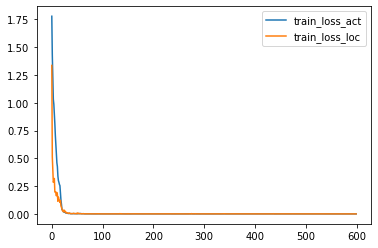

In [69]:
# train loss act vs loc
train_loss_act_df = pd.DataFrame(train_loss_act)
train_loss_act_df = train_loss_act_df.rename(columns={0:'train_loss_act'})
train_loss_loc_df = pd.DataFrame(train_loss_loc)
train_loss_loc_df = train_loss_loc_df.rename(columns={0:'train_loss_loc'})
pd.concat([train_loss_act_df,train_loss_loc_df], axis=1).plot()

<AxesSubplot:>

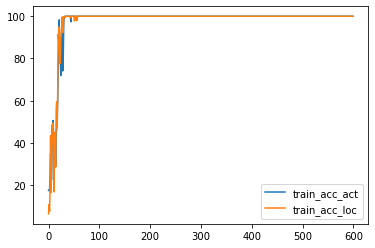

In [70]:
# train acc act vs loc
train_acc_act_df = pd.DataFrame(train_acc_act)
train_acc_act_df = train_acc_act_df.rename(columns={0:'train_acc_act'})
train_acc_loc_df = pd.DataFrame(train_acc_loc)
train_acc_loc_df = train_acc_loc_df.rename(columns={0:'train_acc_loc'})
pd.concat([train_acc_act_df,train_acc_loc_df], axis=1).plot()

<AxesSubplot:>

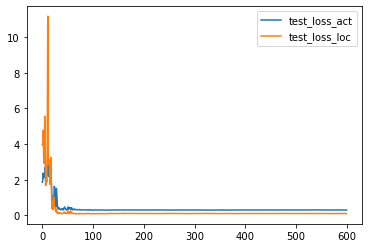

In [71]:
# test loss act vs loc
test_loss_act_df = pd.DataFrame(test_loss_act)
test_loss_act_df = test_loss_act_df.rename(columns={0:'test_loss_act'})
test_loss_loc_df = pd.DataFrame(test_loss_loc)
test_loss_loc_df = test_loss_loc_df.rename(columns={0:'test_loss_loc'})
pd.concat([test_loss_act_df,test_loss_loc_df], axis=1).plot()

<AxesSubplot:>

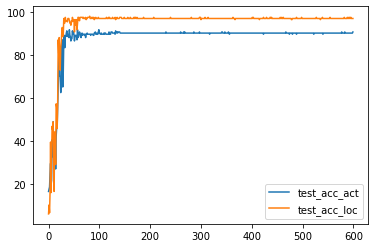

In [72]:
# test acc act vs loc
test_acc_act_df = pd.DataFrame(test_acc_act)
test_acc_act_df = test_acc_act_df.rename(columns={0:'test_acc_act'})
test_acc_loc_df = pd.DataFrame(test_acc_loc)
test_acc_loc_df = test_acc_loc_df.rename(columns={0:'test_acc_loc'})
pd.concat([test_acc_act_df,test_acc_loc_df], axis=1).plot()

# Komparasi

## train

In [ ]:
#backup before replaced by resnet
# d_train_loss_act= train_loss_act
# d_train_loss_loc=train_loss_loc
# d_test_loss_act=test_loss_act
# d_test_loss_loc = test_loss_loc
# d_train_acc_act=train_acc_act
# d_train_acc_loc = train_acc_loc
# d_test_acc_act = test_acc_act
# d_test_acc_loc= test_acc_loc

<AxesSubplot:>

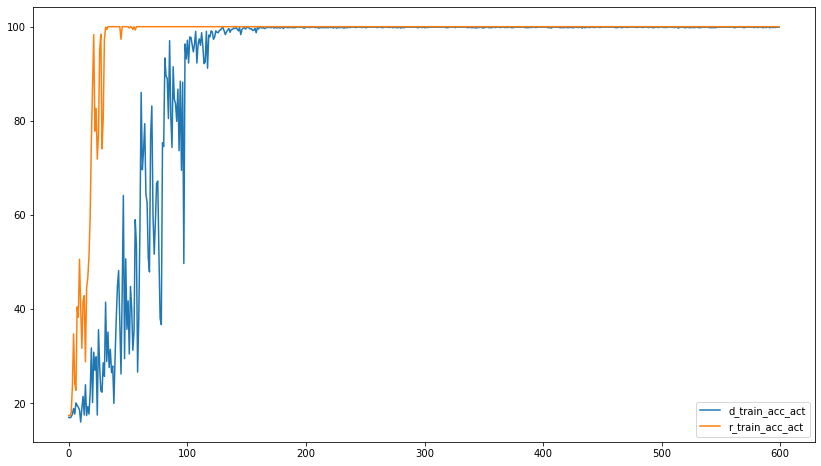

In [87]:
# train acc act
d_train_acc_act_df = pd.DataFrame(d_train_acc_act)
d_train_acc_act_df = d_train_acc_act_df.rename(columns={0:'d_train_acc_act'})
r_train_acc_act_df = pd.DataFrame(r_train_acc_act)
r_train_acc_act_df = r_train_acc_act_df.rename(columns={0:'r_train_acc_act'})
pd.concat([d_train_acc_act_df,r_train_acc_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

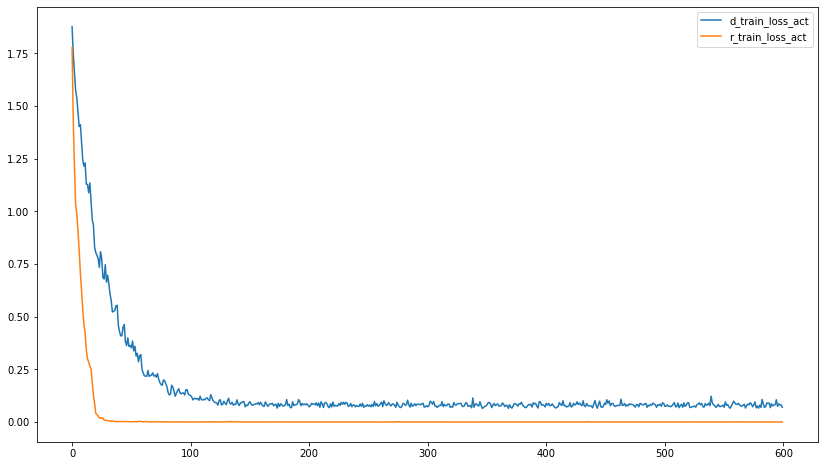

In [88]:
# train loss act
d_train_loss_act_df = pd.DataFrame(d_train_loss_act)
d_train_loss_act_df = d_train_loss_act_df.rename(columns={0:'d_train_loss_act'})
r_train_loss_act_df = pd.DataFrame(r_train_loss_act)
r_train_loss_act_df = r_train_loss_act_df.rename(columns={0:'r_train_loss_act'})
pd.concat([d_train_loss_act_df,r_train_loss_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

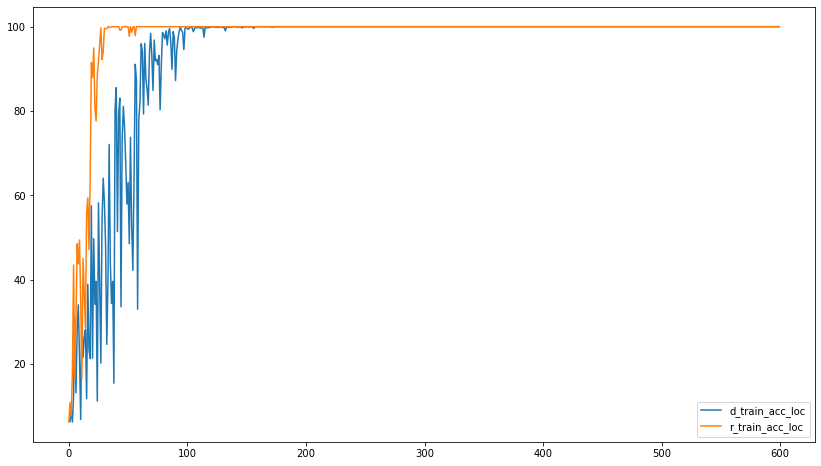

In [89]:
# train acc loc
d_train_acc_loc_df = pd.DataFrame(d_train_acc_loc)
d_train_acc_loc_df = d_train_acc_loc_df.rename(columns={0:'d_train_acc_loc'})
r_train_acc_loc_df = pd.DataFrame(r_train_acc_loc)
r_train_acc_loc_df = r_train_acc_loc_df.rename(columns={0:'r_train_acc_loc'})
pd.concat([d_train_acc_loc_df,r_train_acc_loc_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

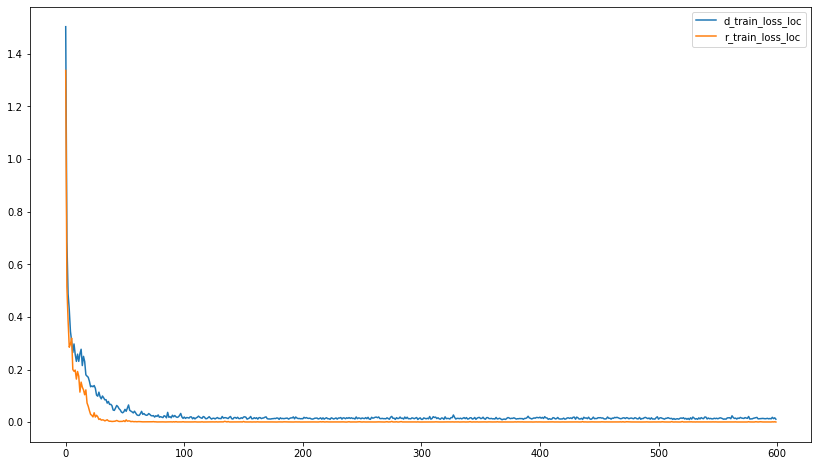

In [90]:
# train loss loc
d_train_loss_loc_df = pd.DataFrame(d_train_loss_loc)
d_train_loss_loc_df = d_train_loss_loc_df.rename(columns={0:'d_train_loss_loc'})
r_train_loss_loc_df = pd.DataFrame(r_train_loss_loc)
r_train_loss_loc_df = r_train_loss_loc_df.rename(columns={0:'r_train_loss_loc'})
pd.concat([d_train_loss_loc_df,r_train_loss_loc_df], axis=1).plot(figsize=(14,8))

## validation

<AxesSubplot:>

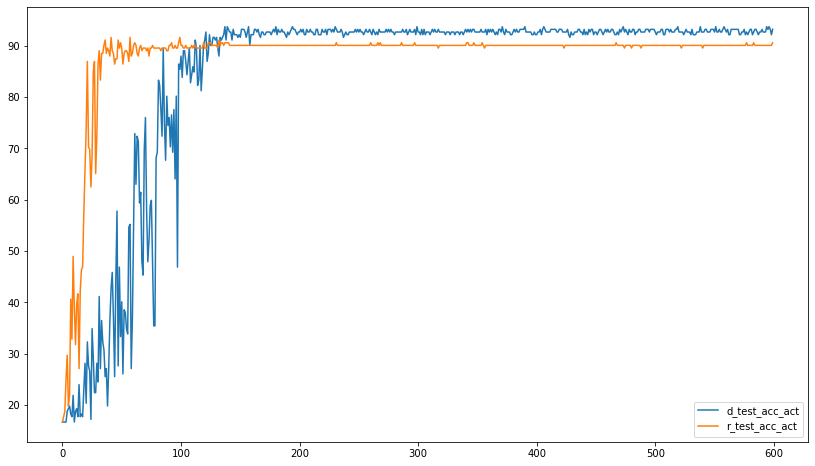

In [91]:
# val acc act
d_test_acc_act_df = pd.DataFrame(d_test_acc_act)
d_test_acc_act_df = d_test_acc_act_df.rename(columns={0:'d_test_acc_act'})
r_test_acc_act_df = pd.DataFrame(r_test_acc_act)
r_test_acc_act_df = r_test_acc_act_df.rename(columns={0:'r_test_acc_act'})
pd.concat([d_test_acc_act_df,r_test_acc_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

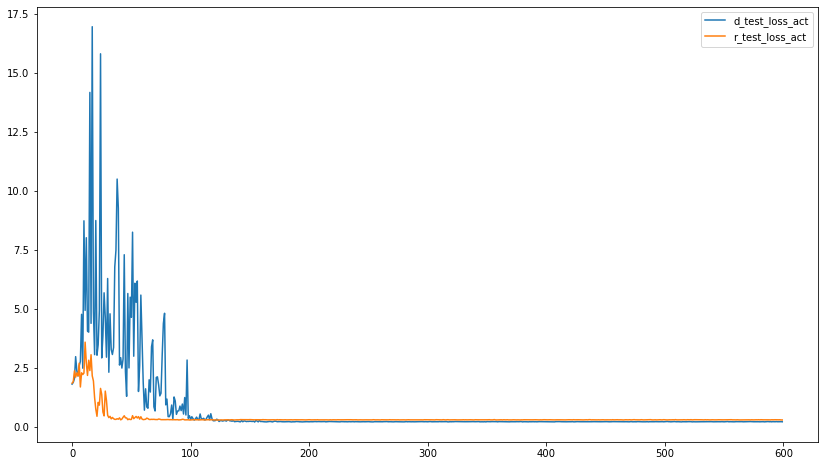

In [92]:
# val loss act
d_test_loss_act_df = pd.DataFrame(d_test_loss_act)
d_test_loss_act_df = d_test_loss_act_df.rename(columns={0:'d_test_loss_act'})
r_test_loss_act_df = pd.DataFrame(r_test_loss_act)
r_test_loss_act_df = r_test_loss_act_df.rename(columns={0:'r_test_loss_act'})
pd.concat([d_test_loss_act_df,r_test_loss_act_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

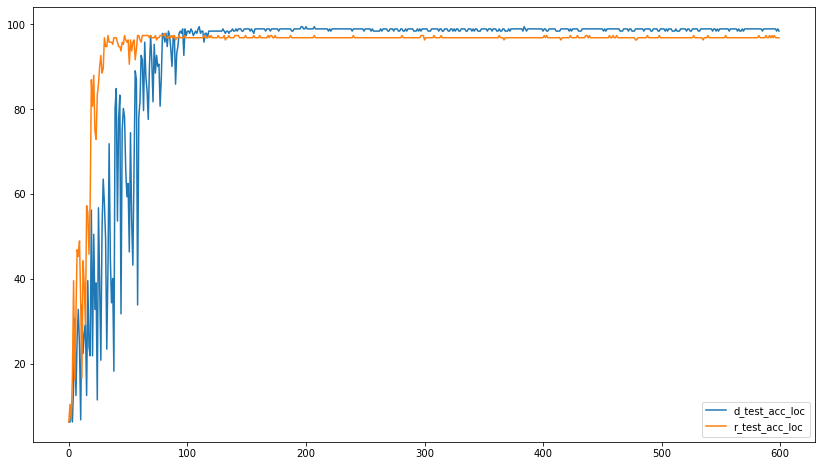

In [93]:
# val acc loc
d_test_acc_loc_df = pd.DataFrame(d_test_acc_loc)
d_test_acc_loc_df = d_test_acc_loc_df.rename(columns={0:'d_test_acc_loc'})
r_test_acc_loc_df = pd.DataFrame(r_test_acc_loc)
r_test_acc_loc_df = r_test_acc_loc_df.rename(columns={0:'r_test_acc_loc'})
pd.concat([d_test_acc_loc_df,r_test_acc_loc_df], axis=1).plot(figsize=(14,8))

<AxesSubplot:>

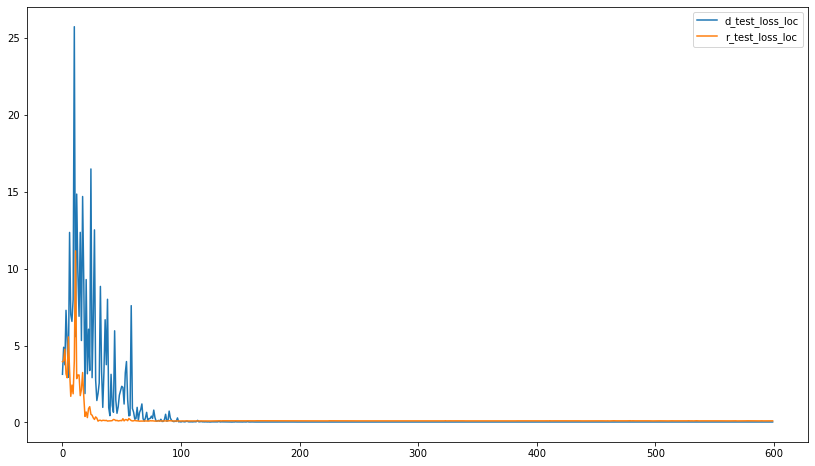

In [94]:
# val loss loc
d_test_loss_loc_df = pd.DataFrame(d_test_loss_loc)
d_test_loss_loc_df = d_test_loss_loc_df.rename(columns={0:'d_test_loss_loc'})
r_test_loss_loc_df = pd.DataFrame(r_test_loss_loc)
r_test_loss_loc_df = r_test_loss_loc_df.rename(columns={0:'r_test_loss_loc'})
pd.concat([d_test_loss_loc_df,r_test_loss_loc_df], axis=1).plot(figsize=(14,8))